In [578]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime, date
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import xgboost as xgboost
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [579]:
# Load Datasets
train = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\train.csv')
census = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\census_starter.csv')
revealed_test = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\revealed_test.csv')
train.head(10)

row_id  cfips          county    state first_day_of_month  \
0  1001_2019-08-01   1001  Autauga County  Alabama         01-08-2019   
1  1001_2019-09-01   1001  Autauga County  Alabama         01-09-2019   
2  1001_2019-10-01   1001  Autauga County  Alabama         01-10-2019   
3  1001_2019-11-01   1001  Autauga County  Alabama         01-11-2019   
4  1001_2019-12-01   1001  Autauga County  Alabama         01-12-2019   
5  1001_2020-01-01   1001  Autauga County  Alabama         01-01-2020   
6  1001_2020-02-01   1001  Autauga County  Alabama         01-02-2020   
7  1001_2020-03-01   1001  Autauga County  Alabama         01-03-2020   
8  1001_2020-04-01   1001  Autauga County  Alabama         01-04-2020   
9  1001_2020-05-01   1001  Autauga County  Alabama         01-05-2020   

   microbusiness_density  active  
0               3.007682    1249  
1               2.884870    1198  
2               3.055843    1269  
3               2.993233    1243  
4               2.993233    1243  
5               2.969090    1242  
6               2.909326    1217  
7               2.933231    1227  
8               3.000167    1255  
9               3.004948    1257

In [580]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [581]:
train.describe()

cfips  microbusiness_density        active
count  122265.000000          122265.000000  1.222650e+05
mean    30376.037640               3.817671  6.442858e+03
std     15143.508721               4.991087  3.304001e+04
min      1001.000000               0.000000  0.000000e+00
25%     18177.000000               1.639344  1.450000e+02
50%     29173.000000               2.586543  4.880000e+02
75%     45077.000000               4.519231  2.124000e+03
max     56045.000000             284.340030  1.167744e+06

In [582]:
train.isnull().sum()

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64

In [583]:
census.isnull().sum()

pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              1
pct_bb_2021              1
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         1
pct_college_2021         1
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    1
pct_foreign_born_2021    1
pct_it_workers_2017      0
pct_it_workers_2018      1
pct_it_workers_2019      0
pct_it_workers_2020      1
pct_it_workers_2021      1
median_hh_inc_2017       0
median_hh_inc_2018       1
median_hh_inc_2019       0
median_hh_inc_2020       2
median_hh_inc_2021       2
dtype: int64

In [584]:
census.describe()

pct_bb_2017  pct_bb_2018  pct_bb_2019  pct_bb_2020  pct_bb_2021  \
count  3142.000000  3142.000000  3142.000000  3141.000000  3141.000000   
mean     69.920401    72.690866    75.398600    78.543298    80.539096   
std       9.702052     9.255863     8.846665     8.250864     7.889931   
min      24.500000    25.700000    34.800000    33.300000    37.000000   
25%      64.200000    67.425000    70.500000    74.100000    76.400000   
50%      70.700000    73.600000    76.450000    79.600000    81.700000   
75%      76.400000    78.800000    81.400000    84.100000    85.900000   
max      94.600000    95.500000    96.000000    97.100000    97.600000   

              cfips  pct_college_2017  pct_college_2018  pct_college_2019  \
count   3142.000000       3142.000000       3142.000000       3142.000000   
mean   30383.649268         13.813399         14.005379         14.240452   
std    15162.508374          5.586649          5.630199          5.689780   
min     1001.000000          2.400000          0.000000          0.000000   
25%    18177.500000          9.700000          9.900000         10.100000   
50%    29176.000000         12.800000         13.000000         13.250000   
75%    45080.500000         16.800000         17.100000         17.300000   
max    56045.000000         43.700000         48.000000         45.400000   

       pct_college_2020  ...  pct_it_workers_2017  pct_it_workers_2018  \
count       3141.000000  ...          3142.000000          3141.000000   
mean          14.631328  ...             1.427148             1.382171   
std            5.776940  ...             0.986985             0.942777   
min            0.000000  ...             0.000000             0.000000   
25%           10.500000  ...             0.800000             0.800000   
50%           13.600000  ...             1.300000             1.300000   
75%           17.900000  ...             1.900000             1.800000   
max           43.000000  ...            17.400000            11.700000   

       pct_it_workers_2019  pct_it_workers_2020  pct_it_workers_2021  \
count          3142.000000          3141.000000          3141.000000   
mean              1.338956             1.309265             1.272684   
std               0.940891             0.990342             0.968579   
min               0.000000             0.000000             0.000000   
25%               0.700000             0.700000             0.600000   
50%               1.200000             1.200000             1.100000   
75%               1.800000             1.800000             1.700000   
max              10.500000            15.200000            15.200000   

       median_hh_inc_2017  median_hh_inc_2018  median_hh_inc_2019  \
count         3142.000000         3141.000000         3142.000000   
mean         49754.163908        51583.175422        53475.909612   
std          13154.424871        13703.502202        14192.529173   
min          19264.000000        20188.000000        21504.000000   
25%          41123.000000        42480.000000        44155.000000   
50%          48065.500000        49888.000000        51757.500000   
75%          55763.500000        57611.000000        59867.250000   
max         129588.000000       136268.000000       142299.000000   

       median_hh_inc_2020  median_hh_inc_2021  
count         3140.000000         3140.000000  
mean         55012.443312        58223.339490  
std          14649.568591        15541.038914  
min          22292.000000        17109.000000  
25%          45653.000000        48179.500000  
50%          52842.000000        55907.000000  
75%          61500.750000        64930.000000  
max         147111.000000       156821.000000  

[8 rows x 26 columns]

In [585]:
train.dtypes

row_id                    object
cfips                      int64
county                    object
state                     object
first_day_of_month        object
microbusiness_density    float64
active                     int64
dtype: object

In [586]:
census.dtypes

pct_bb_2017              float64
pct_bb_2018              float64
pct_bb_2019              float64
pct_bb_2020              float64
pct_bb_2021              float64
cfips                      int64
pct_college_2017         float64
pct_college_2018         float64
pct_college_2019         float64
pct_college_2020         float64
pct_college_2021         float64
pct_foreign_born_2017    float64
pct_foreign_born_2018    float64
pct_foreign_born_2019    float64
pct_foreign_born_2020    float64
pct_foreign_born_2021    float64
pct_it_workers_2017      float64
pct_it_workers_2018      float64
pct_it_workers_2019      float64
pct_it_workers_2020      float64
pct_it_workers_2021      float64
median_hh_inc_2017         int64
median_hh_inc_2018       float64
median_hh_inc_2019         int64
median_hh_inc_2020       float64
median_hh_inc_2021       float64
dtype: object

FEATURE ENGINEERING<br>
This is the most challenging part of the project. Several factors affects any kind of microbusiness. These can be geographical, economic or political factors as well. Some additional features constructed here are (the data for all these were taken from different sources of website containing US official census data):<br>
-> Labor Force & Unemployment: This in indicator of how many people are unemployed and thus increases chances of starting a microbusiness.<br>
-> Tax Rates: Tax rates affect the microbusinesses in an area, because people often tend to open business in an area with less tax.<br>
-> Coastline: Counties having a coastline attracts small business like fishing, tourism etc which are all microbusiness.<br>
-> Broadband connection(pct_bb_last_year): Any business requires atleast a small use of internet connection. Also micrbusiness include online services. Thus good soread of broadband connection in an area helps any online service to flourish.<br>
-> College Education(pct_college_last_year): Percentage of people having aleast one college degree. People with less education tend to miss job opportunities in big MnCs, thus go for microbusiness.<br>
-> IT Workers(pct_it_workers_last_year): Percentage of people working in IT firms. Area with large count of this feature implies, IT industries flouishes in that area, whre hiring is high, thus increasing chances of people trying to get into these forms as job rather than there own microbusiness. Also this is an indication of the urbanisation level of that area.<br>
-> Household Income(median_h_inc_last_year): It indicates about consumer spedning power, market demands for varieties, competition etc in an area.<br>
-> Treasury Rates(DGS10): It affects the cost of borrowings(interest rates). Also area with higher treasury rates may lead to increased cost for mortgages and loans, potentially reducing disposable income for consumers.

In [587]:
train['istest'] = 0 # To differentiate between test and training data
revealed_test['istest'] = 1
data = pd.concat([train,revealed_test],axis=0,ignore_index=True)
data['first_day_of_month'] = pd.to_datetime(data['first_day_of_month'])
data['month'] = data['first_day_of_month'].dt.day # Creating month feature for later use
data['year_minus_one'] = data['first_day_of_month'].dt.year - 1 # Creating year-1 feature for later use
data['year'] = data['first_day_of_month'].dt.year # Creating year feature for later use
data['pop'] = (data['active']/data['microbusiness_density'])*100 # Estimating population using given data
data.head(15)

row_id  cfips          county    state first_day_of_month  \
0   1001_2019-08-01   1001  Autauga County  Alabama         2019-01-08   
1   1001_2019-09-01   1001  Autauga County  Alabama         2019-01-09   
2   1001_2019-10-01   1001  Autauga County  Alabama         2019-01-10   
3   1001_2019-11-01   1001  Autauga County  Alabama         2019-01-11   
4   1001_2019-12-01   1001  Autauga County  Alabama         2019-01-12   
5   1001_2020-01-01   1001  Autauga County  Alabama         2020-01-01   
6   1001_2020-02-01   1001  Autauga County  Alabama         2020-01-02   
7   1001_2020-03-01   1001  Autauga County  Alabama         2020-01-03   
8   1001_2020-04-01   1001  Autauga County  Alabama         2020-01-04   
9   1001_2020-05-01   1001  Autauga County  Alabama         2020-01-05   
10  1001_2020-06-01   1001  Autauga County  Alabama         2020-01-06   
11  1001_2020-07-01   1001  Autauga County  Alabama         2020-01-07   
12  1001_2020-08-01   1001  Autauga County  Alabama         2020-01-08   
13  1001_2020-09-01   1001  Autauga County  Alabama         2020-01-09   
14  1001_2020-10-01   1001  Autauga County  Alabama         2020-01-10   

    microbusiness_density  active  istest  month  year_minus_one  year  \
0                3.007682    1249       0      8            2018  2019   
1                2.884870    1198       0      9            2018  2019   
2                3.055843    1269       0     10            2018  2019   
3                2.993233    1243       0     11            2018  2019   
4                2.993233    1243       0     12            2018  2019   
5                2.969090    1242       0      1            2019  2020   
6                2.909326    1217       0      2            2019  2020   
7                2.933231    1227       0      3            2019  2020   
8                3.000167    1255       0      4            2019  2020   
9                3.004948    1257       0      5            2019  2020   
10               3.019292    1263       0      6            2019  2020   
11               3.083837    1290       0      7            2019  2020   
12               3.174679    1328       0      8            2019  2020   
13               3.205756    1341       0      9            2019  2020   
14               3.193804    1336       0     10            2019  2020   

             pop  
0   41526.999299  
1   41526.999777  
2   41527.001174  
3   41527.001638  
4   41527.001638  
5   41830.998724  
6   41831.000284  
7   41830.999082  
8   41830.999164  
9   41831.001158  
10  41831.000176  
11  41831.000617  
12  41831.000867  
13  41831.001258  
14  41831.001813

In [588]:
# Joining census and train data. Corresponding data of year-1 from census data is used
census.set_index('cfips',inplace=True)

def add_last_year_data(cfips, year, census_data, col):
    col_name = f"{col}{year}"
    return census_data.loc[cfips][col_name]

data['pct_bb_last_year'] = data.apply(lambda row: add_last_year_data(cfips=row['cfips'], year=row['year_minus_one'], census_data=census, col='pct_bb_'), axis=1)
data['pct_college_last_year'] = data.apply(lambda row: add_last_year_data(cfips=row['cfips'], year=row['year_minus_one'], census_data=census, col='pct_college_'), axis=1)
data['pct_foreign_born_last_year'] = data.apply(lambda row: add_last_year_data(cfips=row['cfips'], year=row['year_minus_one'], census_data=census, col='pct_foreign_born_'), axis=1)
data['pct_it_workers_last_year'] = data.apply(lambda row: add_last_year_data(cfips=row['cfips'], year=row['year_minus_one'], census_data=census, col='pct_it_workers_'), axis=1)
data['median_hh_inc_last_year'] = data.apply(lambda row: add_last_year_data(cfips=row['cfips'], year=row['year_minus_one'], census_data=census, col='median_hh_inc_'), axis=1)

POPULATION <br>
used_population = Age 18+ (Working age) <br>
retired_population = Age 60+ (Non-Working Age)

In [589]:
for year in data['year'].unique():
    filename = f'C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\ACSST5Y{year}.S0101-Data.csv'
    temp = pd.read_csv(filename,usecols=['GEO_ID','NAME','S0101_C01_026E', 'S0101_C01_028E'])
    temp = temp.iloc[1:]
    temp['S0101_C01_026E'] = temp['S0101_C01_026E'].astype('int')
    temp['S0101_C01_028E'] = temp['S0101_C01_028E'].astype('int')
    temp['cfips'] = temp.GEO_ID.apply(lambda x: int(x.split('US')[-1]) )

    adult = temp.set_index('cfips').S0101_C01_026E.to_dict()
    retired = temp.set_index('cfips').S0101_C01_028E.to_dict()
    mask = data.year == year
    data.loc[mask, 'used_population'] = data.loc[mask, 'cfips'].map(adult)
    data.loc[mask, 'retired_population'] = data.loc[mask, 'cfips'].map(retired)

UNEMPLOYMENT AND LABOR FORCE<br>
Labor Force: Number of people unemployed + actively seeking for job<br>
Unemployed: Basically a subset of labor force

In [590]:
from collections import defaultdict
for col in ['unemployment_rate', 'labor_force']:
    full_dict = defaultdict(lambda: np.nan)
    for yr in data['year'].unique():
        file = 'C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\laucnty{}.xlsx'.format(yr % 100)
        columns = ['LUASCode', 'state_fips', 'county_fips', 'name', 'year', 'dummy', 'labor_force', 'employed', 'unemployed', 'unemployment_rate']
        df = pd.read_excel(file, header=4)
        df.columns = columns
        del df['dummy']
        df.dropna(inplace=True)
        df['year'] = df['year'].map(int)
        df['cfips'] = (df['state_fips']*1000 + df['county_fips']).map(int)

        # Some mismatches were addressed here
        def extract_county_name(name):
            parts = name.split(',')
            county_name = parts[0].strip()
            if county_name == "Anchorage Borough/municipality":
                county_name = "Anchorage Municipality"
            elif county_name == "Juneau Borough/city":
                county_name = "Juneau City and Borough"
            elif county_name == "Sitka Borough/city":
                county_name = "Sitka City and Borough"
            elif county_name == "Wrangell Borough/city":
                county_name = "Wrangell City and Borough"
            elif county_name == "Yakutat Borough/city":
                county_name = "Yakutat City and Borough"
            elif county_name == "San Francisco County/city":
                county_name = "San Francisco County"
            elif county_name == "Broomfield County/city":
                county_name = "Broomfield County"
            elif county_name == "Denver County/city":
                county_name = "Denver County"
            elif county_name == "Honolulu County/city":
                county_name = "Honolulu County"
            elif county_name == "Kalawao County/city":
                county_name = "Kalawao County"
            elif county_name == "Nantucket County/town":
                county_name = "Nantucket County"
            elif county_name == "Philadelphia County/city":
                county_name = "Philadelphia County"
            elif county_name == "Dona Ana County":
                county_name = "DoÃ±a Ana County"
            return county_name

        df['name'] = df['name'].apply(extract_county_name)
        df.rename(columns={'name':'county'},inplace=True)
        temp = {(row['county'],yr): row[col] for __, row in df.iterrows()}
        full_dict.update(temp)

    data[col] = data.apply(lambda row: full_dict[(row['county'], row['year'])],axis=1)

TAX RATES<br>
County wise tax rates of USA. The tax rates differ fairly state wise and little county wise. The data was scrapped due to unavailability of direct csv file. A separate column was added to show difference between tax rates of adjacent counties

In [591]:
r = requests.get('https://www.richstatespoorstates.org/variables/corporate_income_tax_rate/')

html = r.text

soup = BeautifulSoup(html, "html.parser")

historical_table = soup.find_all('table', class_='table table-striped data-table')[1]
tax_df = pd.read_html(str(historical_table))[0]

for col in tax_df.columns[1:]:
    tax_df[col] = tax_df[col].str[:-1].astype('float')

tax_df2 = pd.DataFrame([['District of Columbia',9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.4, 9.2, 9.0, 8.25, 8.25, 8.25, 8.25, 8.25]], columns=tax_df.columns)
tax_dfdf = pd.concat([tax_df, tax_df2])

tax_dfdf = tax_dfdf.melt(id_vars=['State'])
tax_dfdf = tax_dfdf.rename(columns={'variable': 'year', 'value':'tax_rate', 'State':'state'})
tax_dfdf['year'] = tax_dfdf['year'].astype(int)

tax_dfdf['tax_rate_diff'] = tax_dfdf.groupby(['state'])['tax_rate'].diff().fillna(0)

print(tax_df.shape)
tax_dfdf.head()
tax_dfdf.rename(columns={"State":'state'})

(50, 17)


state  year  tax_rate  tax_rate_diff
0                 Alabama  2008      4.23           0.00
1                  Alaska  2008      9.40           0.00
2                 Arizona  2008      6.97           0.00
3                Arkansas  2008      6.50           0.00
4              California  2008      8.84           0.00
..                    ...   ...       ...            ...
811            Washington  2023      6.66          -0.15
812         West Virginia  2023      6.50           0.00
813             Wisconsin  2023      7.90           0.00
814               Wyoming  2023      0.00           0.00
815  District of Columbia  2023      8.25           0.00

[816 rows x 4 columns]

IS COASTLINE?<br>
Whether the given county has a coastline

In [592]:
coastline = pd.read_excel('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\coastline-counties-list.xlsx')
coastline = coastline.rename(columns={'STATE/\nCOUNTY\nFIPS':'cfips'})
unique_cfips = data['cfips'].unique()
coastline = coastline[coastline['cfips'].isin(unique_cfips)][['cfips']]
coastline['is_coastal'] = True
other_rows = [i for i in unique_cfips if i not in coastline['cfips'].values]
other_df = pd.DataFrame(zip(other_rows,len(other_rows)*[False]),columns=coastline.columns)
coastline = pd.concat([coastline,other_df]).reset_index(drop=True)

US TREASURY RATES

In [593]:
us_treas = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\DGS10.csv')
us_treas['DATE'] = pd.to_datetime(us_treas['DATE'])
us_treas['DGS10'] = us_treas['DGS10'].replace('.',np.nan).ffill().astype(float)
us_treas = us_treas.rename(columns={'DATE':'first_day_of_month'})

AVERAGE RENT <br>
This includes rents for 1,2,3,4 rooms, averaged together for a county.

In [594]:
year_array = data['year'].unique()
rents = []
for yr in year_array:
    df = pd.read_excel(f'C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\FY{yr}_50_County_rev.xlsx')
    df['average_rent'] = df[['rent50_0','rent50_1','rent50_2','rent50_3']].mean(axis=1)
    df['cfips'] = (df['state'].astype(str).str.zfill(2)+df['county'].astype(str).str.zfill(3)).astype(int)
    df.drop(columns=['state','county','fips2010',f'cbsasub{yr%100}',f'areaname{yr%100}','cousub','name','pop','hu','state_alpha','rent50_0','rent50_1','rent50_2','rent50_3','rent50_4','cntyname'],axis=1,inplace=True)
    df['year'] = yr
    rents.append(df)

rent_df = pd.concat(rents, ignore_index=True)
rent_df = rent_df.groupby(['cfips','year']).median().reset_index()
rent_df = rent_df[rent_df['cfips'].isin(data['cfips'].unique())].reset_index(drop=True)

In [595]:
# COMBINING ALL INTO ORIGINAL DATAFRAME
data = pd.merge(data,rent_df,right_on=['cfips','year'],left_on=['cfips','year'],how='left').drop(columns='year')
data = pd.merge(data,coastline,on='cfips',how='left')
us_treas['first_day_of_month'] = pd.to_datetime(us_treas['first_day_of_month'])
data = pd.merge(data,us_treas,on='first_day_of_month',how='left')
data = pd.merge(data,tax_dfdf,left_on=['state',data['first_day_of_month'].dt.year],right_on=['state','year'],how='left')
data.head(10)

row_id cfips          county    state first_day_of_month  \
0  1001_2019-08-01  1001  Autauga County  Alabama         2019-01-08   
1  1001_2019-09-01  1001  Autauga County  Alabama         2019-01-09   
2  1001_2019-10-01  1001  Autauga County  Alabama         2019-01-10   
3  1001_2019-11-01  1001  Autauga County  Alabama         2019-01-11   
4  1001_2019-12-01  1001  Autauga County  Alabama         2019-01-12   
5  1001_2020-01-01  1001  Autauga County  Alabama         2020-01-01   
6  1001_2020-02-01  1001  Autauga County  Alabama         2020-01-02   
7  1001_2020-03-01  1001  Autauga County  Alabama         2020-01-03   
8  1001_2020-04-01  1001  Autauga County  Alabama         2020-01-04   
9  1001_2020-05-01  1001  Autauga County  Alabama         2020-01-05   

   microbusiness_density  active  istest  month  year_minus_one  ...  \
0               3.007682    1249       0      8            2018  ...   
1               2.884870    1198       0      9            2018  ...   
2               3.055843    1269       0     10            2018  ...   
3               2.993233    1243       0     11            2018  ...   
4               2.993233    1243       0     12            2018  ...   
5               2.969090    1242       0      1            2019  ...   
6               2.909326    1217       0      2            2019  ...   
7               2.933231    1227       0      3            2019  ...   
8               3.000167    1255       0      4            2019  ...   
9               3.004948    1257       0      5            2019  ...   

   used_population  retired_population  unemployment_rate  labor_force  \
0          42175.0             11022.0                2.9      26696.0   
1          42175.0             11022.0                2.9      26696.0   
2          42175.0             11022.0                2.9      26696.0   
3          42175.0             11022.0                2.9      26696.0   
4          42175.0             11022.0                2.9      26696.0   
5          42496.0             11557.0                5.3      26425.0   
6          42496.0             11557.0                5.3      26425.0   
7          42496.0             11557.0                5.3      26425.0   
8          42496.0             11557.0                5.3      26425.0   
9          42496.0             11557.0                5.3      26425.0   

   average_rent  is_coastal  DGS10  year  tax_rate  tax_rate_diff  
0        838.75       False   2.73  2019      6.03           0.89  
1        838.75       False   2.74  2019      6.03           0.89  
2        838.75       False   2.74  2019      6.03           0.89  
3        838.75       False   2.71  2019      6.03           0.89  
4        838.75       False    NaN  2019      6.03           0.89  
5        834.25       False   1.92  2020      6.07           0.04  
6        834.25       False   1.88  2020      6.07           0.04  
7        834.25       False   1.80  2020      6.07           0.04  
8        834.25       False    NaN  2020      6.07           0.04  
9        834.25       False    NaN  2020      6.07           0.04  

[10 rows x 26 columns]

LAGGED AND ROLLING FEATURES<br>
Later in EDA it will be seen that lag(1) (i.e value of pevious month) is a significant predictor of microbusiness for current month

In [596]:
data['mbd_lag_1'] = data.groupby('cfips')['microbusiness_density'].shift(1).bfill()
data['diff_lag_1'] = data.groupby('cfips')['microbusiness_density'].diff(1).bfill()

data['rolling_window_2'] = data.groupby('cfips')['mbd_lag_1'].transform(lambda s: s.rolling(2,min_periods=1).sum()).bfill()

In [597]:
# Some missing values were addressed using mean
mask_connecticut = data['state'] == 'Connecticut'
data.loc[mask_connecticut, 'retired_population'] = data.loc[mask_connecticut, 'retired_population'].fillna(data.loc[mask_connecticut].groupby('county')['retired_population'].transform('mean'))
data.loc[mask_connecticut, 'used_population'] = data.loc[mask_connecticut, 'used_population'].fillna(data.loc[mask_connecticut].groupby('county')['used_population'].transform('mean'))

data['DGS10'] = data['DGS10'].replace(".",np.nan).ffill().astype(float)

data = data[data['county'] != 'Kalawao County']

In [599]:
data.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'istest', 'month', 'year_minus_one',
       'pop', 'pct_bb_last_year', 'pct_college_last_year',
       'pct_foreign_born_last_year', 'pct_it_workers_last_year',
       'median_hh_inc_last_year', 'used_population', 'retired_population',
       'unemployment_rate', 'labor_force', 'average_rent', 'is_coastal',
       'DGS10', 'year', 'tax_rate', 'tax_rate_diff', 'mbd_lag_1', 'diff_lag_1',
       'rolling_window_2'],
      dtype='object')

In [600]:
data.drop(columns=['row_id','year_minus_one'],inplace=True)

In [601]:
data['median_hh_inc_last_year'].fillna(data['median_hh_inc_last_year'].mean(),inplace=True)
data['pop'].fillna(0,inplace=True)

In [602]:
data.to_csv('feature_engineered_data_final.csv')

THIS MARKS THE END OF CREATING VALUABLE FEATURES FOR INSIGHTS, AND BETTER FORECASTING

EXPLORATORY DATA ANALYSIS

In [603]:
data = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\feature_engineered_data_final.csv')
data.head(10)

Unnamed: 0  cfips          county    state first_day_of_month  \
0           0   1001  Autauga County  Alabama         2019-01-08   
1           1   1001  Autauga County  Alabama         2019-01-09   
2           2   1001  Autauga County  Alabama         2019-01-10   
3           3   1001  Autauga County  Alabama         2019-01-11   
4           4   1001  Autauga County  Alabama         2019-01-12   
5           5   1001  Autauga County  Alabama         2020-01-01   
6           6   1001  Autauga County  Alabama         2020-01-02   
7           7   1001  Autauga County  Alabama         2020-01-03   
8           8   1001  Autauga County  Alabama         2020-01-04   
9           9   1001  Autauga County  Alabama         2020-01-05   

   microbusiness_density  active  istest  month           pop  ...  \
0               3.007682    1249       0      8  41526.999299  ...   
1               2.884870    1198       0      9  41526.999777  ...   
2               3.055843    1269       0     10  41527.001174  ...   
3               2.993233    1243       0     11  41527.001638  ...   
4               2.993233    1243       0     12  41527.001638  ...   
5               2.969090    1242       0      1  41830.998724  ...   
6               2.909326    1217       0      2  41831.000284  ...   
7               2.933231    1227       0      3  41830.999082  ...   
8               3.000167    1255       0      4  41830.999164  ...   
9               3.004948    1257       0      5  41831.001158  ...   

   labor_force  average_rent  is_coastal  DGS10  year  tax_rate  \
0      26696.0        838.75       False   2.73  2019      6.03   
1      26696.0        838.75       False   2.74  2019      6.03   
2      26696.0        838.75       False   2.74  2019      6.03   
3      26696.0        838.75       False   2.71  2019      6.03   
4      26696.0        838.75       False   2.71  2019      6.03   
5      26425.0        834.25       False   1.92  2020      6.07   
6      26425.0        834.25       False   1.88  2020      6.07   
7      26425.0        834.25       False   1.80  2020      6.07   
8      26425.0        834.25       False   1.80  2020      6.07   
9      26425.0        834.25       False   1.80  2020      6.07   

   tax_rate_diff  mbd_lag_1  diff_lag_1  rolling_window_2  
0           0.89   3.007682   -0.122812          3.007682  
1           0.89   3.007682   -0.122812          6.015364  
2           0.89   2.884870    0.170973          5.892552  
3           0.89   3.055843   -0.062610          5.940713  
4           0.89   2.993233    0.000000          6.049076  
5           0.04   2.993233   -0.024143          5.986466  
6           0.04   2.969090   -0.059764          5.962323  
7           0.04   2.909326    0.023906          5.878416  
8           0.04   2.933231    0.066936          5.842557  
9           0.04   3.000167    0.004781          5.933399  

[10 rows x 28 columns]

In [604]:
data.columns

Index(['Unnamed: 0', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'istest', 'month', 'pop',
       'pct_bb_last_year', 'pct_college_last_year',
       'pct_foreign_born_last_year', 'pct_it_workers_last_year',
       'median_hh_inc_last_year', 'used_population', 'retired_population',
       'unemployment_rate', 'labor_force', 'average_rent', 'is_coastal',
       'DGS10', 'year', 'tax_rate', 'tax_rate_diff', 'mbd_lag_1', 'diff_lag_1',
       'rolling_window_2'],
      dtype='object')

In [605]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [606]:
data['first_day_of_month'] = pd.to_datetime(data['first_day_of_month'])

In [607]:
data.dtypes

cfips                                  int64
county                                object
state                                 object
first_day_of_month            datetime64[ns]
microbusiness_density                float64
active                                 int64
istest                                 int64
month                                  int64
pop                                  float64
pct_bb_last_year                     float64
pct_college_last_year                float64
pct_foreign_born_last_year           float64
pct_it_workers_last_year             float64
median_hh_inc_last_year              float64
used_population                      float64
retired_population                   float64
unemployment_rate                    float64
labor_force                          float64
average_rent                         float64
is_coastal                              bool
DGS10                                float64
year                                   int64
tax_rate  

HEATMAP: Showing correlations. Some pair of features have higher correlations, but they can be significant predictors, thus were not removed.

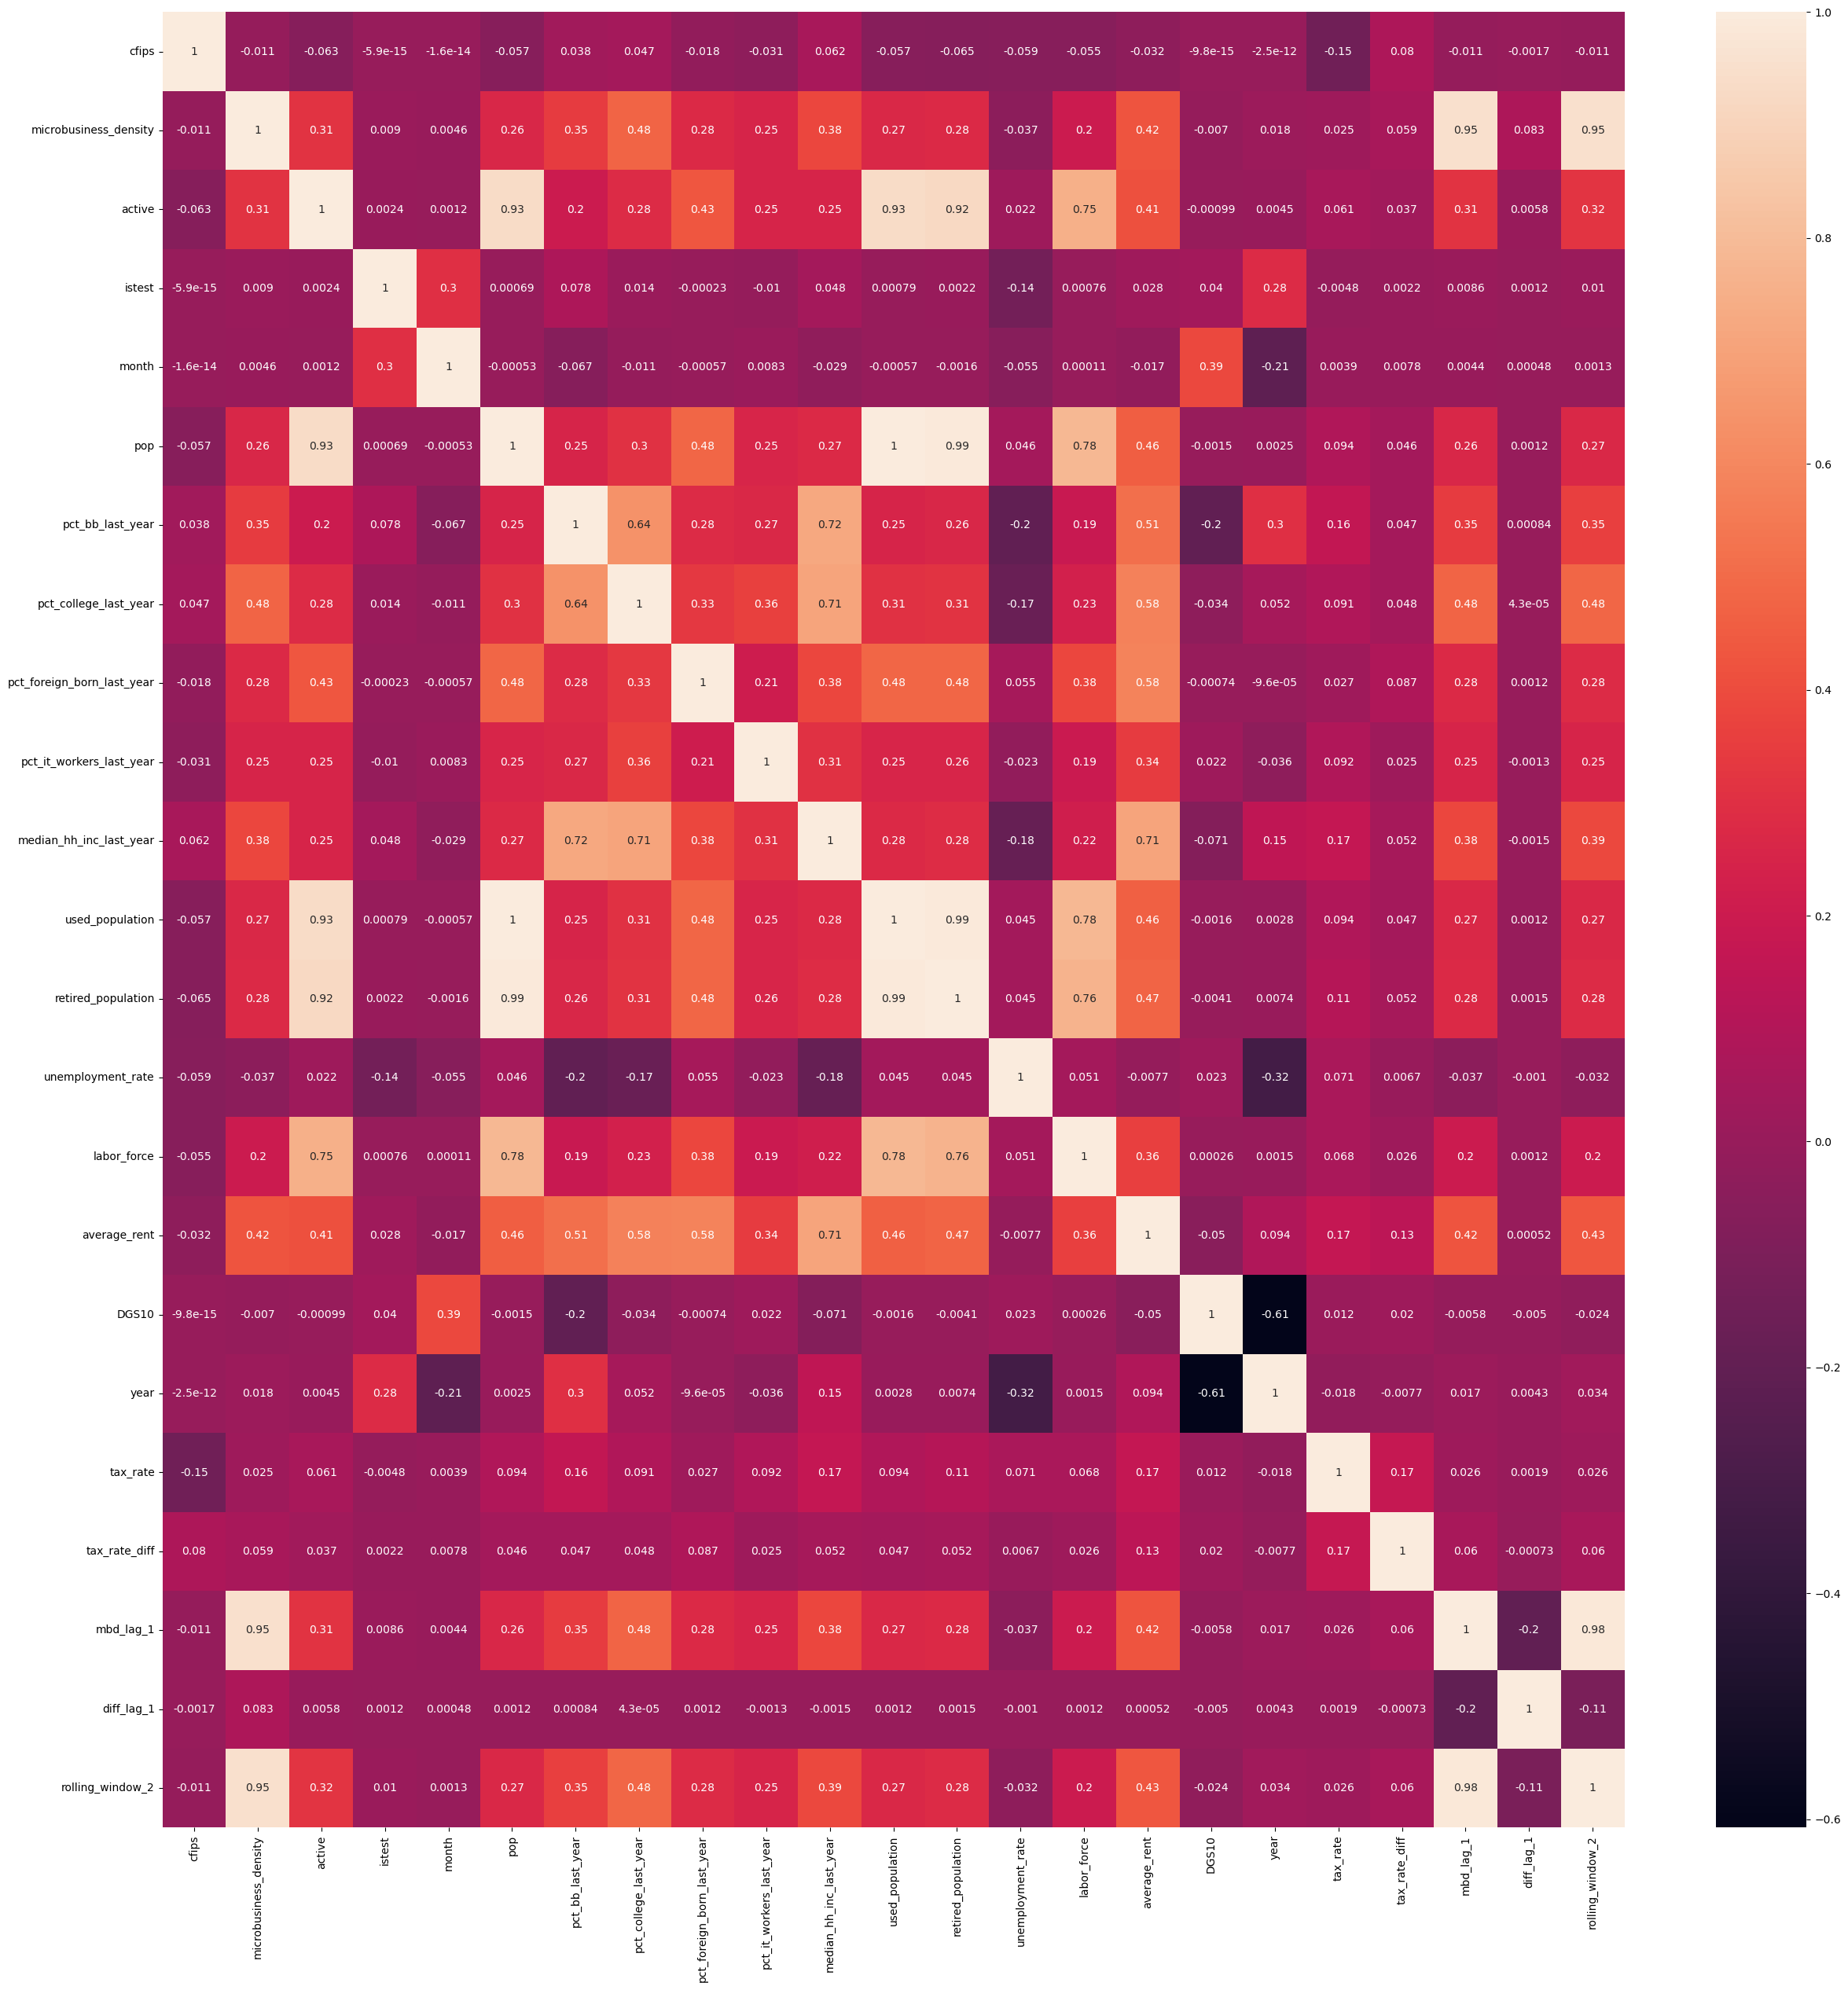

In [608]:
numerical_features = data.select_dtypes(include=['number'])
plt.figure(figsize=(30,30))
dataplot = sb.heatmap(numerical_features.corr(),annot=True)
plt.show()

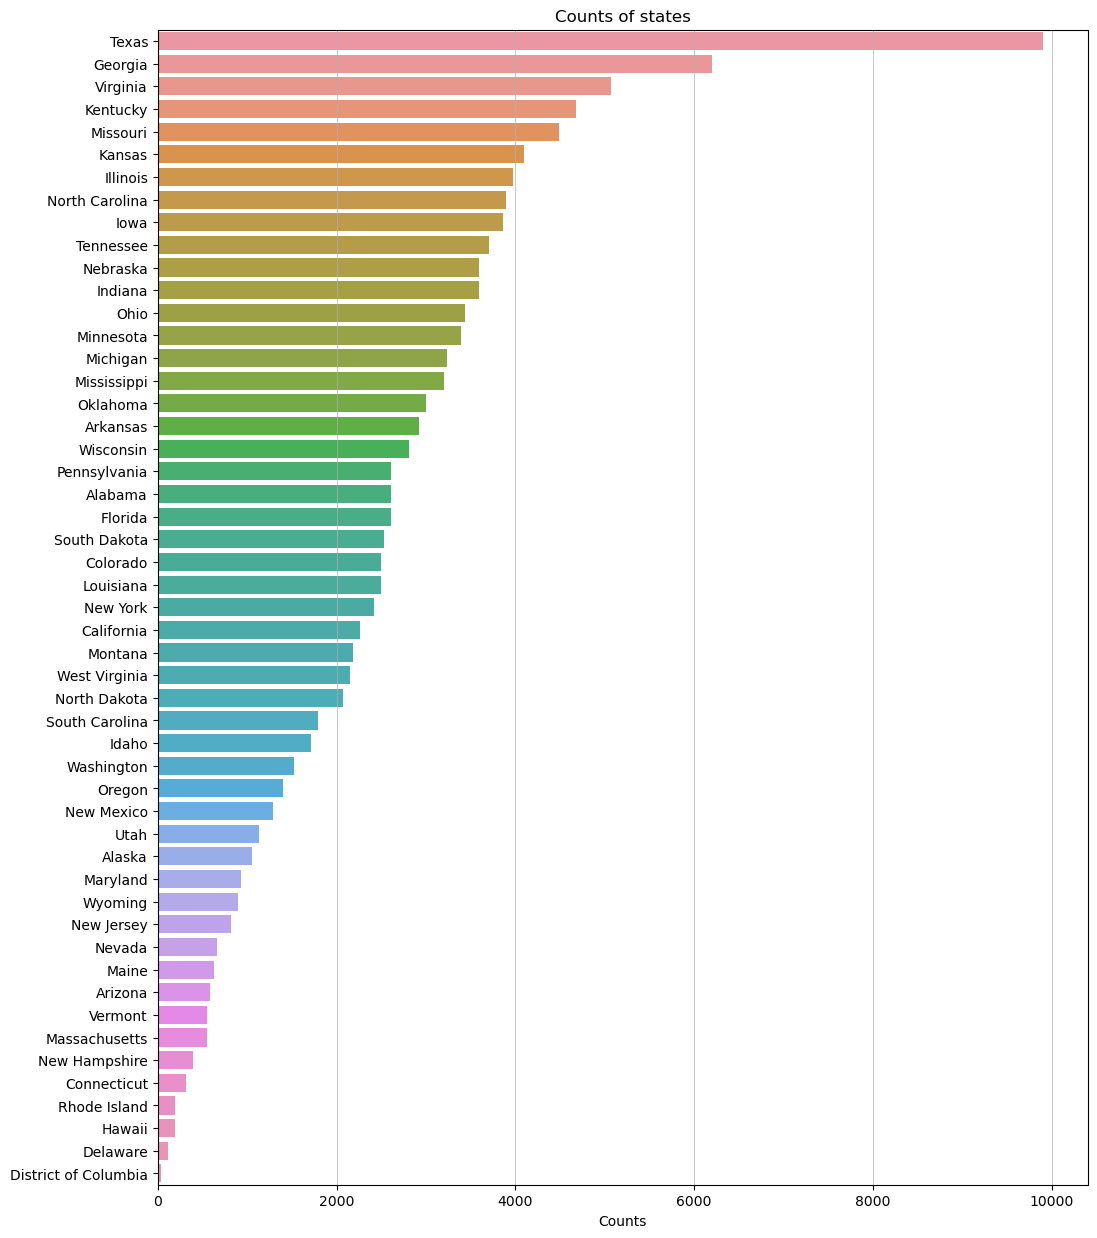

In [609]:
fig = plt.figure(figsize=(12,15))
sb.countplot(data=train,y='state',order=train['state'].value_counts().index)
plt.ylabel("")
plt.xlabel("Counts")
plt.title("Counts of states")
plt.grid(True,linewidth="0.5",axis="x")
plt.show()

In [610]:
data.shape

(128494, 27)

Distribution of active and microbusiness density. Clearly a right skew. This means that most number of counties have number of microbusinesses in the lower range(between 0-20000)

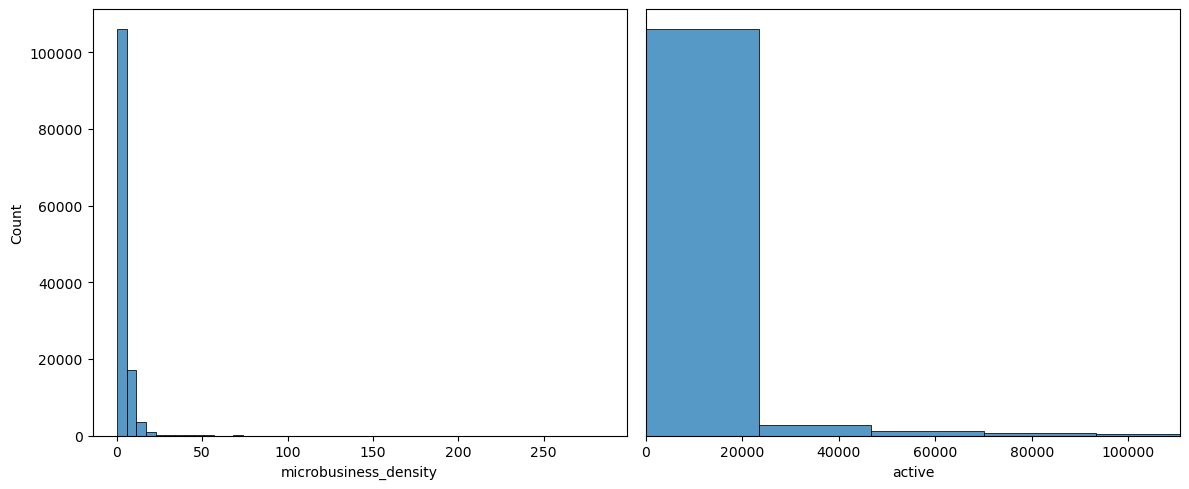

In [611]:
fig = plt.figure(figsize=(12, 5))

for x, feature in zip([1, 2], ['microbusiness_density', 'active']):
    ax = fig.add_subplot(1, 2, x)
    sb.histplot(x=data[feature], bins=50)
    
    if x == 2:
        ax.set_xlim(0, data[feature].quantile(0.99))  # Zoom into 99% quantile range
        plt.tick_params(
            axis='y',
            which='both',
            left=False,
            labelleft=False
        )
        plt.ylabel("")

plt.tight_layout()
plt.show()

Counties with highest microbusiness densities. Later it will be seen that these counties are the most responsible for trends of microbusiness densities in their respective state.

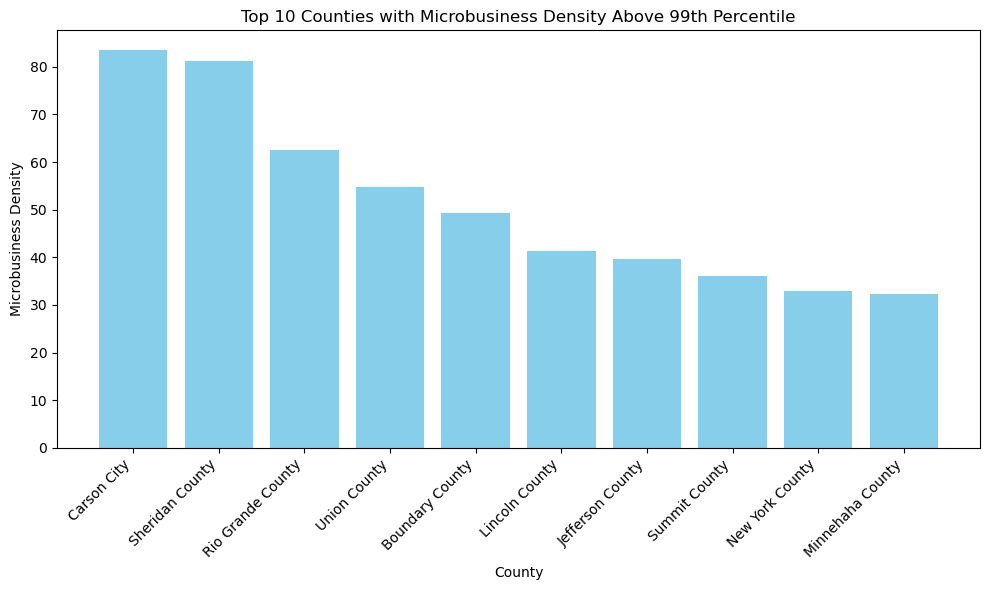

In [612]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
counties_mean = data.groupby('cfips', as_index=False)[numeric_cols].mean()
cfips_county_state = data[['cfips', 'county', 'state']].drop_duplicates()
counties_mean = counties_mean.merge(cfips_county_state, on='cfips', how='inner')
q99 = counties_mean['microbusiness_density'].quantile(0.99)
tail = counties_mean[counties_mean['microbusiness_density'] > q99]
top_tail_counties = tail.sort_values(by='microbusiness_density', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_tail_counties['county'], top_tail_counties['microbusiness_density'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Microbusiness Density')
plt.title('Top 10 Counties with Microbusiness Density Above 99th Percentile')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nevada shows lot of values at pretty higher range.<br>
South Dakota, Wyoming, Nevada have some values lying in the outlier range. It will be later shown why these points were obtained here.

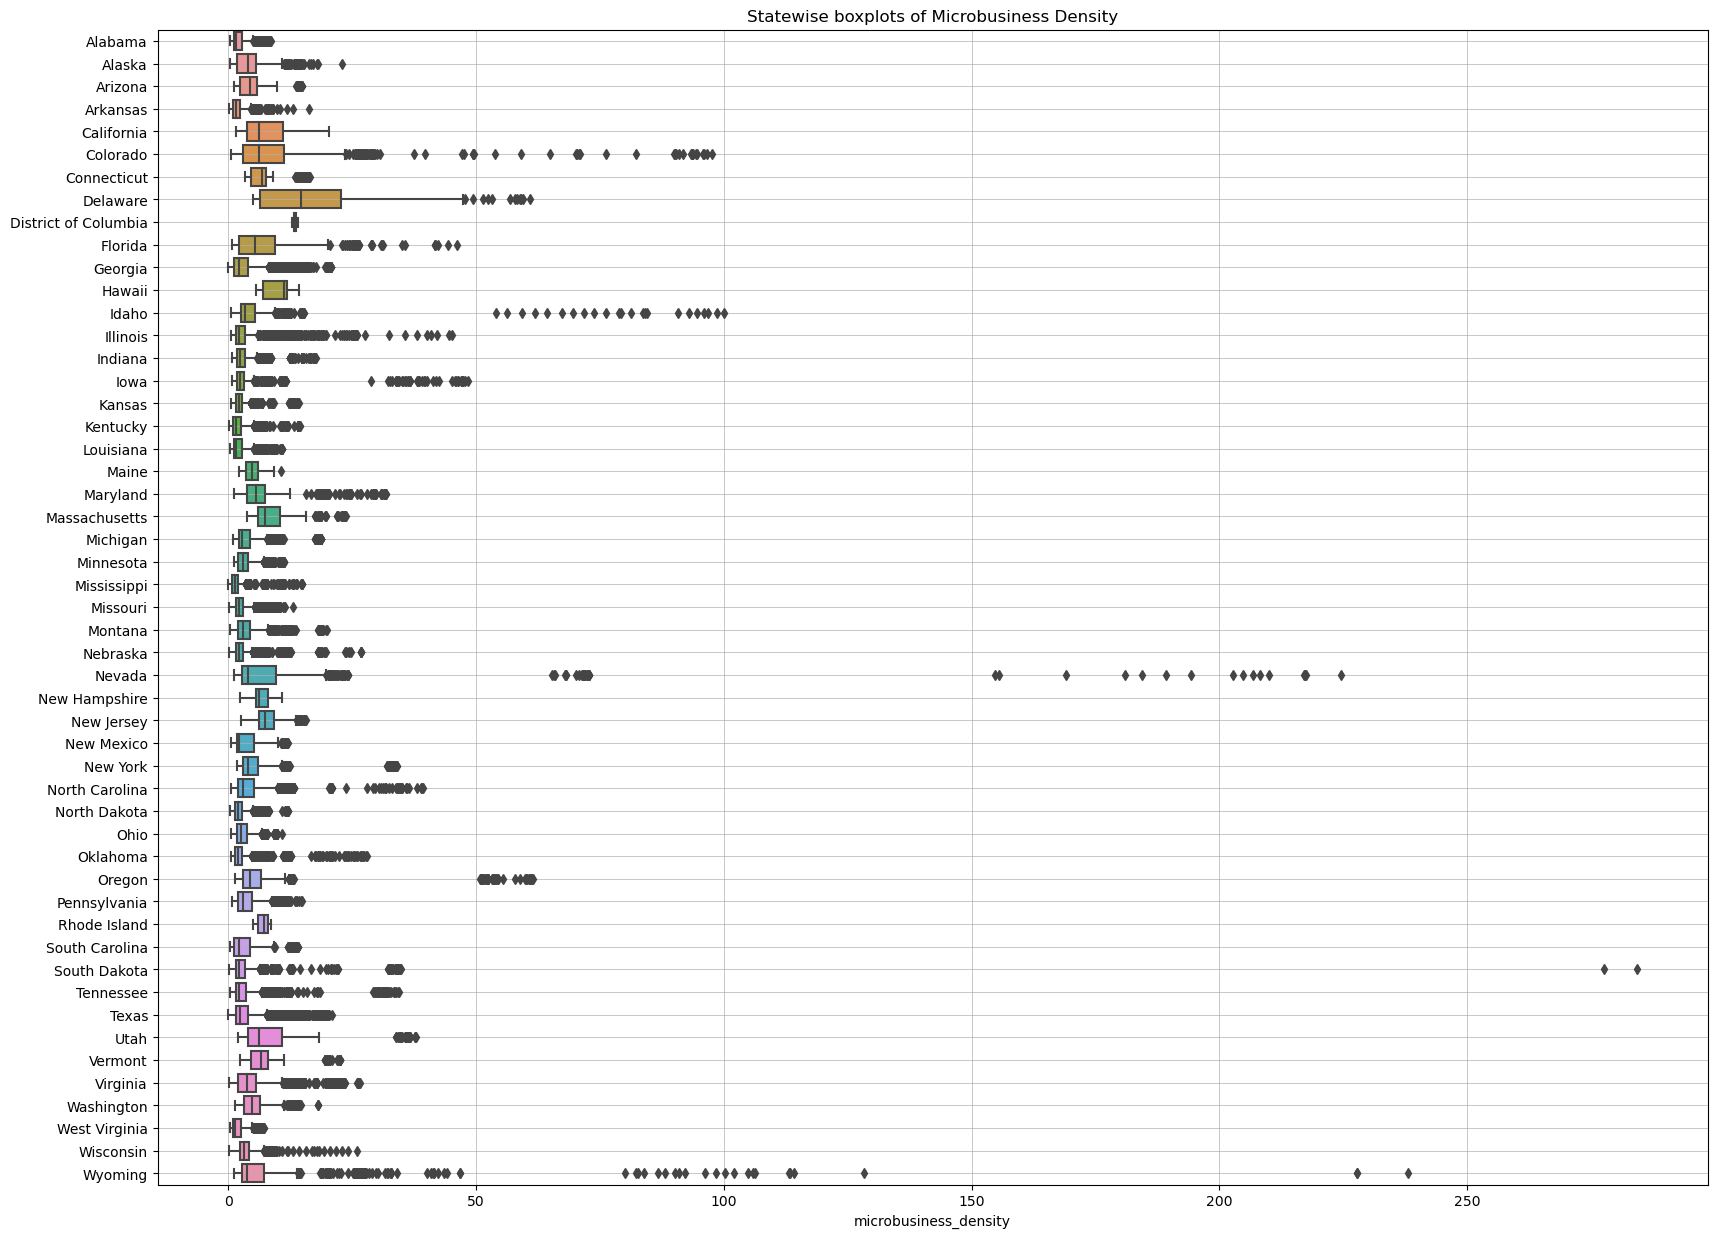

In [613]:
fig = plt.figure(figsize=(20,15))
sb.boxplot(data=data, y="state", x='microbusiness_density')
plt.grid(True, linewidth='0.5', axis='both')
plt.ylabel("")
plt.title("Statewise boxplots of Microbusiness Density")
plt.show()

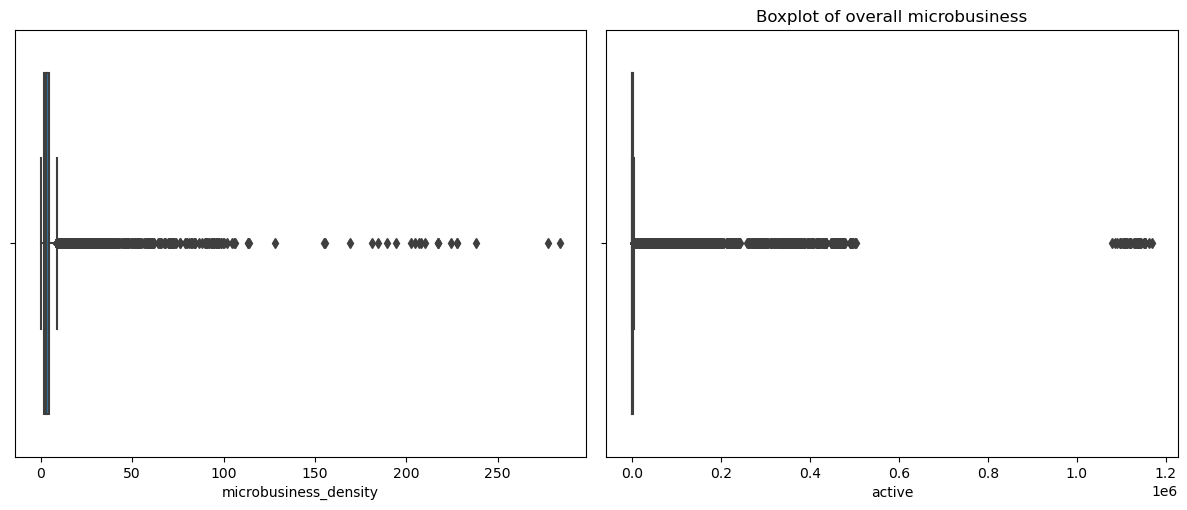

In [614]:
fig = plt.figure(figsize=(12,5))
x = 1
for feature in ['microbusiness_density','active']:
    ax = fig.add_subplot(1,2,x)
    sb.boxplot(x=data[feature])
    x += 1
plt.tight_layout()
plt.title("Boxplot of overall microbusiness")
plt.show()

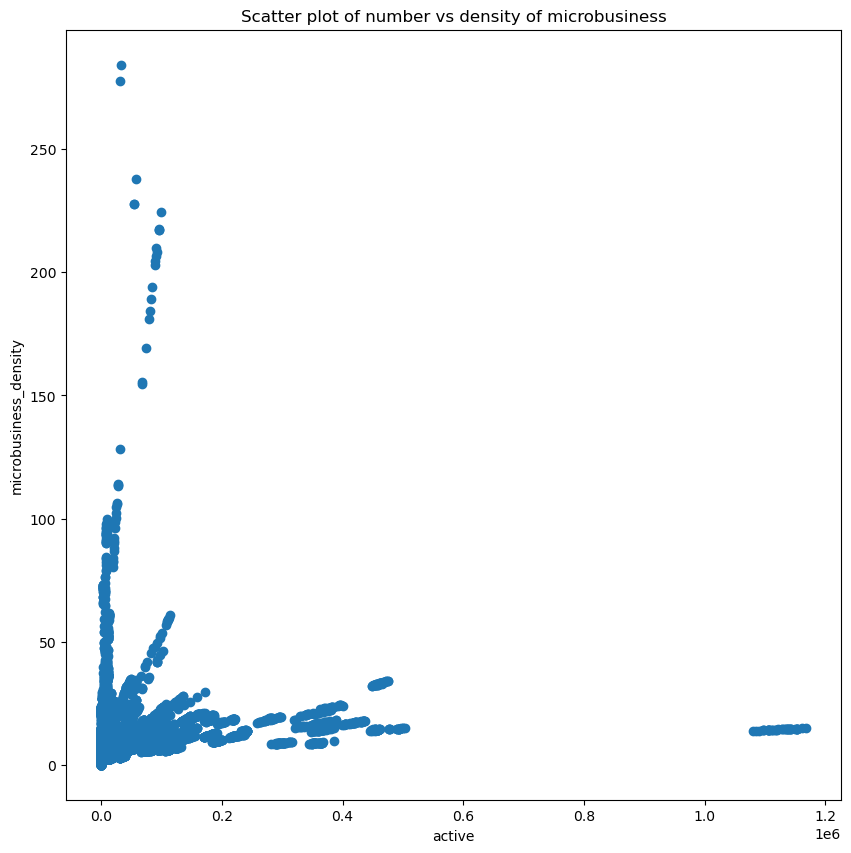

In [615]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y=data['microbusiness_density'],x=data["active"])
plt.xlabel("active")
plt.ylabel("microbusiness_density")
plt.title("Scatter plot of number vs density of microbusiness")
plt.show()

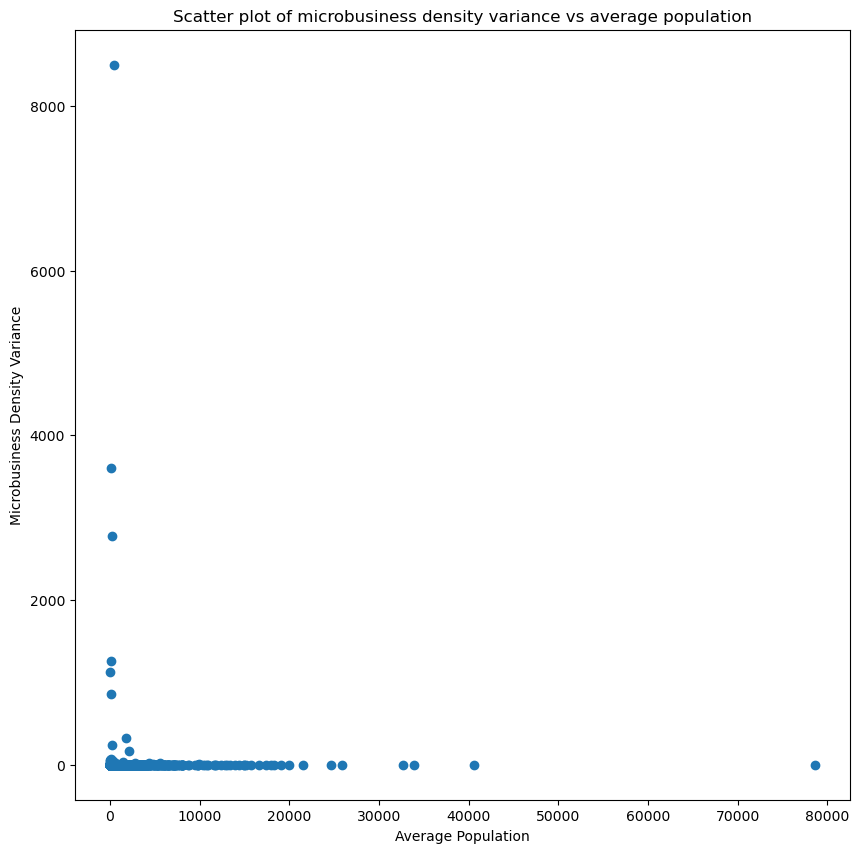

In [616]:
avg_pop = pd.concat([data['cfips'], data['active']/data['microbusiness_density']], axis=1).groupby(by='cfips').mean().reset_index()
avg_pop.columns = ['cfips','avg_population']

var_bus = pd.concat([data['cfips'],data['microbusiness_density']], axis=1).groupby(by='cfips').var().reset_index()
var_bus.columns = ['cfips', 'var_bus']

fig = plt.figure(figsize=(10,10))
plt.scatter(y=var_bus['var_bus'],x=avg_pop['avg_population'])
plt.xlabel("Average Population")
plt.ylabel("Microbusiness Density Variance")
plt.title("Scatter plot of microbusiness density variance vs average population")
plt.show()

As seen, the microbusinesses isn't affected by any month or festival lying in any month

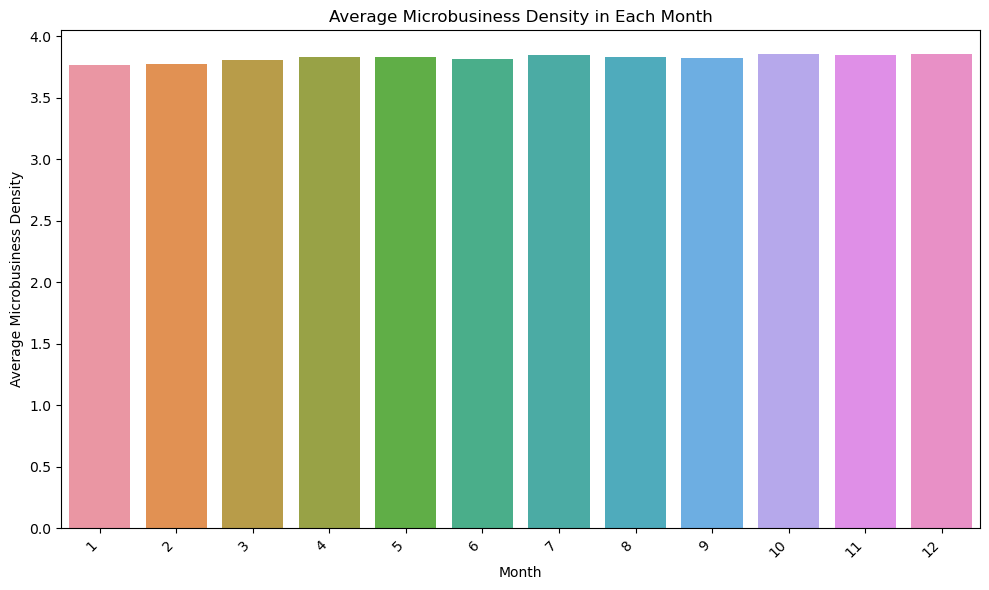

In [617]:
data['month_temp'] = pd.Categorical(data['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

plt.figure(figsize=(10, 6))
sb.barplot(x='month', y='microbusiness_density', data=data, estimator='mean', ci=None)
plt.title('Average Microbusiness Density in Each Month')
plt.xlabel('Month')
plt.ylabel('Average Microbusiness Density')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
data.drop(columns=['month_temp'],inplace=True)

The microbusiness density increases after 2020. A small drop was obtained from 2019 to 2020, probably due to COVID-19 pandemic.

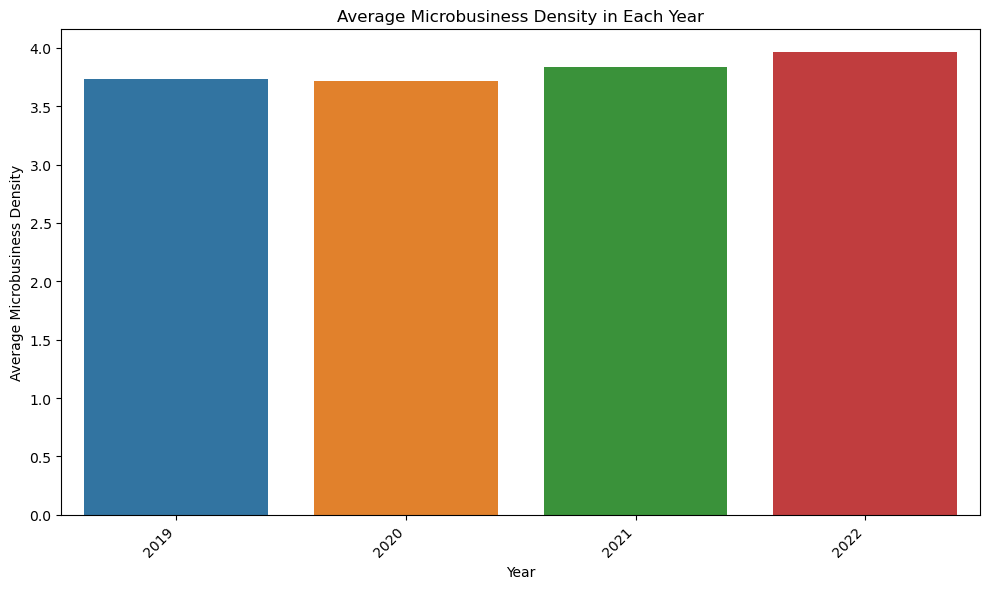

In [618]:
plt.figure(figsize=(10, 6))
sb.barplot(x='year', y='microbusiness_density', data=data, estimator='mean', ci=None)
plt.title('Average Microbusiness Density in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Microbusiness Density')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Trends of microbusiness average over all counties. Here also small drop was seen during early 2020 period of the pandemic.

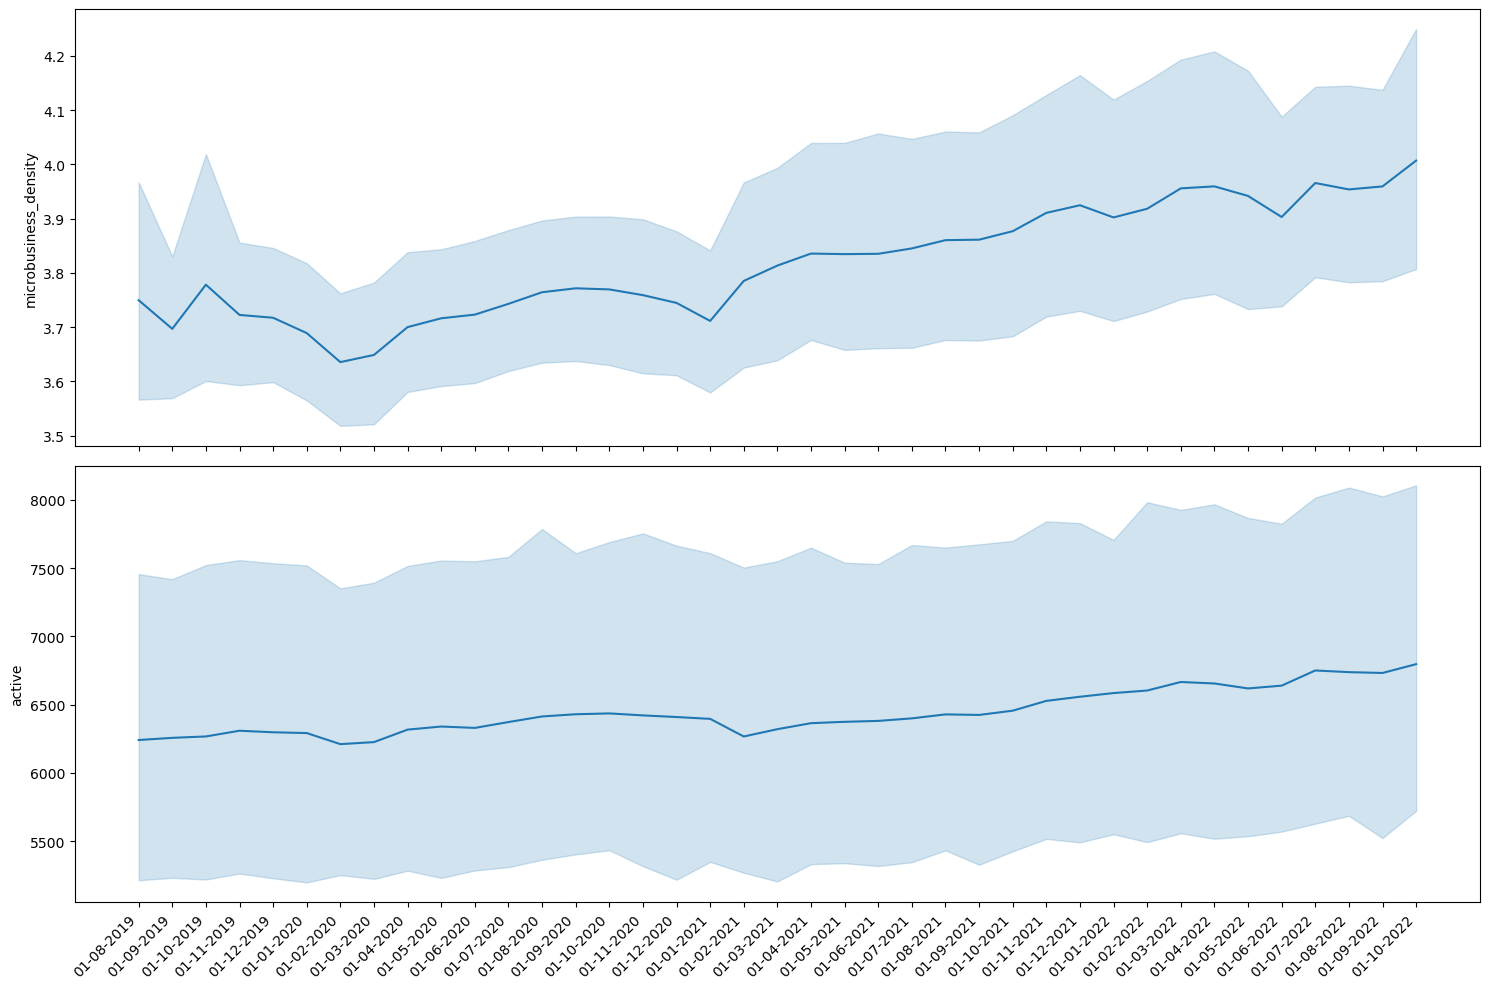

In [619]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,10),sharex=True)
sb.lineplot(x=train['first_day_of_month'],y=train['microbusiness_density'],ax=ax1)
sb.lineplot(x=train['first_day_of_month'],y=train['active'],ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.tight_layout()
plt.show()

Trends of census data averaged over all counties.<br>
-> Percentage of people with access to the broadband internet steadily increased to 80%<br>
-> Percentage of people with a college degree increases but this increase was only around 1%<br>
-> Percentage of foreign born people started to drop since beginning of 2019 but the difference was not big (around 4.7%)<br>
-> Percentage of IT workers goes down and was around 1.3%<br>
-> Median household income increases upto $58000 per year<br>

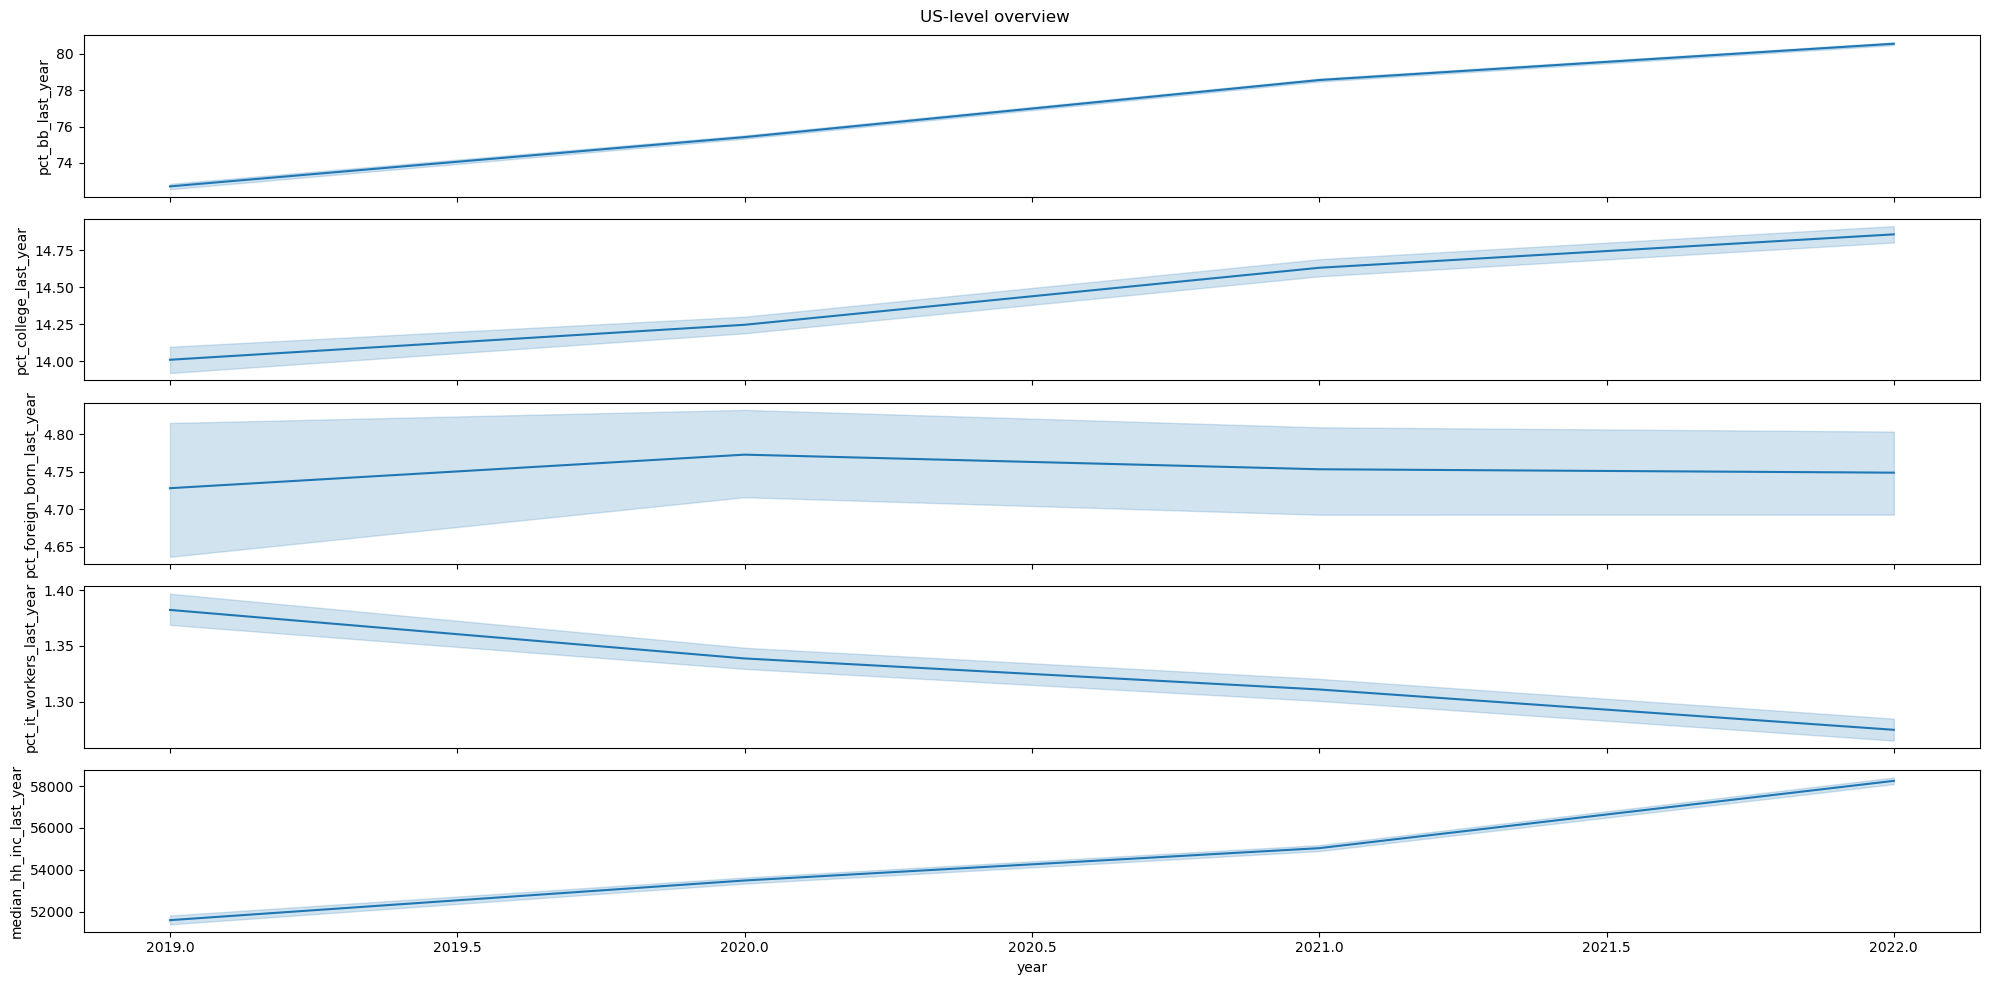

In [620]:
fig, axes = plt.subplots(5,1, figsize=(20,10), sharex=True)
sb.lineplot(data=data, x="year", y="pct_bb_last_year", ax=axes[0])
sb.lineplot(data=data, x="year", y="pct_college_last_year", ax=axes[1])
sb.lineplot(data=data, x="year", y="pct_foreign_born_last_year", ax=axes[2])
sb.lineplot(data=data, x="year", y="pct_it_workers_last_year", ax=axes[3])
sb.lineplot(data=data, x="year", y="median_hh_inc_last_year", ax=axes[4])
plt.suptitle('US-level overview')
plt.tight_layout()
plt.show()

Microbusiness density trends of all states<br>
-> District of Columbia had an unusual trends (continuous rise and drops)<br>
-> Hawaii, South Dakota, Wisconsin had drops after 2020<br>
-> Nevada has a plateau kind of shape between 2021 and 2022.<br>
-> Other all states had very small increasing or decreasing trends.

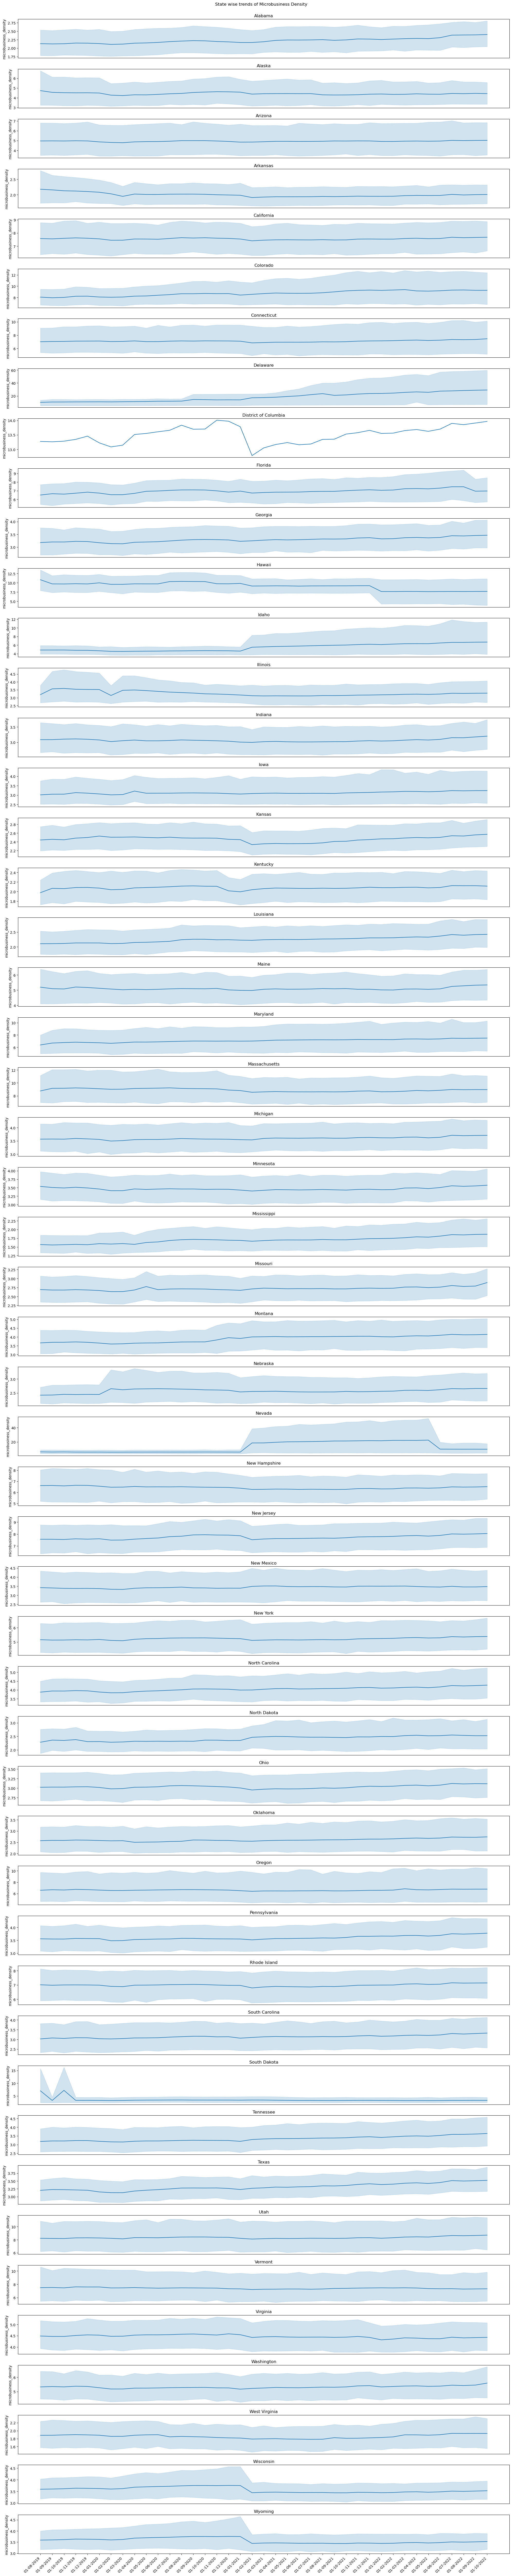

In [621]:
fig = plt.figure(figsize=(20,100))
x = 1
for state in train['state'].unique()[:-1]:
    ax = fig.add_subplot(51,1,x)
    sb.lineplot(x=train.loc[train['state']==state, 'first_day_of_month'], y=train.loc[train['state']==state,'microbusiness_density'])
    plt.title(state)
    plt.xlabel("")
    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False
    )
    x += 1
ax = fig.add_subplot(51,1,x)
sb.lineplot(x=train.loc[train['state']==state, 'first_day_of_month'], y=train.loc[train['state']==state,'microbusiness_density'])
plt.title(train['state'].unique()[-1])
plt.xticks(rotation=45,ha='right')
plt.xlabel("")
ttl = plt.suptitle('State wise trends of Microbusiness Density')
ttl.set_position([.51,1.00])
plt.tight_layout()
plt.show()

This plot indirectly shows the trend of each state. Most of the states saw rise in microbusiness density over these years.

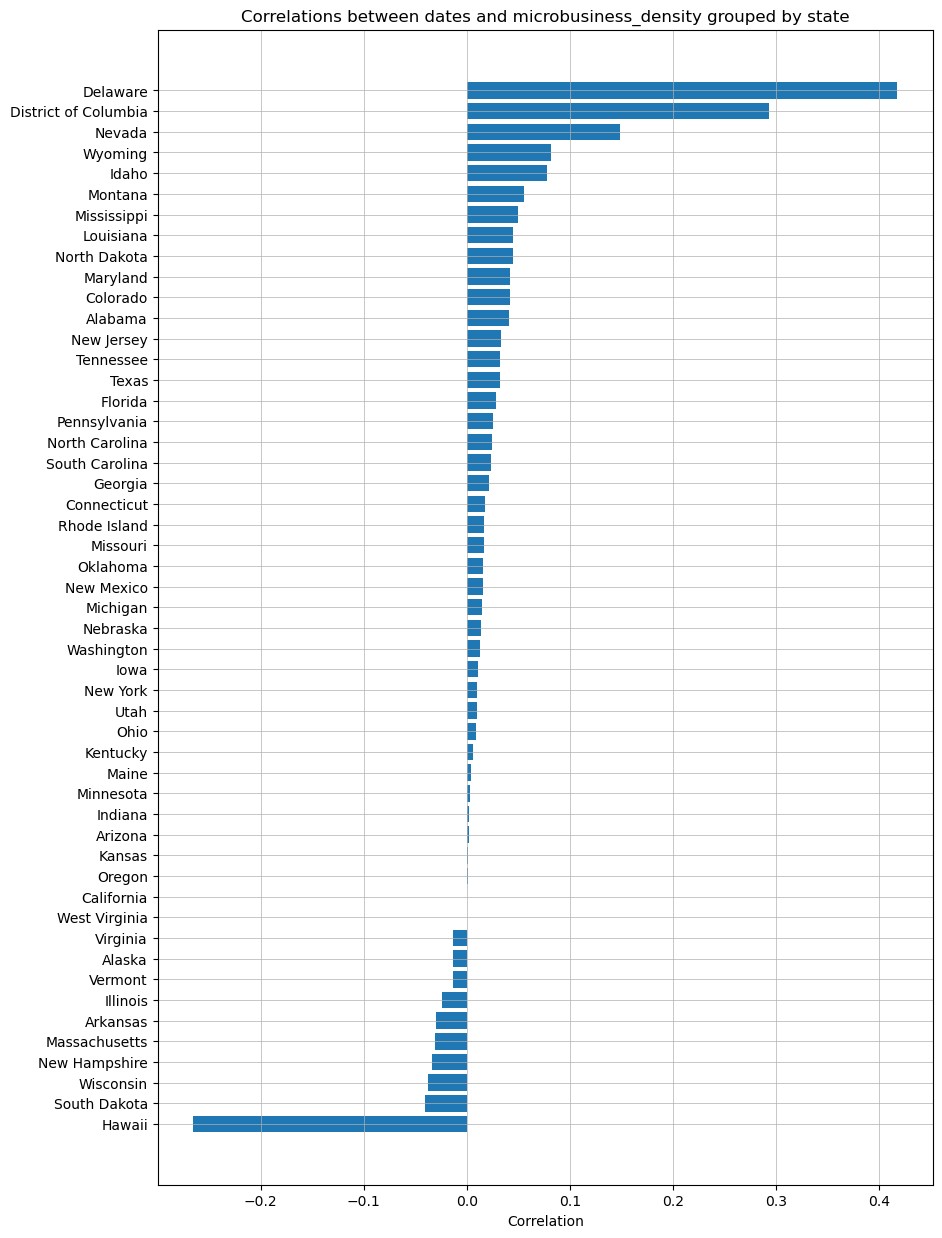

In [622]:
days_conv = list()
for date in pd.to_datetime(train["first_day_of_month"]):
    days_conv.append((date - pd.to_datetime(date.today())).days)

temp = pd.concat([pd.Series(days_conv),train["state"],train["microbusiness_density"]],axis=1)
temp.columns = ["days_since", "state", "microbusiness_density"]

corr_by_state = list()
for state in temp["state"].unique():
    corr_by_state.append(temp.loc[temp["state"]==state, ["days_since", "microbusiness_density"]].corr().values[0][1])
corr_by_state = pd.Series(corr_by_state, index=temp["state"].unique())

fig = plt.figure(figsize=(10,15))
plt.barh(width=corr_by_state.sort_values().values, y=corr_by_state.sort_values().index)
plt.grid(True,linewidth = "0.5")
plt.title("Correlations between dates and microbusiness_density grouped by state")
plt.xlabel("Correlation")
plt.show()

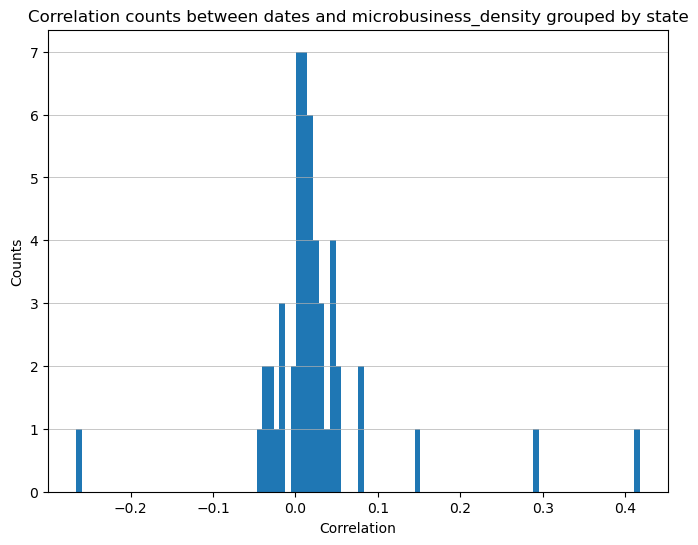

In [623]:
fig = plt.figure(figsize=(8,6))
plt.hist(corr_by_state.sort_values(),bins=100)
plt.xlabel("Correlation")
plt.ylabel("Counts")
plt.title("Correlation counts between dates and microbusiness_density grouped by state")
plt.grid(True,linewidth = "0.5",axis="y")
plt.show()

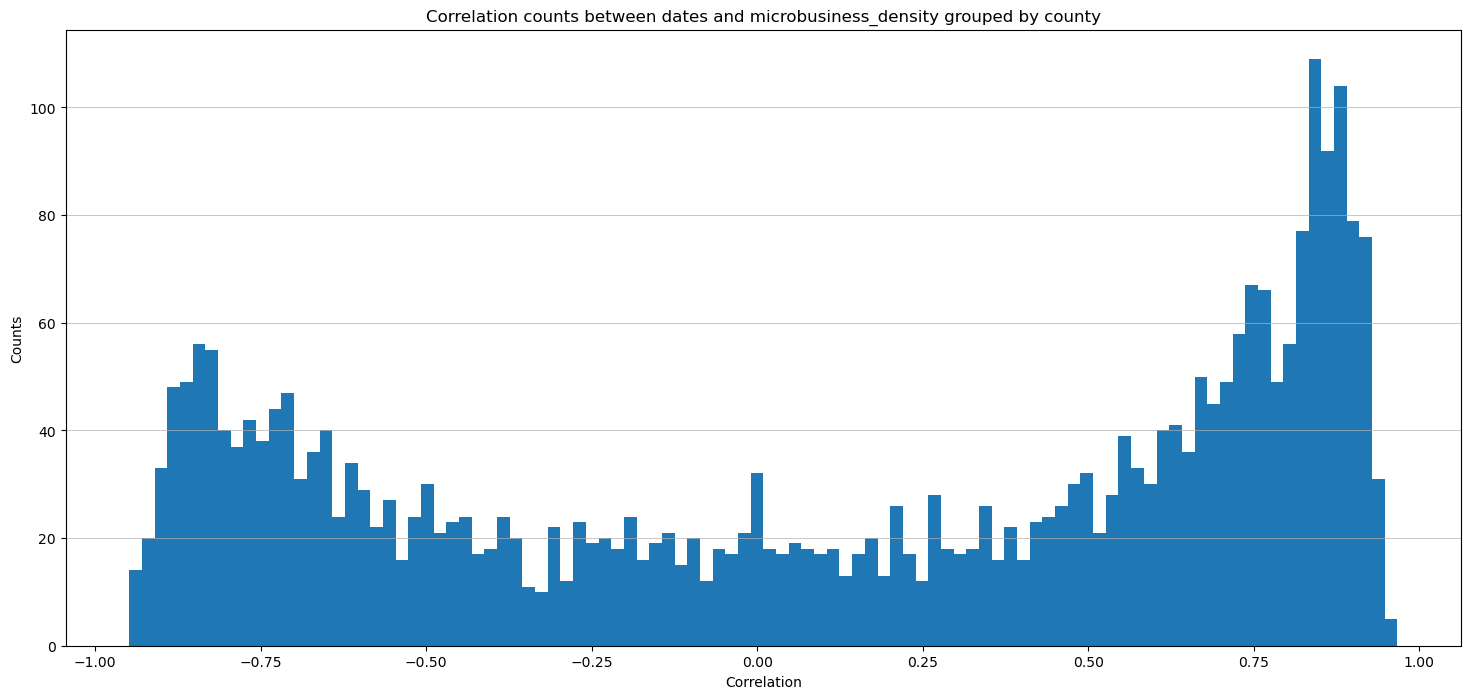

In [624]:
temp = pd.concat([pd.Series(days_conv),train["county"] + ", " + train["state"],train["state"],train["microbusiness_density"]],axis=1)
temp.columns = ["days_since", "county_state", "state", "microbusiness_density"]

corr_by_county = list()
for county in temp["county_state"].unique():
    corr_by_county.append(temp.loc[temp["county_state"]==county, ["days_since", "microbusiness_density"]].corr().values[0][1])
corr_by_county = pd.Series(corr_by_county, index=temp["county_state"].unique())

fig = plt.figure(figsize=(18,8))
plt.hist(corr_by_county.sort_values(),bins=100)
plt.xlabel("Correlation")
plt.ylabel("Counts")
plt.title("Correlation counts between dates and microbusiness_density grouped by county")
plt.grid(True,linewidth = "0.5",axis="y")
plt.show()

The lag(1) in the one of the previous was derived using these plots. As seen almost all states had signficant Autocorrelation to its previous value, thus indicating that only previous values are significant indicator of current values.

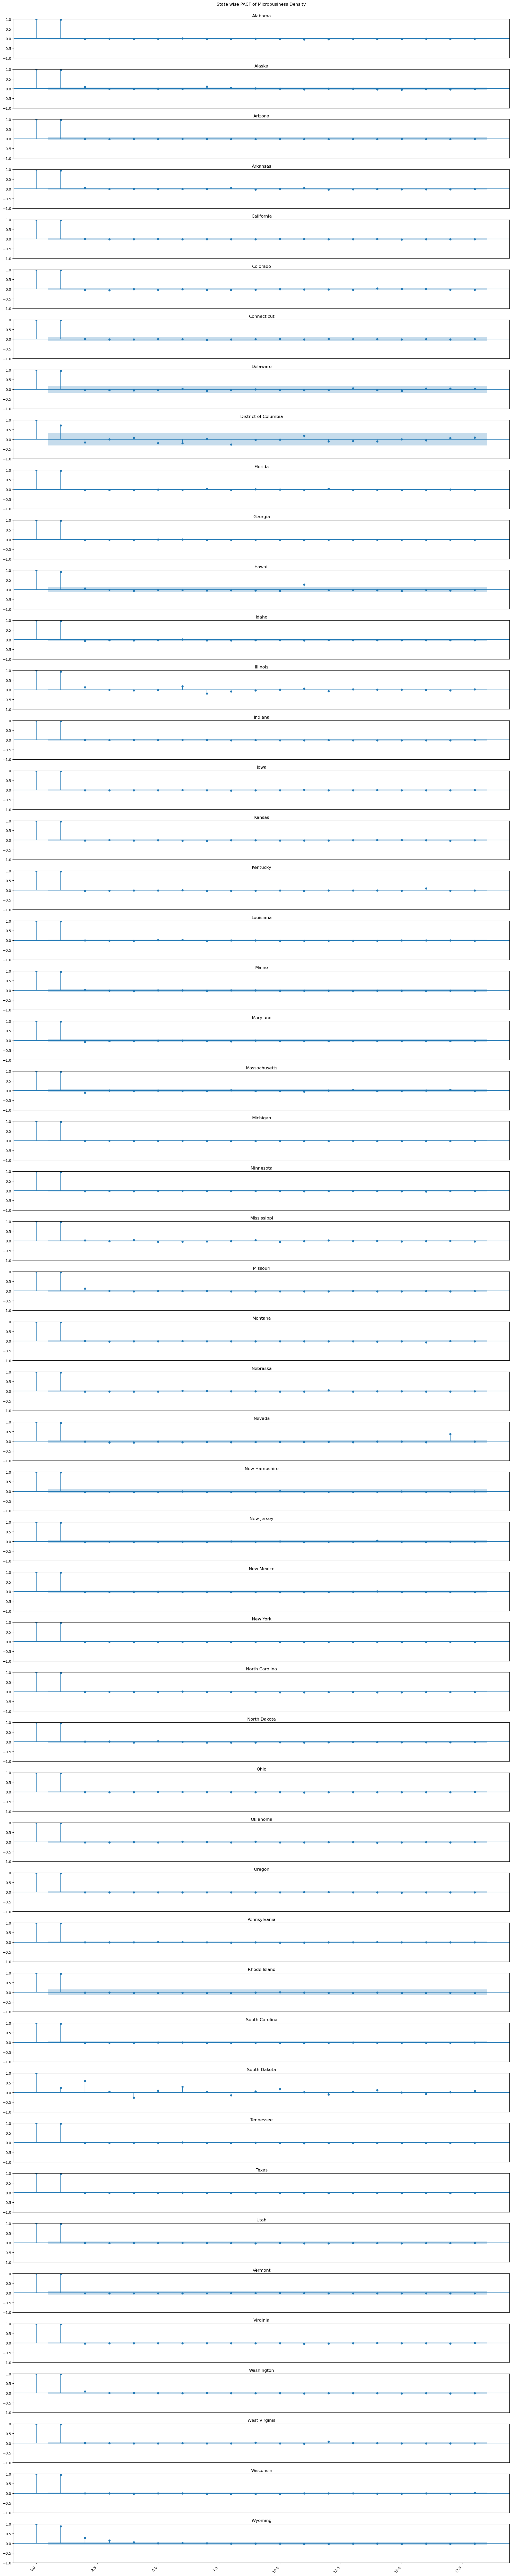

In [625]:
fig = plt.figure(figsize=(20, 100))
x = 1

for state in train['state'].unique()[:-1]:
    ax = fig.add_subplot(51, 1, x)
    plot_pacf(train.loc[train['state'] == state, 'microbusiness_density'], ax=ax, lags=18)
    plt.title(state)
    plt.xlabel("")
    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False
    )
    x += 1

# For the last state
ax = fig.add_subplot(51, 1, x)
plot_pacf(train.loc[train['state'] == train['state'].unique()[-1], 'microbusiness_density'], ax=ax, lags=18)
plt.title(train['state'].unique()[-1])
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
ttl = plt.suptitle('State wise PACF of Microbusiness Density')
ttl.set_position([.51, 1.00])
plt.tight_layout()
plt.show()

Except feature related to braodband connection, all feature had a left skew, indicating the broadband connectivity over the entire US is pretty good right from 2017.

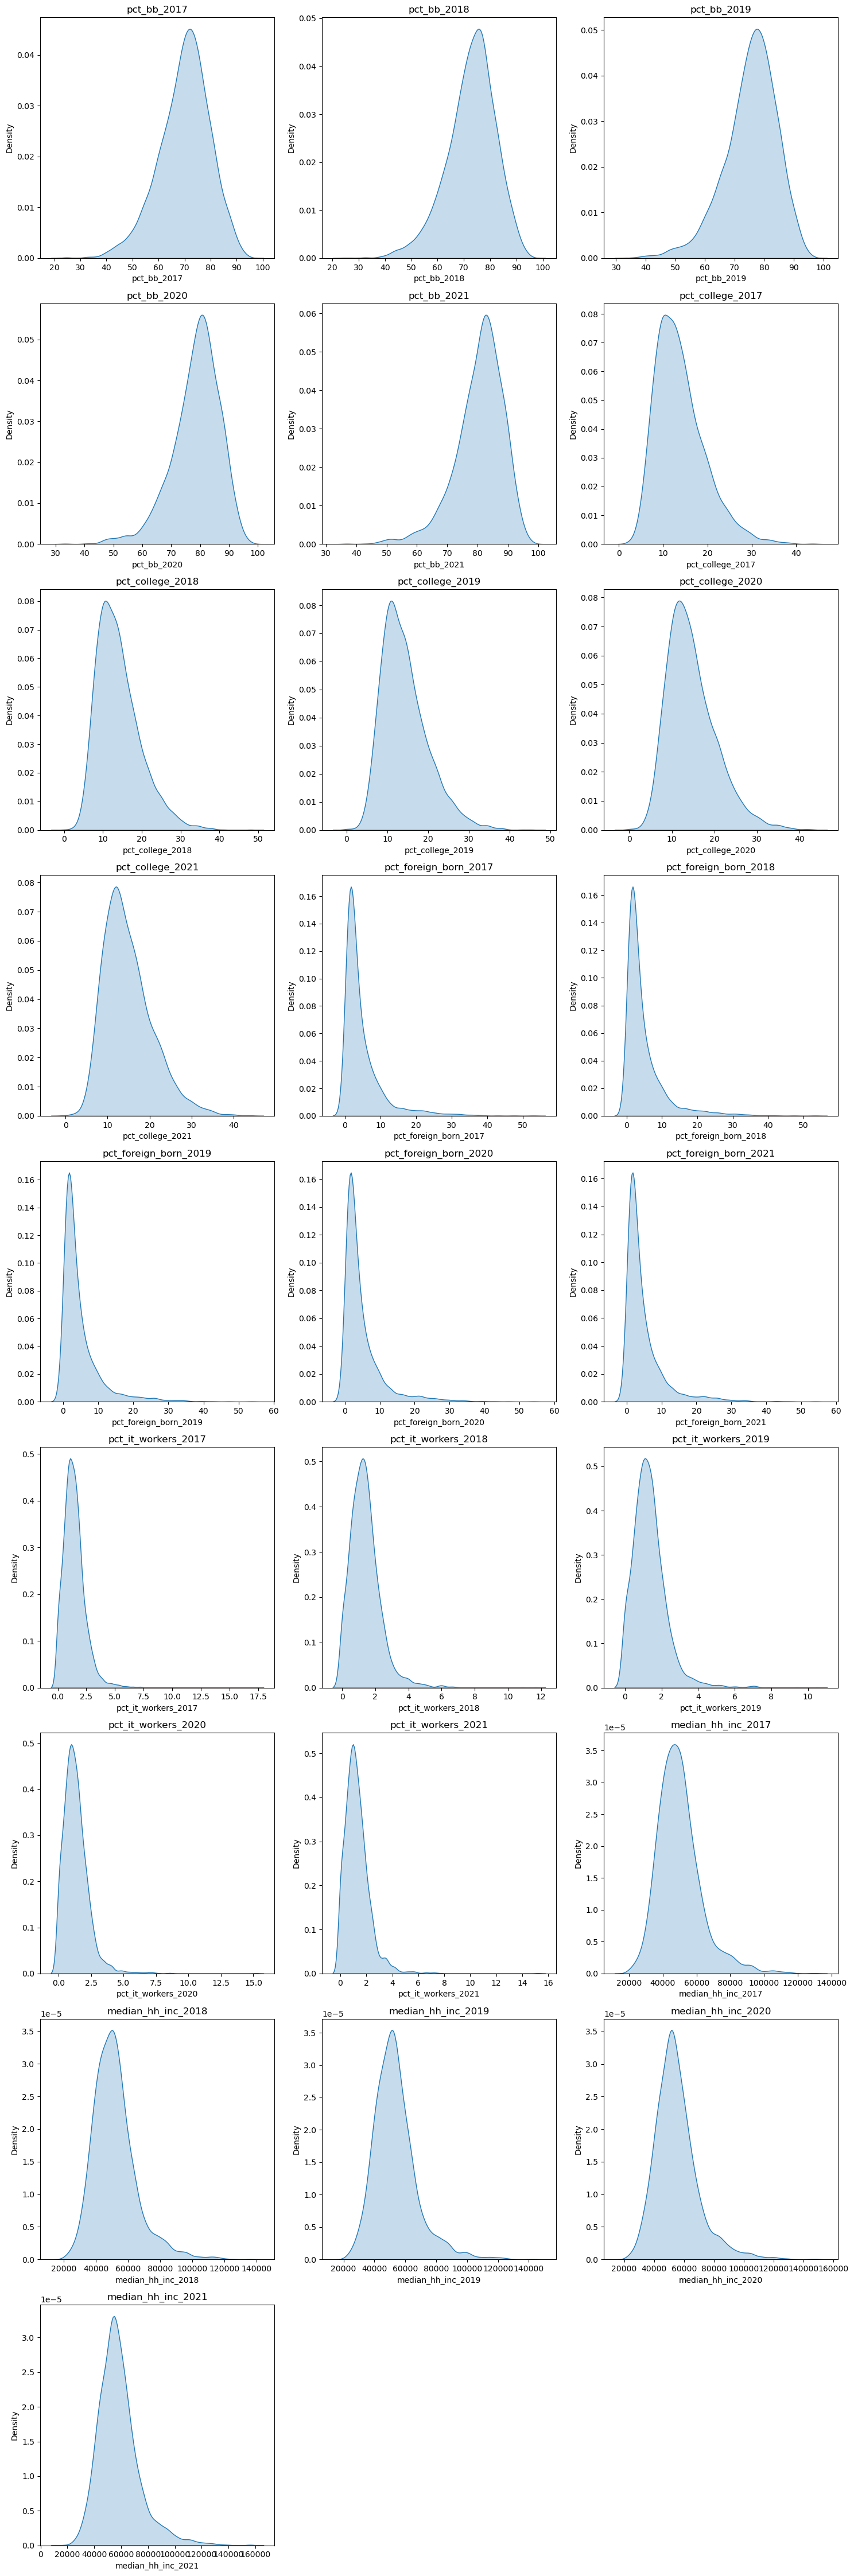

In [626]:
num_cols = len(census.columns)
num_rows = -(-num_cols // 3) 
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(census.columns):
    plt.subplot(num_rows, 3, i + 1)
    sb.kdeplot(census[col], fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

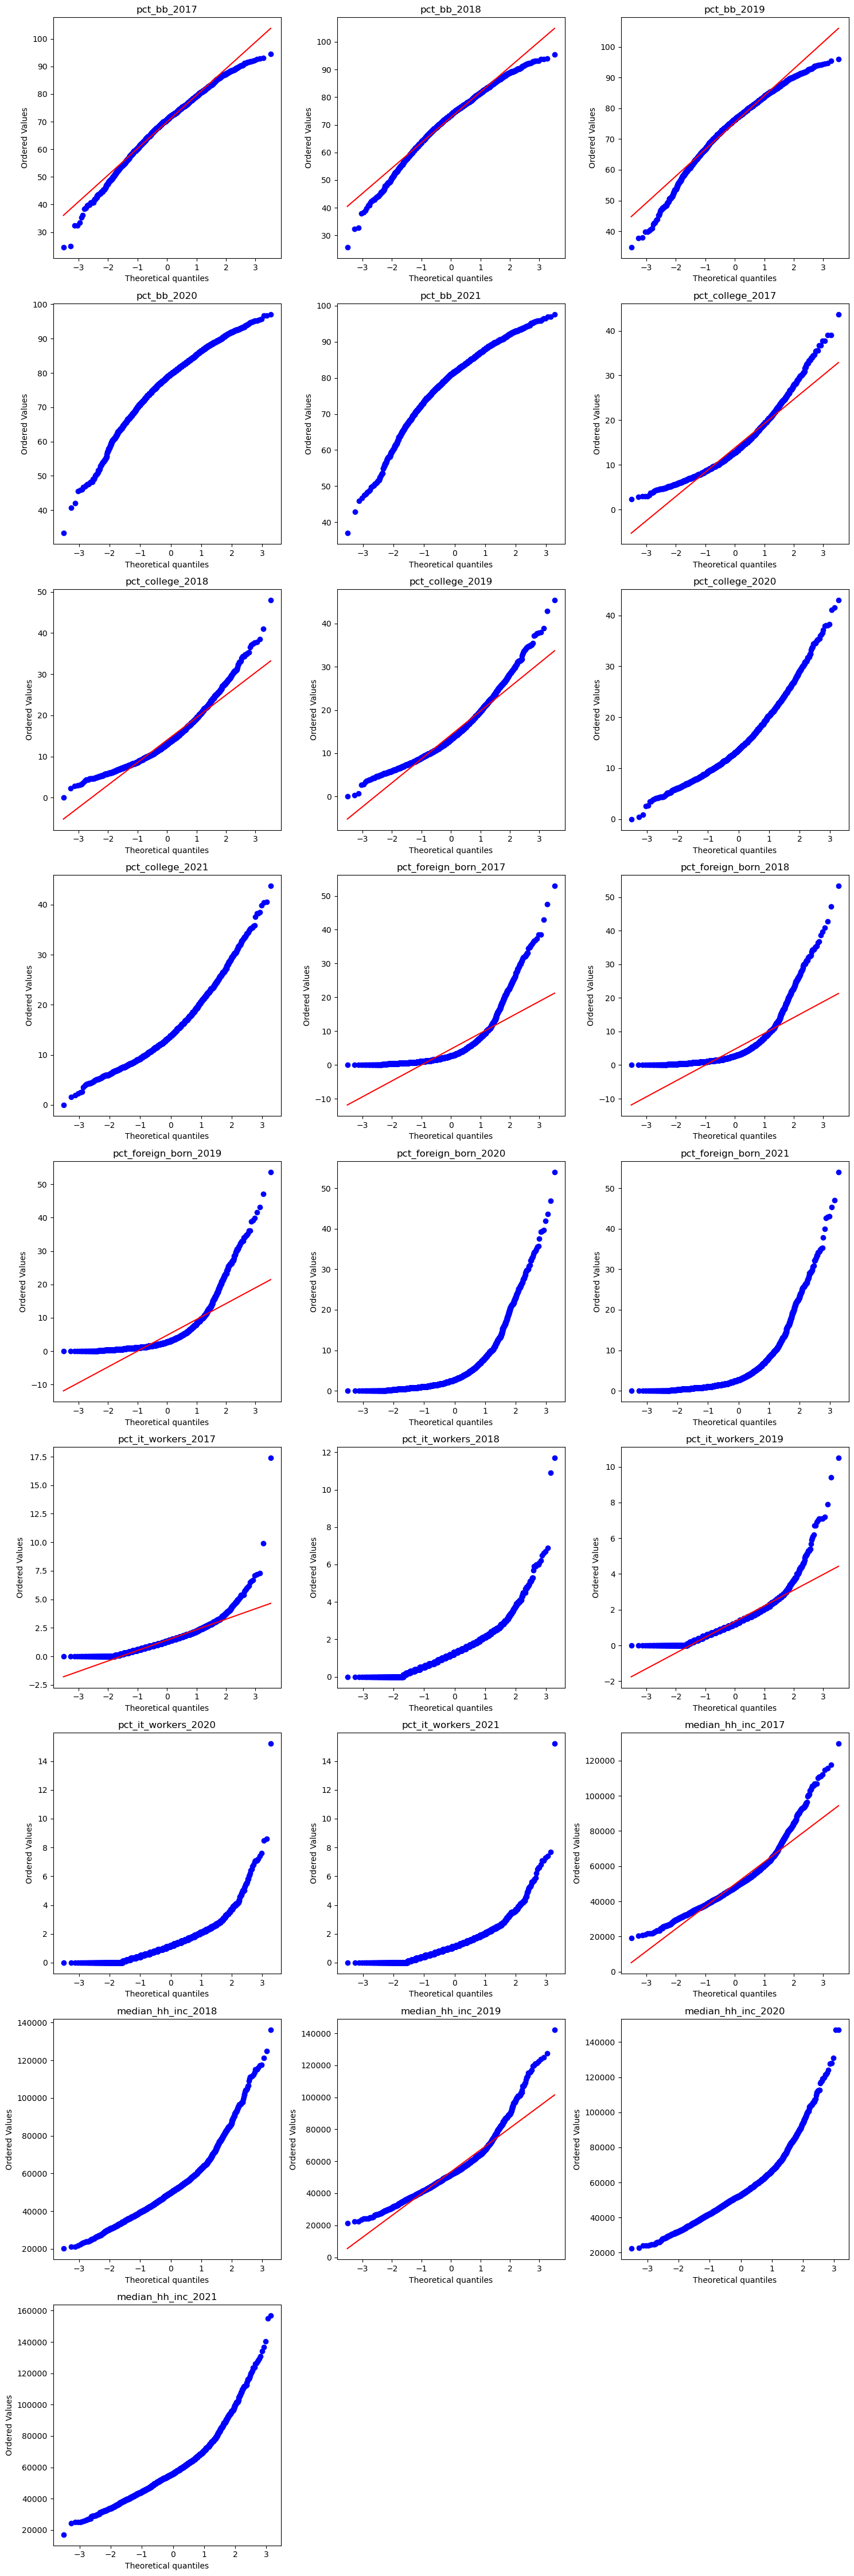

In [627]:
import scipy.stats as stats

num_cols = len(census.columns)
num_rows = -(-num_cols // 3) 
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(census.columns):
    plt.subplot(num_rows, 3, i + 1)
    stats.probplot(census[col], dist="norm", plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()

The plot of microbusiness density and active had almost no counties in common. This shows both of these features are never a direct indicator each other.<br>
A high density shows on an average, there are more number of microbusinesses within fixed number of people.

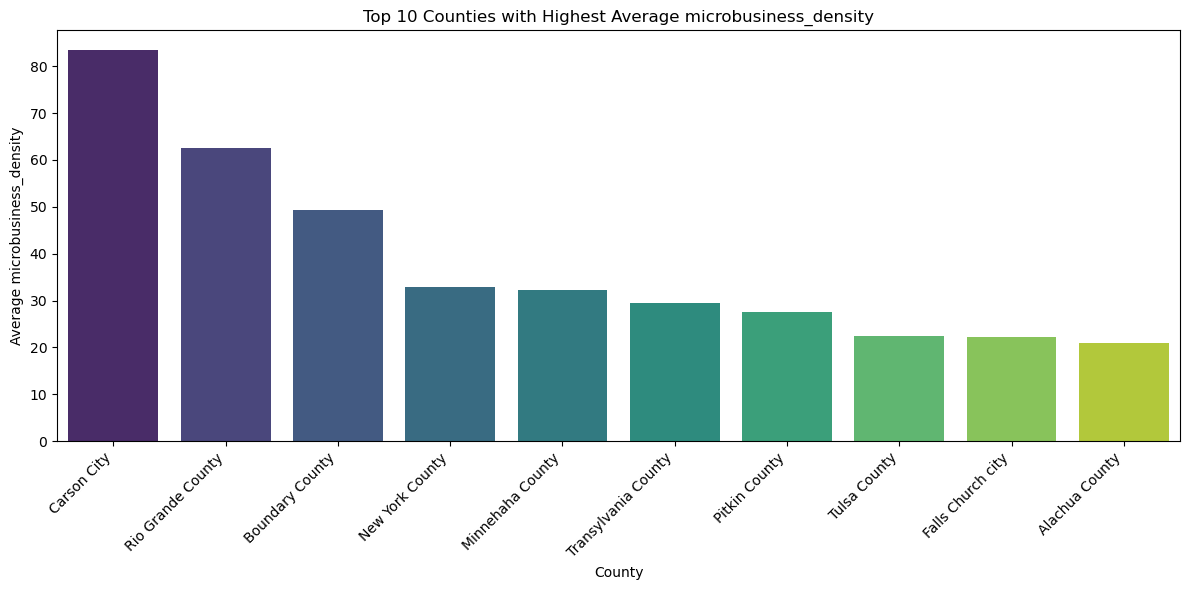

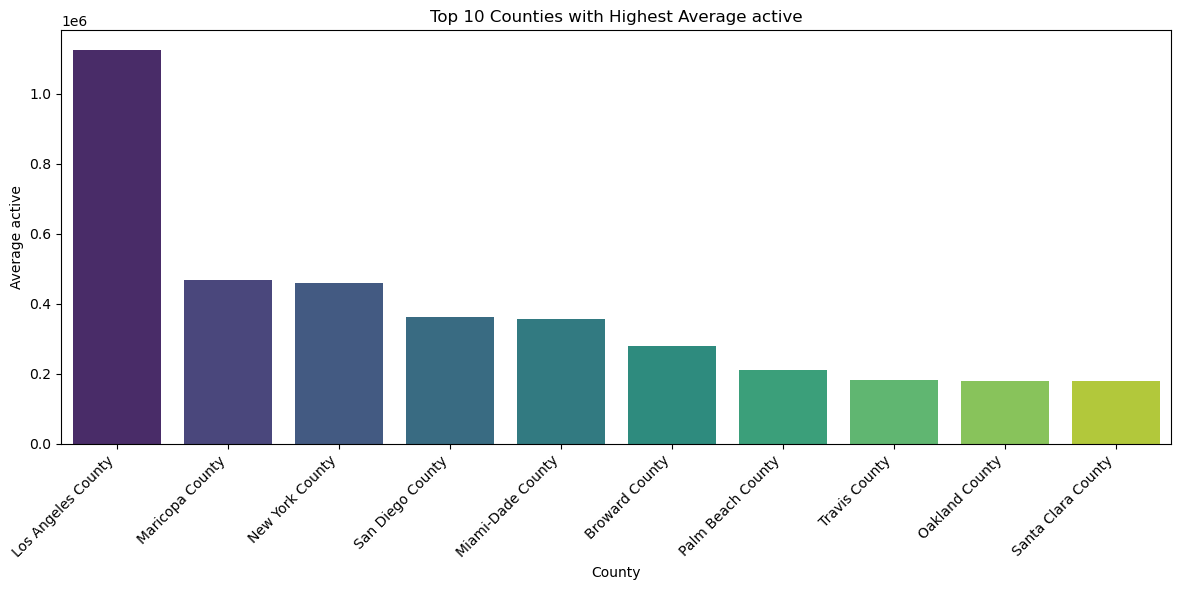

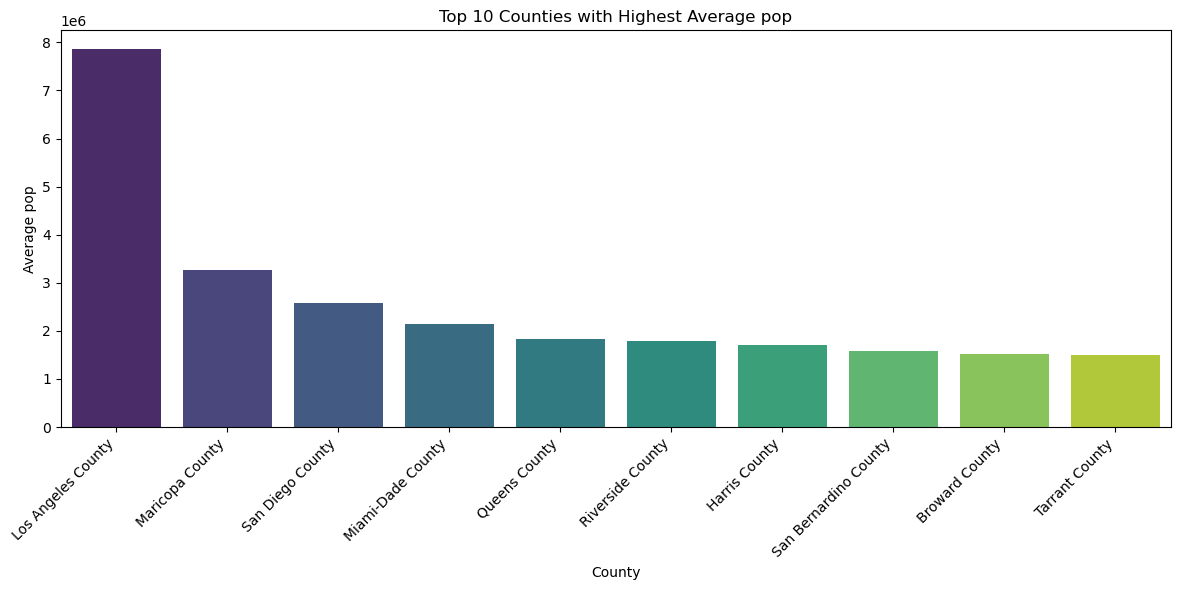

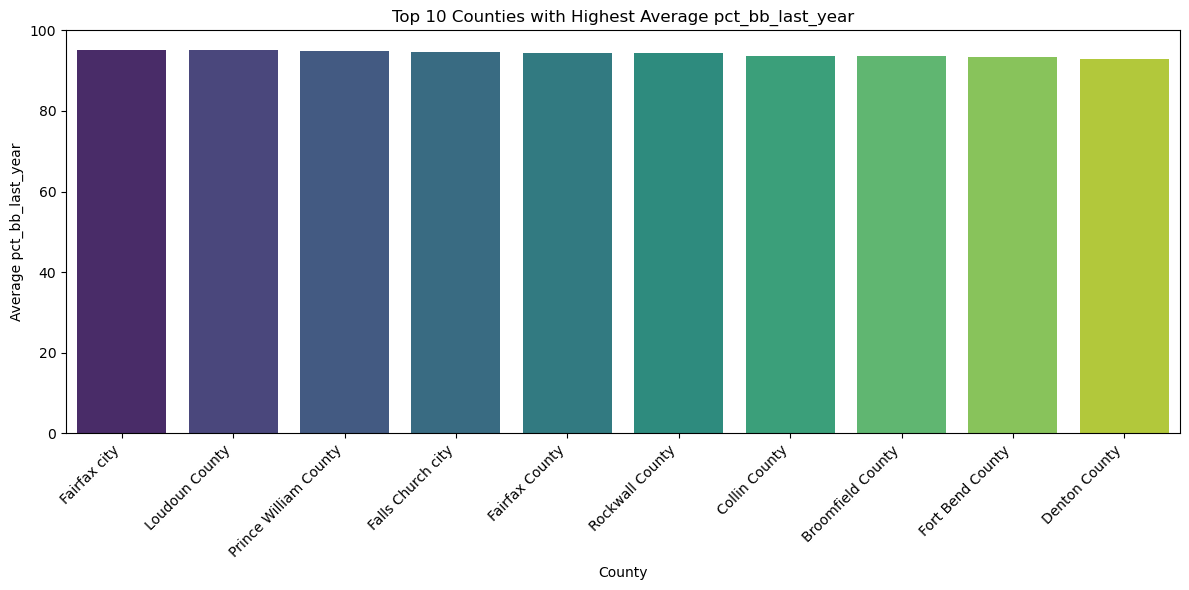

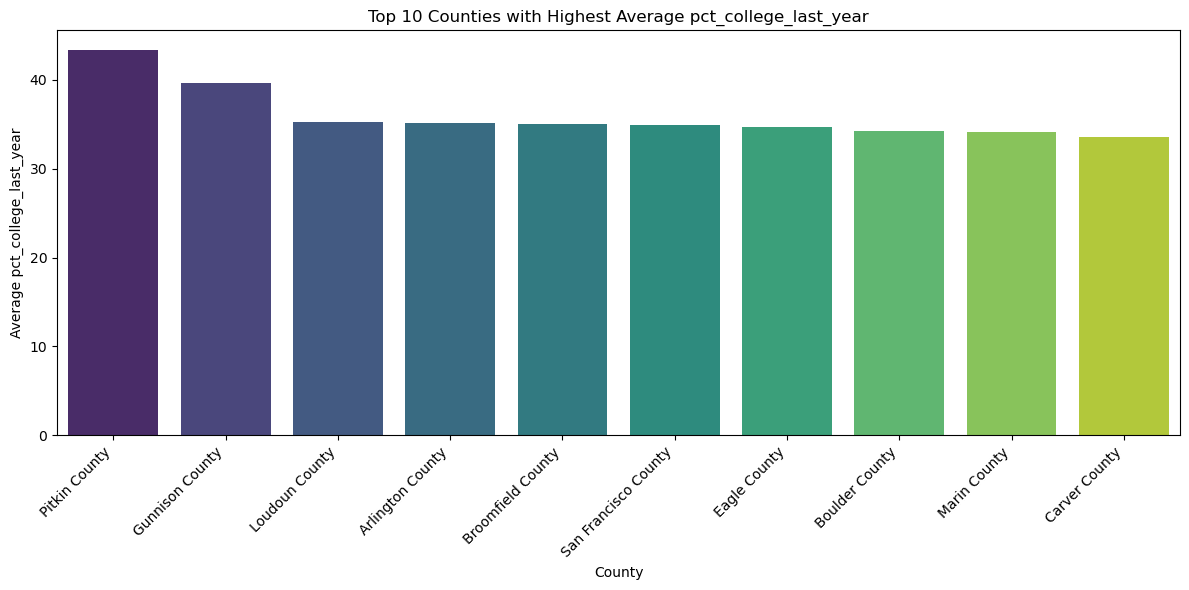

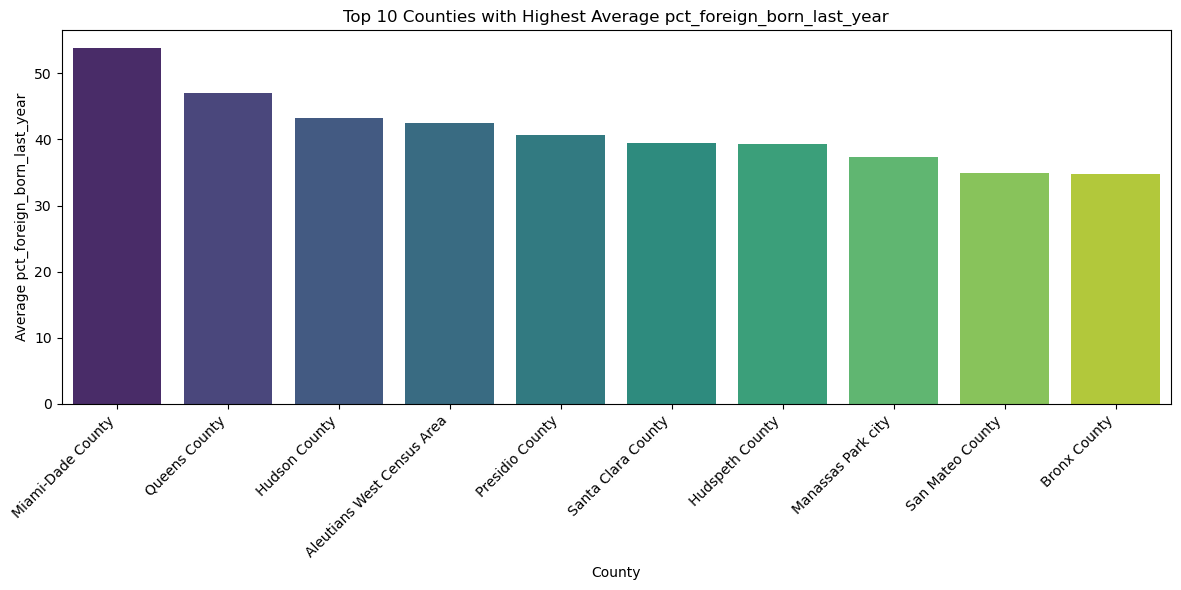

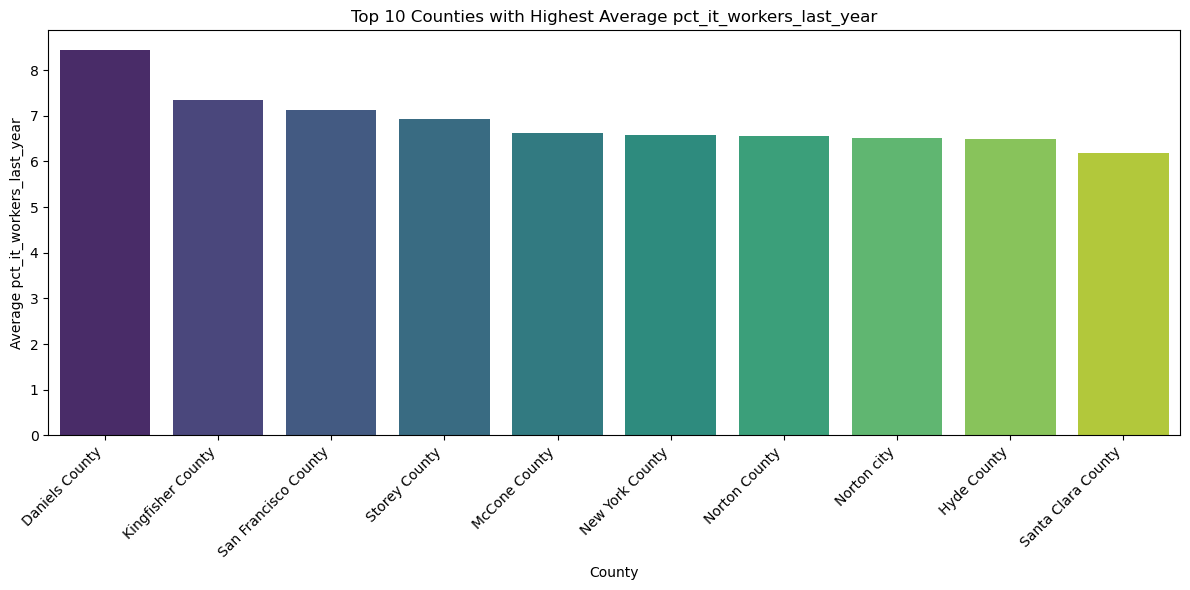

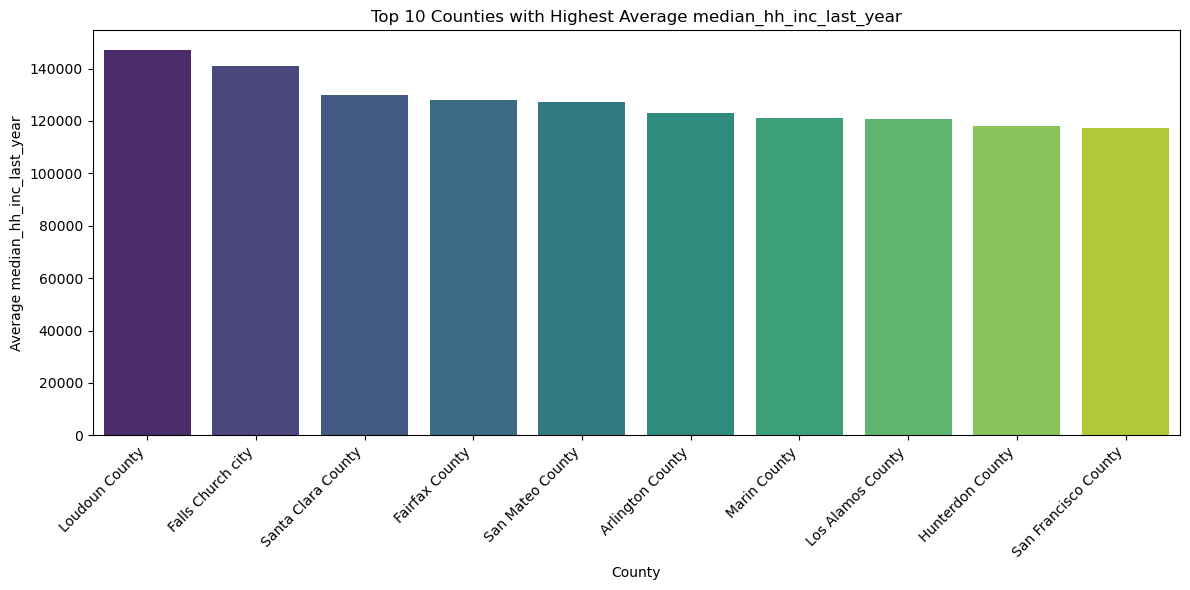

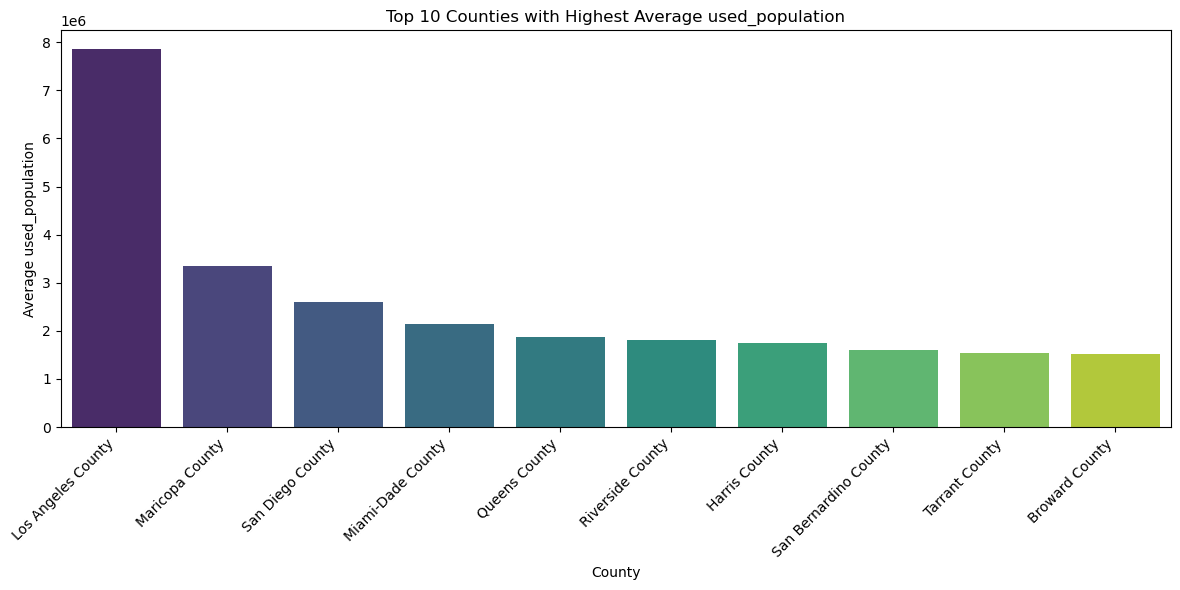

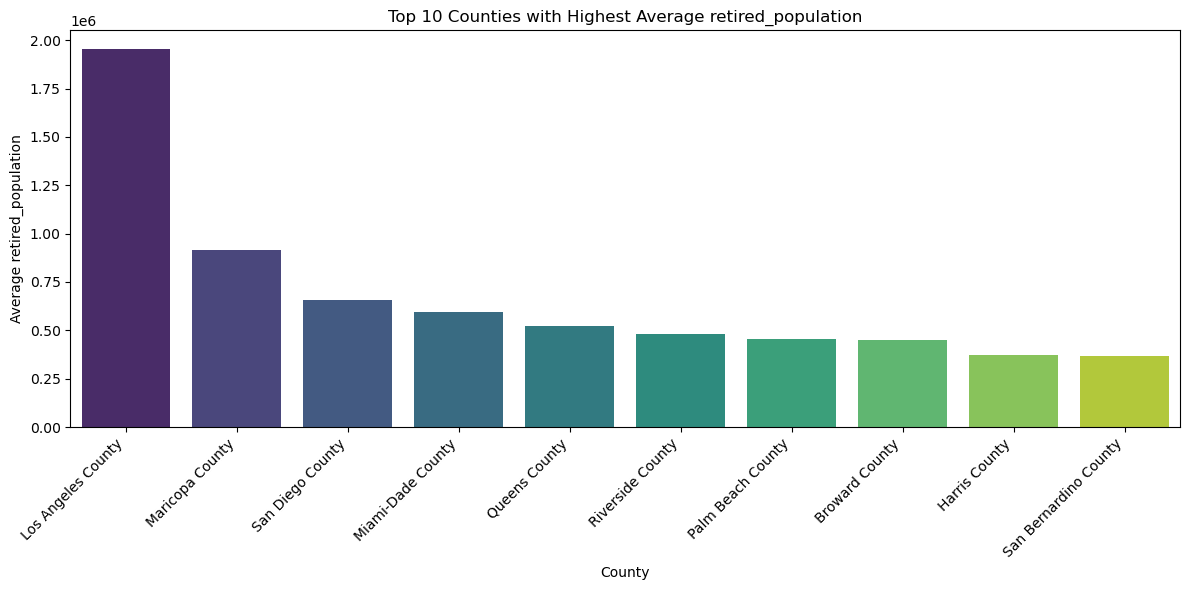

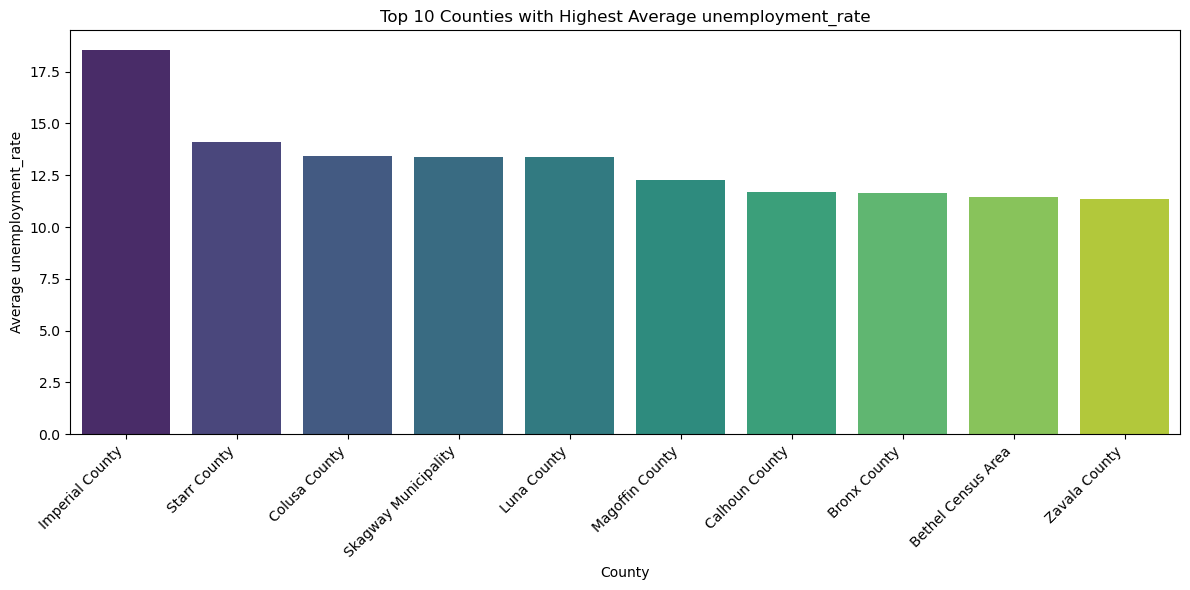

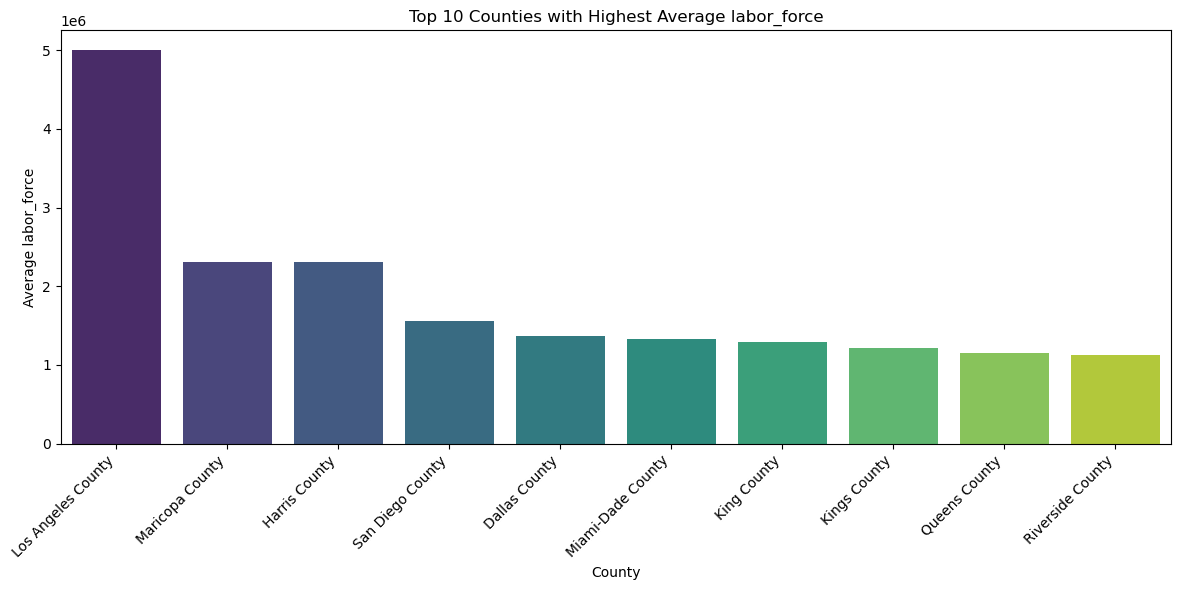

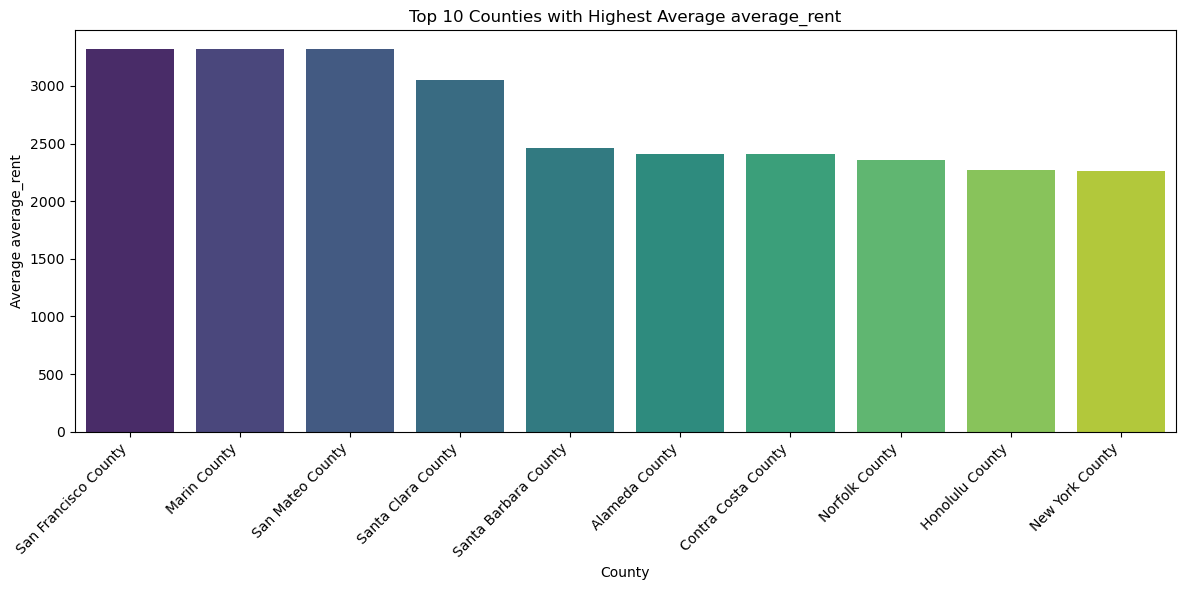

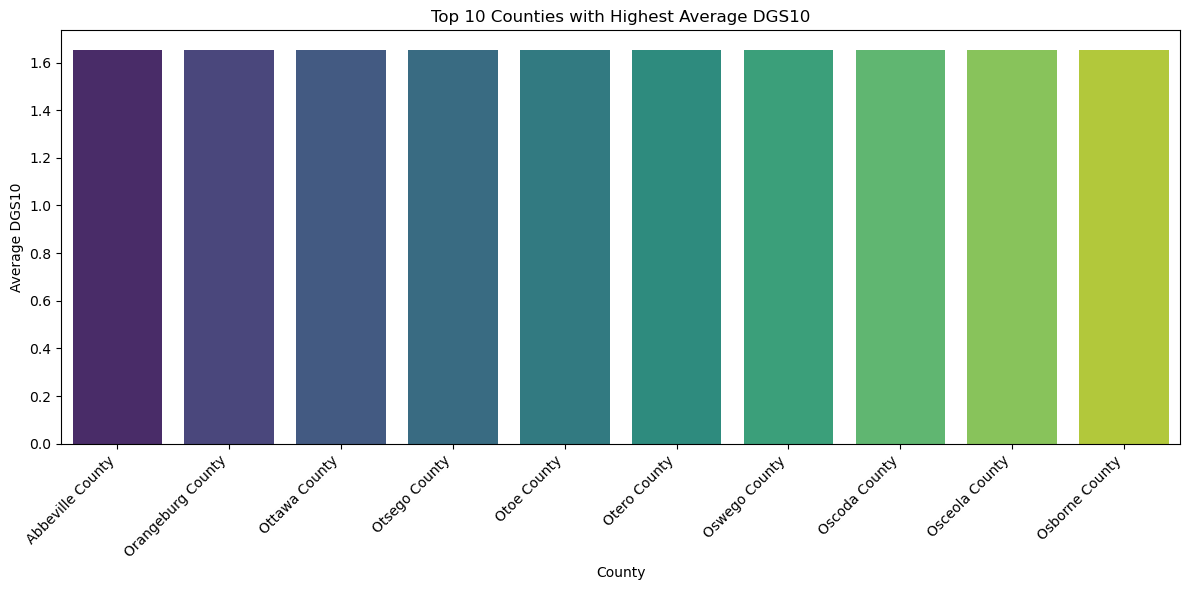

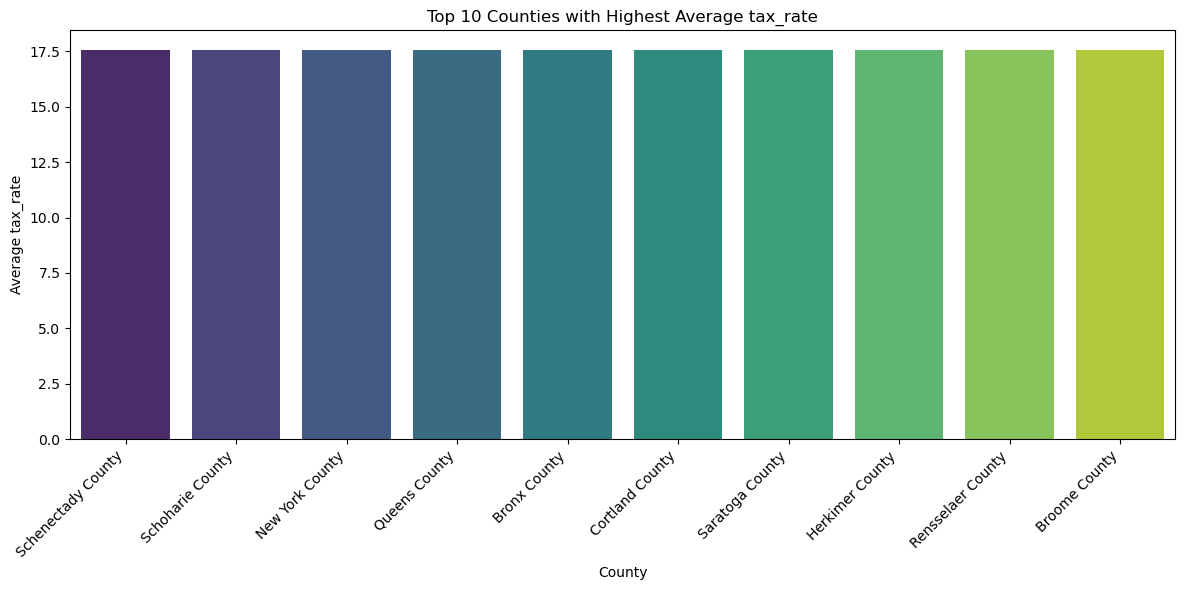

In [628]:
columns_to_plot = ['microbusiness_density','active','pop', 'pct_bb_last_year', 'pct_college_last_year',
                   'pct_foreign_born_last_year', 'pct_it_workers_last_year',
                   'median_hh_inc_last_year', 'used_population', 'retired_population',
                   'unemployment_rate', 'labor_force', 'average_rent',
                   'DGS10', 'tax_rate']

for column in columns_to_plot:
    average_per_county = data.groupby('county')[column].mean().reset_index()
    top_counties = average_per_county.sort_values(by=column, ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    sb.barplot(x='county', y=column, data=top_counties, palette='viridis')
    plt.title(f'Top 10 Counties with Highest Average {column}')
    plt.xlabel('County')
    plt.ylabel(f'Average {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [629]:
data

cfips           county    state first_day_of_month  \
0        1001   Autauga County  Alabama         2019-01-08   
1        1001   Autauga County  Alabama         2019-01-09   
2        1001   Autauga County  Alabama         2019-01-10   
3        1001   Autauga County  Alabama         2019-01-11   
4        1001   Autauga County  Alabama         2019-01-12   
...       ...              ...      ...                ...   
128489  56041     Uinta County  Wyoming         2022-01-12   
128490  56043  Washakie County  Wyoming         2022-01-11   
128491  56043  Washakie County  Wyoming         2022-01-12   
128492  56045    Weston County  Wyoming         2022-01-11   
128493  56045    Weston County  Wyoming         2022-01-12   

        microbusiness_density  active  istest  month           pop  \
0                    3.007682    1249       0      8  41526.999299   
1                    2.884870    1198       0      9  41526.999777   
2                    3.055843    1269       0     10  41527.001174   
3                    2.993233    1243       0     11  41527.001638   
4                    2.993233    1243       0     12  41527.001638   
...                       ...     ...     ...    ...           ...   
128489               4.050703     588       1     12  14516.000261   
128490               3.143093     190       1     11   6045.000319   
128491               3.060380     185       1     12   6044.999960   
128492               1.785395     100       1     11   5600.999891   
128493               1.803249     101       1     12   5600.999751   

        pct_bb_last_year  ...  labor_force  average_rent  is_coastal  DGS10  \
0                   78.9  ...      26696.0        838.75       False   2.73   
1                   78.9  ...      26696.0        838.75       False   2.74   
2                   78.9  ...      26696.0        838.75       False   2.74   
3                   78.9  ...      26696.0        838.75       False   2.71   
4                   78.9  ...      26696.0        838.75       False   2.71   
...                  ...  ...          ...           ...         ...    ...   
128489              90.6  ...       8863.0        749.00       False   1.74   
128490              85.4  ...       3858.0        771.75       False   1.75   
128491              85.4  ...       3858.0        771.75       False   1.74   
128492              81.3  ...       3792.0        934.00       False   1.75   
128493              81.3  ...       3792.0        934.00       False   1.74   

        year  tax_rate  tax_rate_diff  mbd_lag_1  diff_lag_1  rolling_window_2  
0       2019      6.03           0.89   3.007682   -0.122812          3.007682  
1       2019      6.03           0.89   3.007682   -0.122812          6.015364  
2       2019      6.03           0.89   2.884870    0.170973          5.892552  
3       2019      6.03           0.89   3.055843   -0.062610          5.940713  
4       2019      6.03           0.89   2.993233    0.000000          6.049076  
...      ...       ...            ...        ...         ...               ...  
128489  2022      0.00           0.00   4.016258    0.034445          8.025627  
128490  2022      0.00           0.00   3.126551    0.016542          6.335815  
128491  2022      0.00           0.00   3.143093   -0.082713          6.269644  
128492  2022      0.00           0.00   1.785395    0.000000          3.570791  
128493  2022      0.00           0.00   1.785395    0.017854          3.570791  

[128494 rows x 27 columns]

In [630]:
geo = pd.read_excel('D:\\Micro Business Density\\uscounties.xlsx')
geo.rename(columns={"county_fips":"cfips"},inplace=True)
merged_df = pd.merge(data, geo[['cfips','lat','lng','state_id']], on='cfips', how='inner')

In [631]:
data

cfips           county    state first_day_of_month  \
0        1001   Autauga County  Alabama         2019-01-08   
1        1001   Autauga County  Alabama         2019-01-09   
2        1001   Autauga County  Alabama         2019-01-10   
3        1001   Autauga County  Alabama         2019-01-11   
4        1001   Autauga County  Alabama         2019-01-12   
...       ...              ...      ...                ...   
128489  56041     Uinta County  Wyoming         2022-01-12   
128490  56043  Washakie County  Wyoming         2022-01-11   
128491  56043  Washakie County  Wyoming         2022-01-12   
128492  56045    Weston County  Wyoming         2022-01-11   
128493  56045    Weston County  Wyoming         2022-01-12   

        microbusiness_density  active  istest  month           pop  \
0                    3.007682    1249       0      8  41526.999299   
1                    2.884870    1198       0      9  41526.999777   
2                    3.055843    1269       0     10  41527.001174   
3                    2.993233    1243       0     11  41527.001638   
4                    2.993233    1243       0     12  41527.001638   
...                       ...     ...     ...    ...           ...   
128489               4.050703     588       1     12  14516.000261   
128490               3.143093     190       1     11   6045.000319   
128491               3.060380     185       1     12   6044.999960   
128492               1.785395     100       1     11   5600.999891   
128493               1.803249     101       1     12   5600.999751   

        pct_bb_last_year  ...  labor_force  average_rent  is_coastal  DGS10  \
0                   78.9  ...      26696.0        838.75       False   2.73   
1                   78.9  ...      26696.0        838.75       False   2.74   
2                   78.9  ...      26696.0        838.75       False   2.74   
3                   78.9  ...      26696.0        838.75       False   2.71   
4                   78.9  ...      26696.0        838.75       False   2.71   
...                  ...  ...          ...           ...         ...    ...   
128489              90.6  ...       8863.0        749.00       False   1.74   
128490              85.4  ...       3858.0        771.75       False   1.75   
128491              85.4  ...       3858.0        771.75       False   1.74   
128492              81.3  ...       3792.0        934.00       False   1.75   
128493              81.3  ...       3792.0        934.00       False   1.74   

        year  tax_rate  tax_rate_diff  mbd_lag_1  diff_lag_1  rolling_window_2  
0       2019      6.03           0.89   3.007682   -0.122812          3.007682  
1       2019      6.03           0.89   3.007682   -0.122812          6.015364  
2       2019      6.03           0.89   2.884870    0.170973          5.892552  
3       2019      6.03           0.89   3.055843   -0.062610          5.940713  
4       2019      6.03           0.89   2.993233    0.000000          6.049076  
...      ...       ...            ...        ...         ...               ...  
128489  2022      0.00           0.00   4.016258    0.034445          8.025627  
128490  2022      0.00           0.00   3.126551    0.016542          6.335815  
128491  2022      0.00           0.00   3.143093   -0.082713          6.269644  
128492  2022      0.00           0.00   1.785395    0.000000          3.570791  
128493  2022      0.00           0.00   1.785395    0.017854          3.570791  

[128494 rows x 27 columns]

In [632]:
datax = data

In [633]:
import altair as alt
from vega_datasets import data
import numpy as np 

fips_codes = {
    'AL': '1', 'AK': '2', 'AZ': '4', 'AR': '5', 'CA': '6', 'CO': '8',
    'CT': '9', 'DE': '10', 'DC': '11', 'FL': '12', 'GA': '13', 'HI': '15',
    'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19', 'KS': '20', 'KY': '21',
    'LA': '22', 'ME': '23', 'MD': '24', 'MA': '25', 'MI': '26', 'MN': '27',
    'MS': '28', 'MO': '29', 'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33',
    'NJ': '34', 'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39',
    'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45', 'SD': '46',
    'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50', 'VA': '51', 'WA': '53',
    'WV': '54', 'WI': '55', 'WY': '56', 'PR': '72', 'VI': '78'
}

merged_df['state_id'] = merged_df['state_id'].astype(str)
merged_df['fips_code'] = merged_df['state_id'].map(fips_codes)
df_state_visualize = merged_df.groupby(['fips_code', 'state_id'])['active'].mean().reset_index()
df_state_visualize['active'] = np.log2(df_state_visualize['active'] + 1)

def state_choropleth_chart(df, color, title=None, state_code="fips_code", encoding_type=":Q", height=600, width=960):
    states = alt.topo_feature(data.us_10m.url, 'states')
    # Data source for state labels, assuming 'state_labels' is a DataFrame with 'id' and 'name'
    state_labels = alt.topo_feature(data.us_10m.url, 'states')

    base = alt.Chart(states).mark_geoshape(
        stroke="black",
        strokeWidth=0.25
    ).encode(
        color=color + encoding_type
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(df, key=state_code, fields=[color])
    ).project(
        type='albersUsa'
    ).properties(
        title=title,
        height=height,
        width=width
    )

    # Create a text layer to label the states
    text = alt.Chart(state_labels).mark_text(baseline='middle').encode(
        longitude='properties.longitude:Q',
        latitude='properties.latitude:Q',
        text='properties.name:N',
        size=alt.value(10),  # Adjust text size here
        opacity=alt.value(1)  # Adjust text opacity here
    )

    # Combine the base chart and the text layer
    chart = alt.layer(base, text)

    return chart

In [634]:
columns_to_plot = ['microbusiness_density', 'active', 'pop', 'pct_bb_last_year', 'pct_college_last_year',
                   'pct_foreign_born_last_year', 'pct_it_workers_last_year',
                   'median_hh_inc_last_year', 'used_population', 'retired_population',
                   'unemployment_rate', 'labor_force', 'average_rent',
                   'DGS10', 'tax_rate']

df_state_visualize = merged_df.groupby(['fips_code', 'state_id'])[columns_to_plot].mean().reset_index()
df_state_visualize[columns_to_plot] = np.log2(df_state_visualize[columns_to_plot] + 1)

for column in columns_to_plot:
    title = f"{column} per State (Averaged over all years)"
    chart = state_choropleth_chart(df_state_visualize, color=column, title=title)
    chart.display()

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

DIVING DEEPER INTO 5 OF THE COUNTIES WITH HIGHEST MICROBUSINESS DENSITIES<br>
-> Now it can seen why the shape for Nevada State had a plateau in between. It is due to similar shape for Carson City in the same period of time.

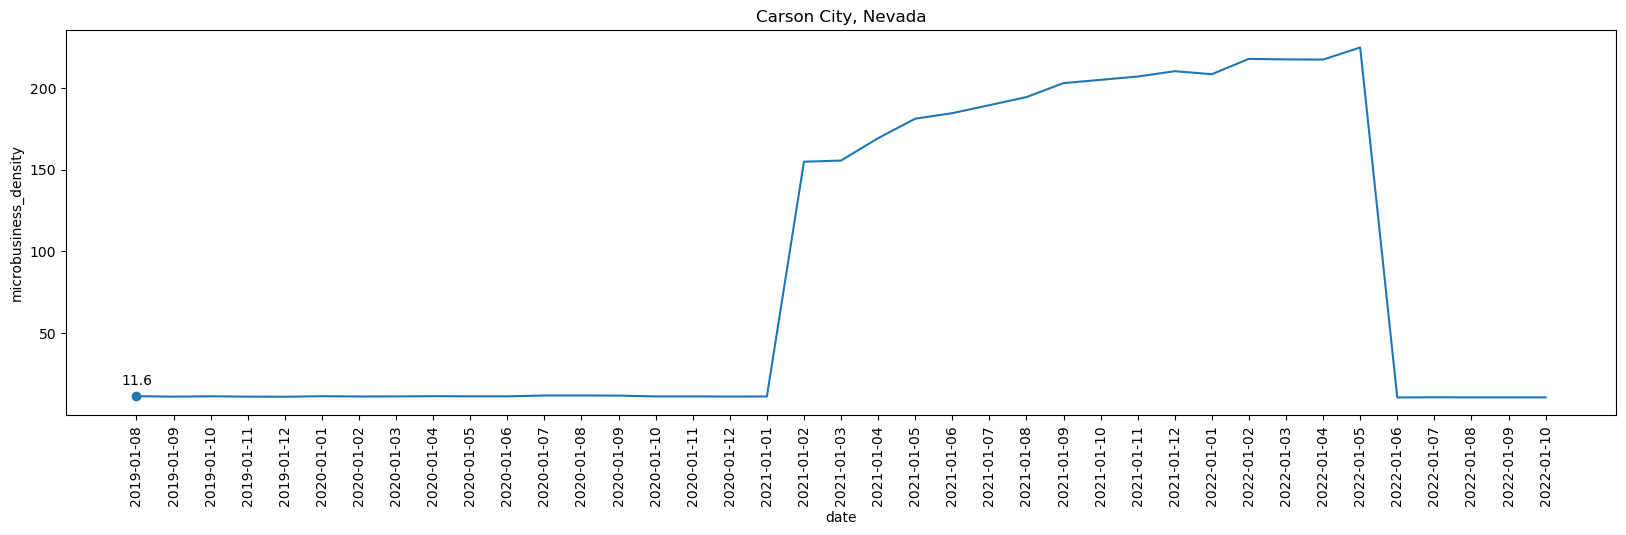

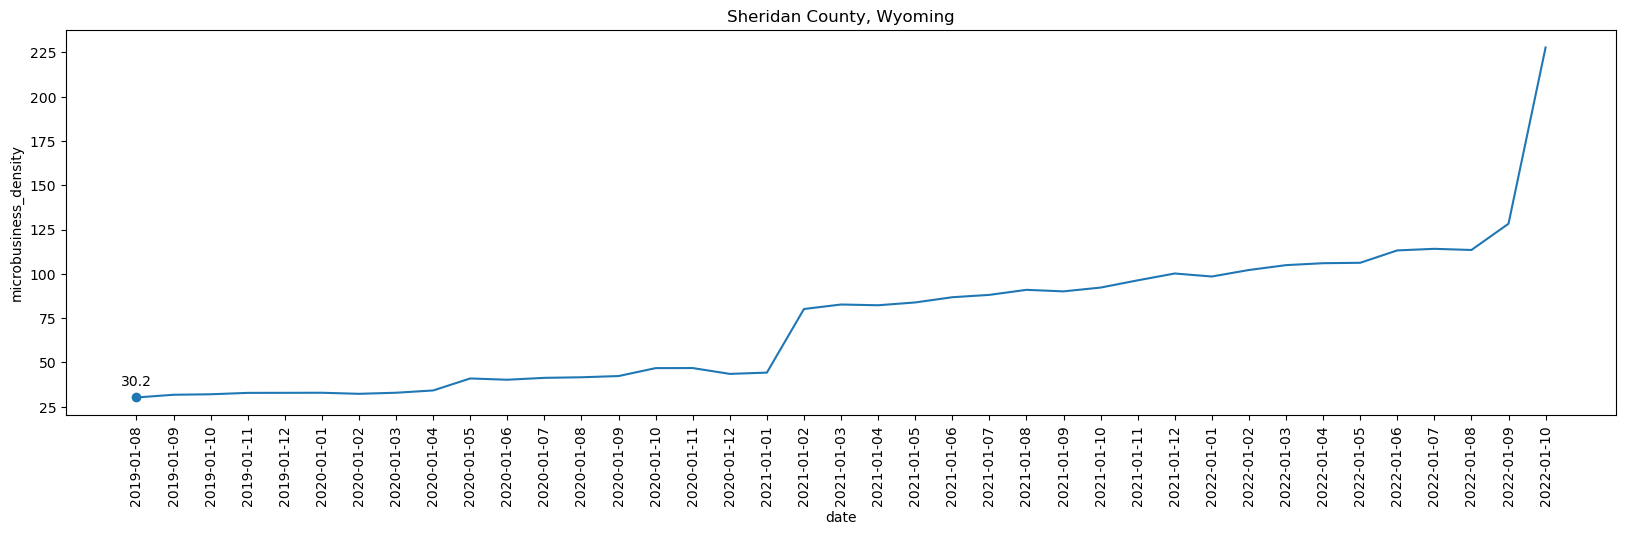

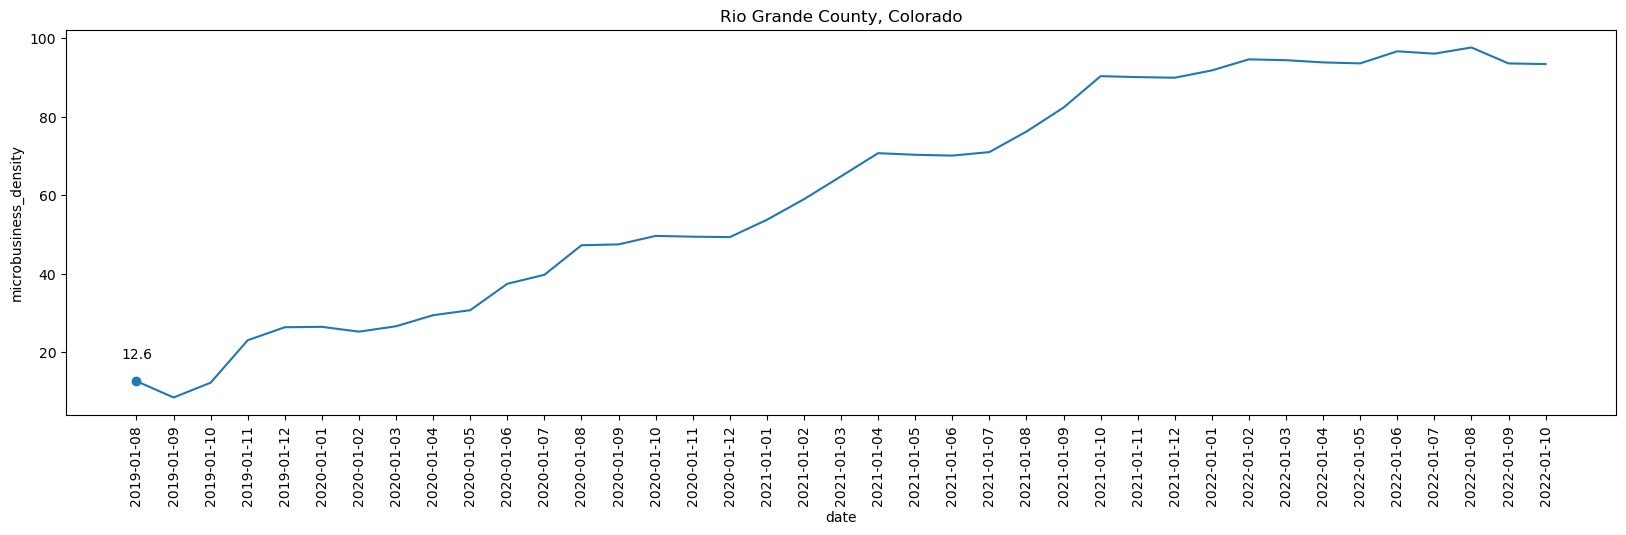

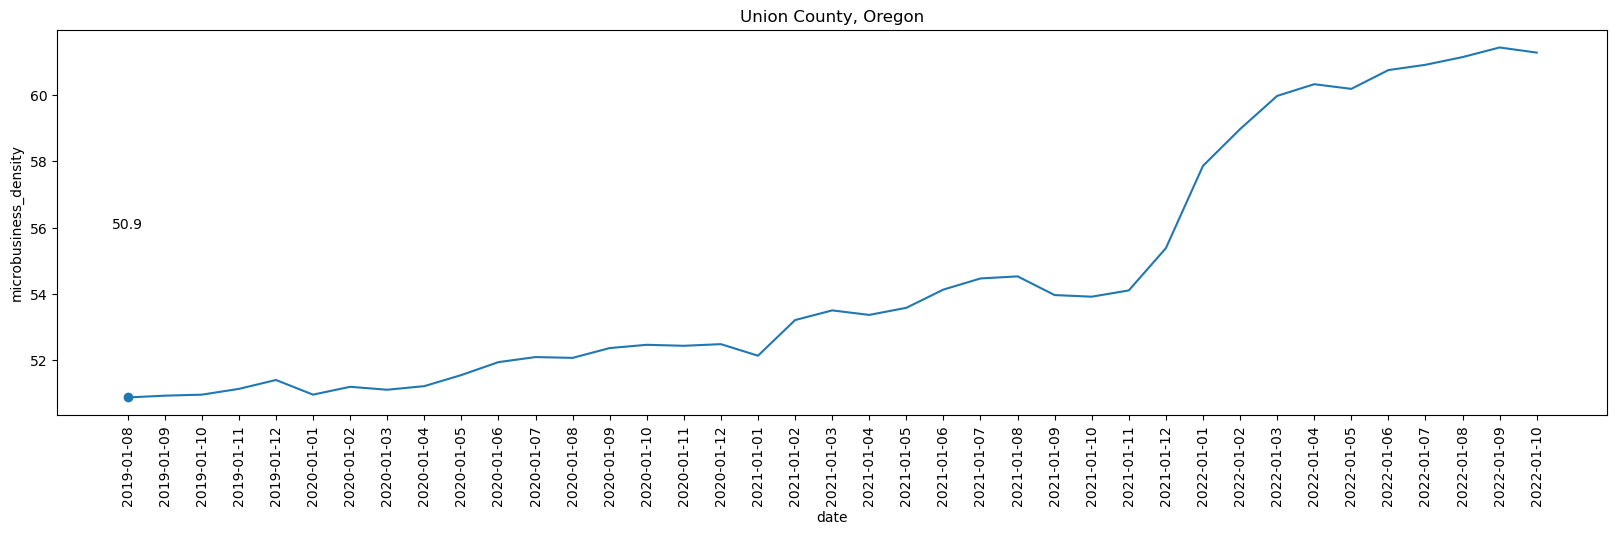

In [641]:
txt_off = 5
df = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\train.csv')
for cfip in [32510,56033,8105,41061]:    
    county_data = df[df['cfips']==cfip]
    county_data['date'] = pd.to_datetime(county_data['first_day_of_month']).dt.to_period('D')
    county_data['date'] = county_data['date'].astype(str)
    
    fig, ax = plt.subplots(figsize=(20,5))
    sb.lineplot(data=county_data, x='date', y='microbusiness_density')
    first_pt = (county_data['date'].iloc[0], county_data['microbusiness_density'].iloc[0])
    
    plt.scatter(first_pt[0], first_pt[1])
    plt.text(first_pt[0], first_pt[1] + txt_off, round(first_pt[1],1), ha='center', va='bottom')
    plt.title(f"{county_data['county'].iloc[0]}, {county_data['state'].iloc[0]}")
    plt.xticks(rotation=90, ha='center')

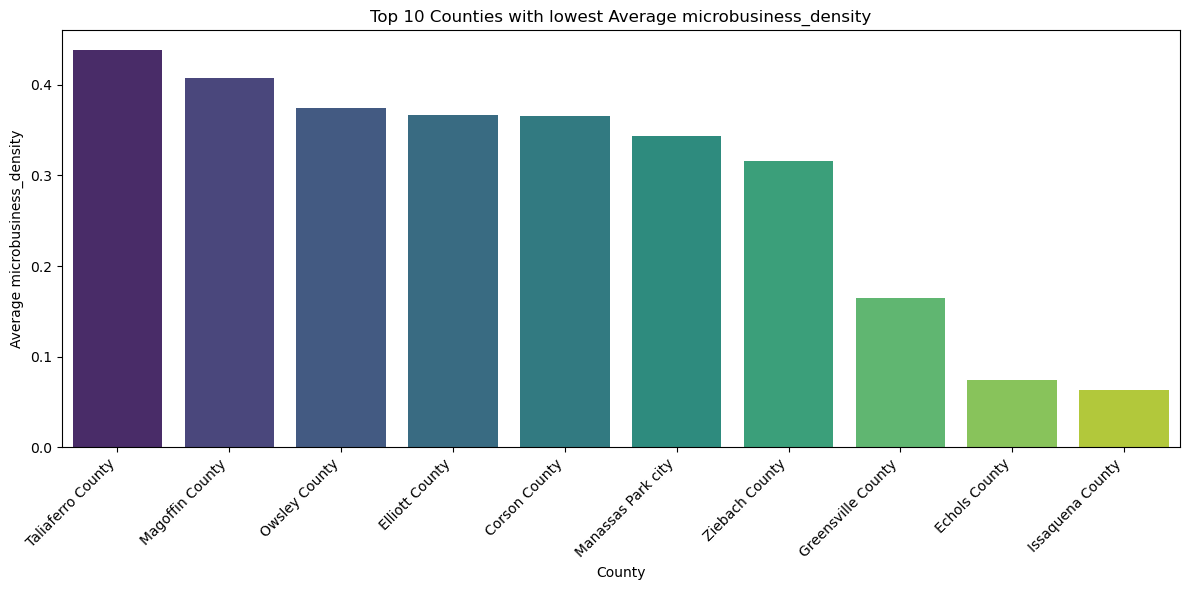

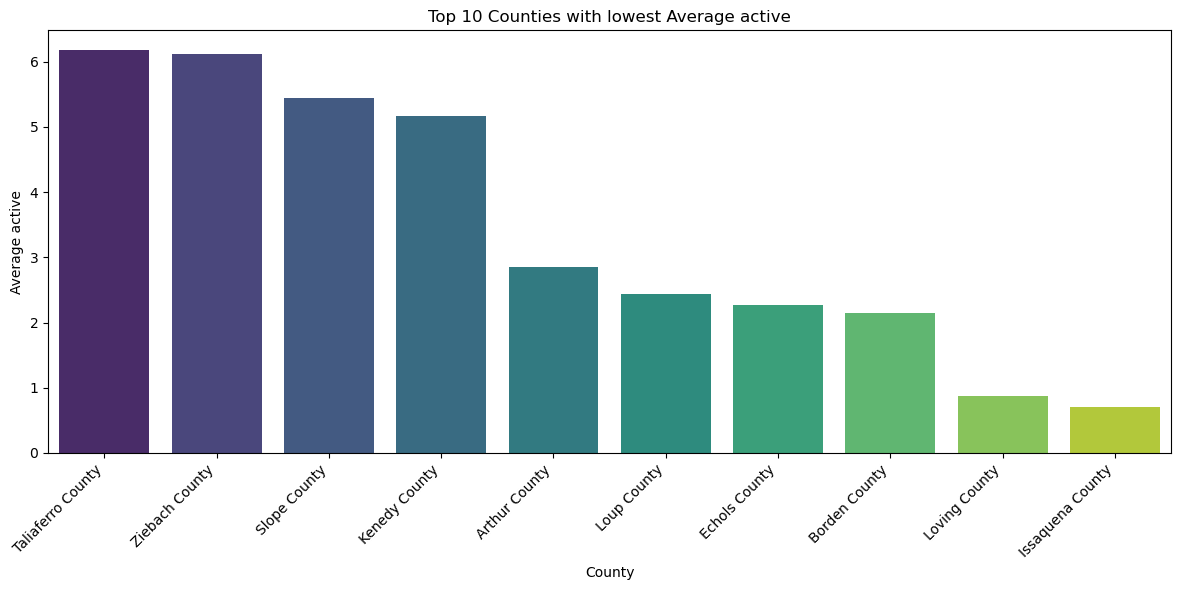

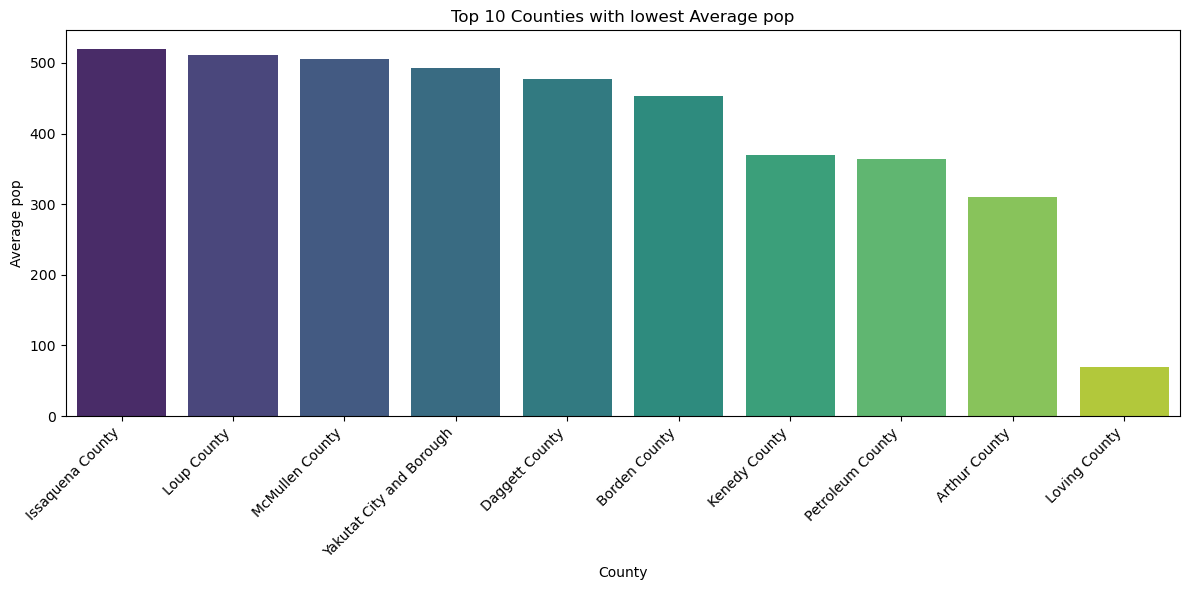

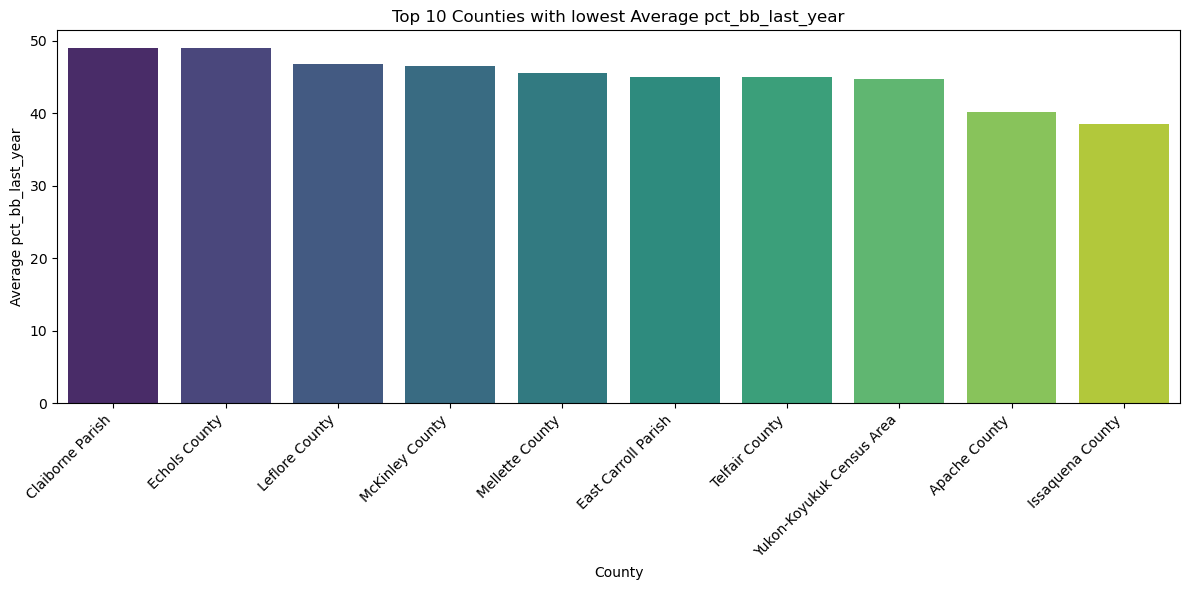

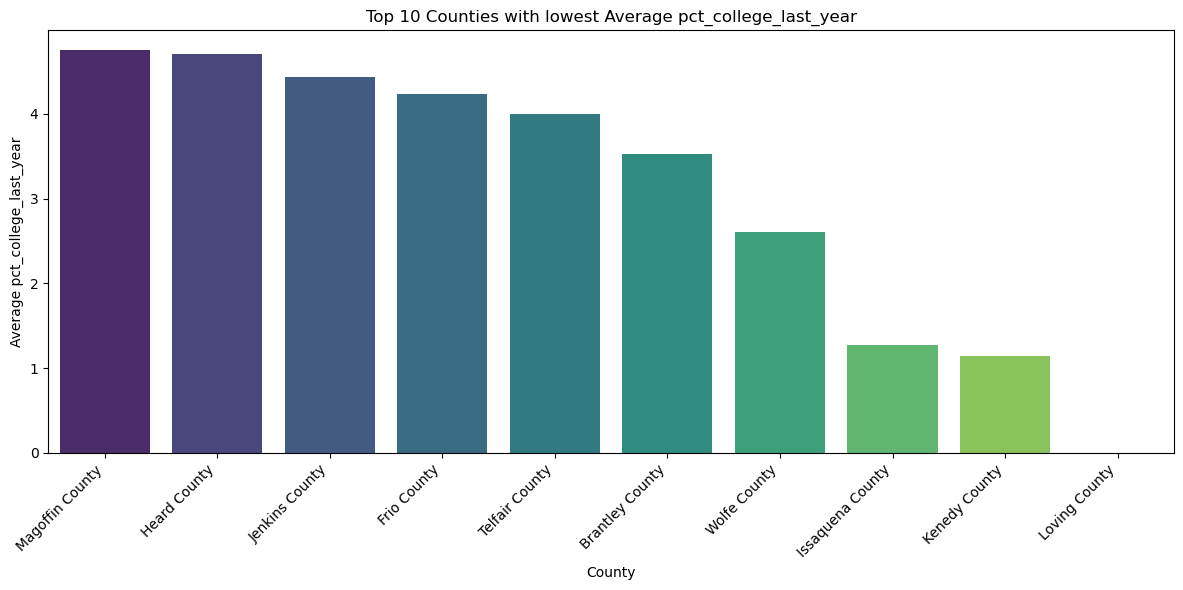

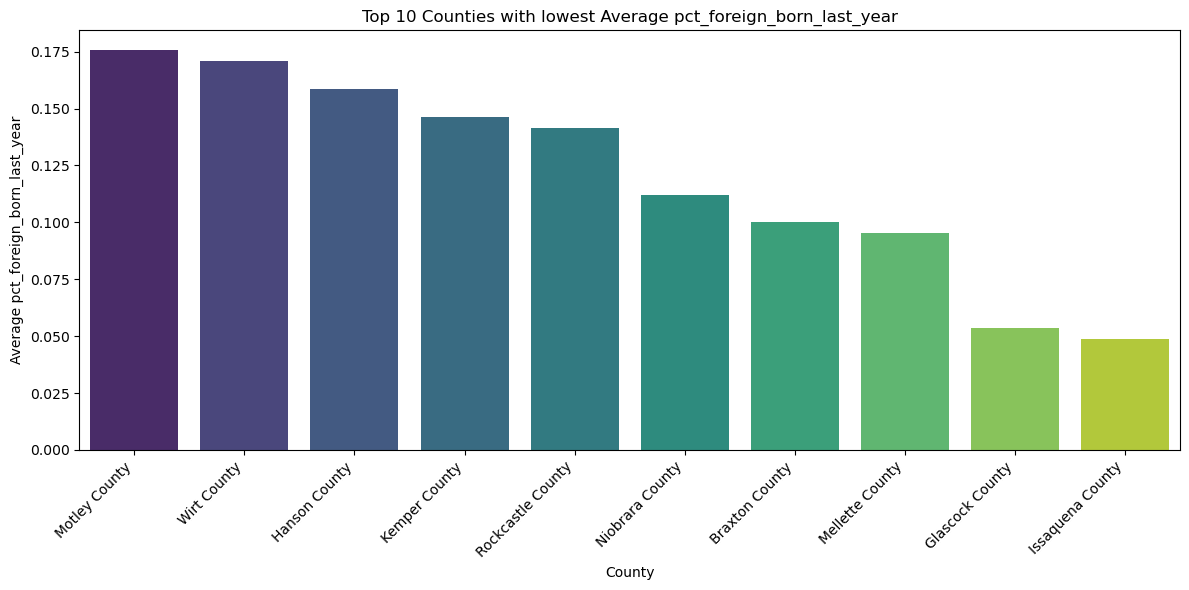

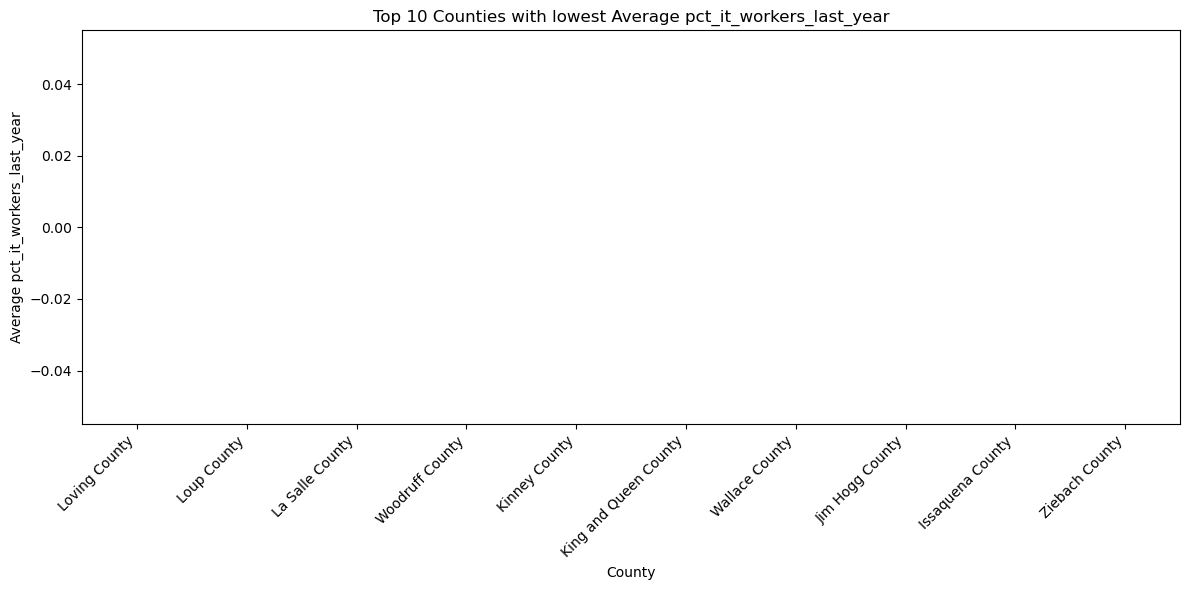

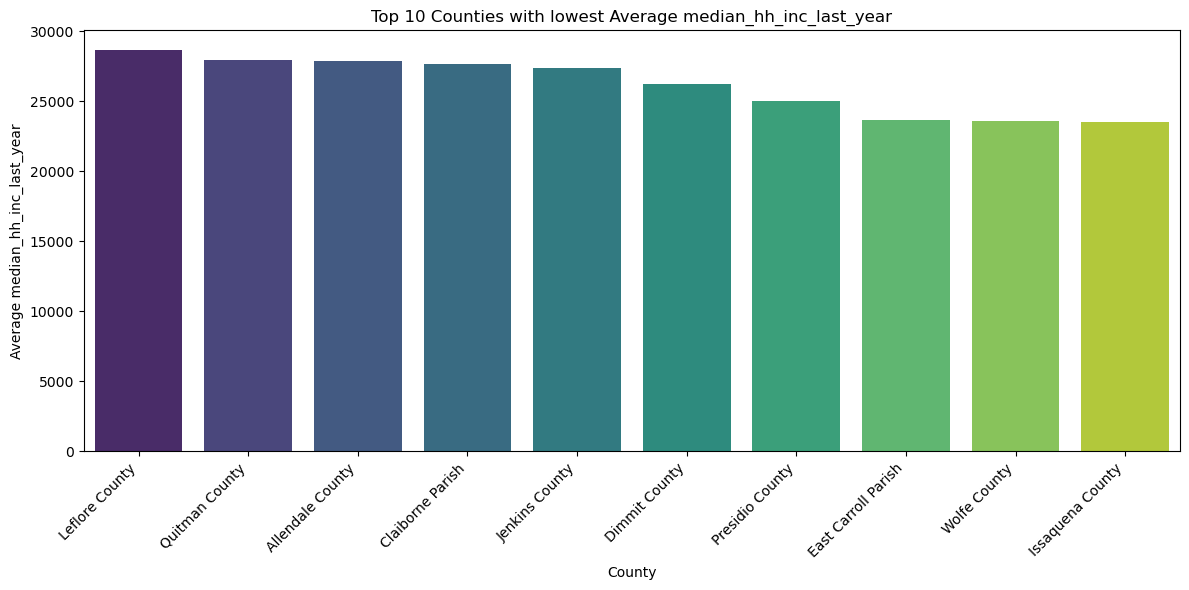

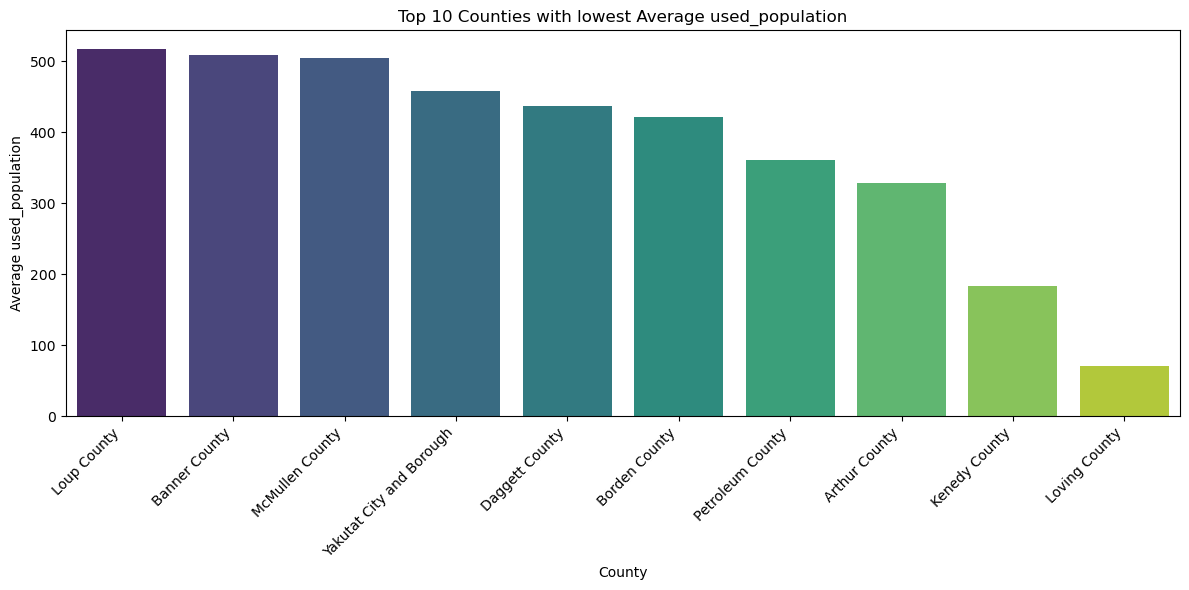

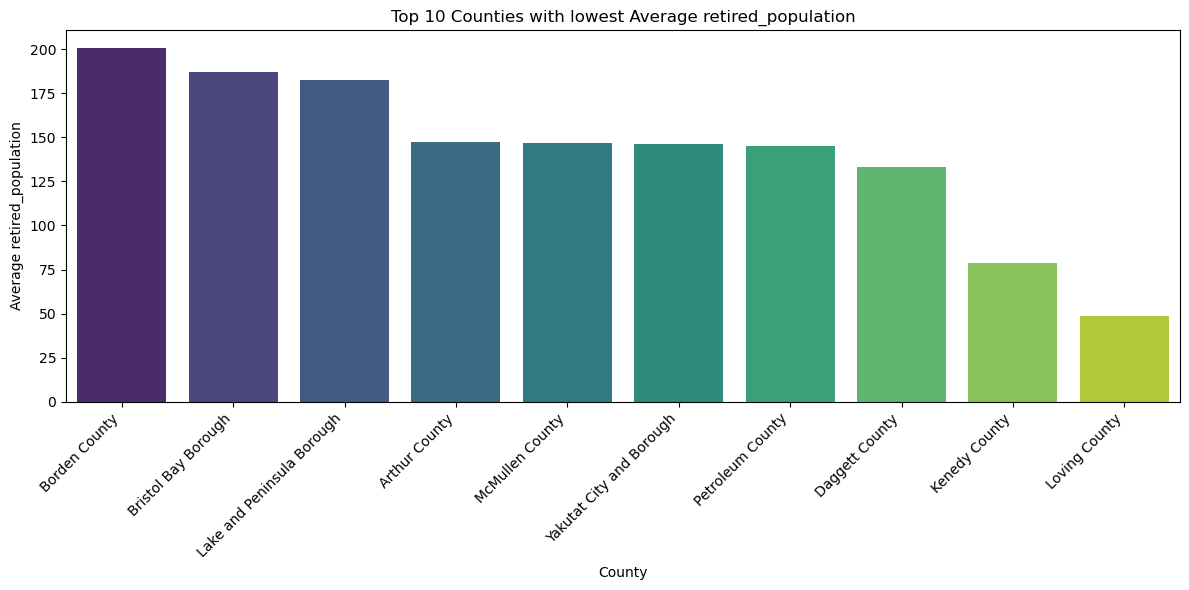

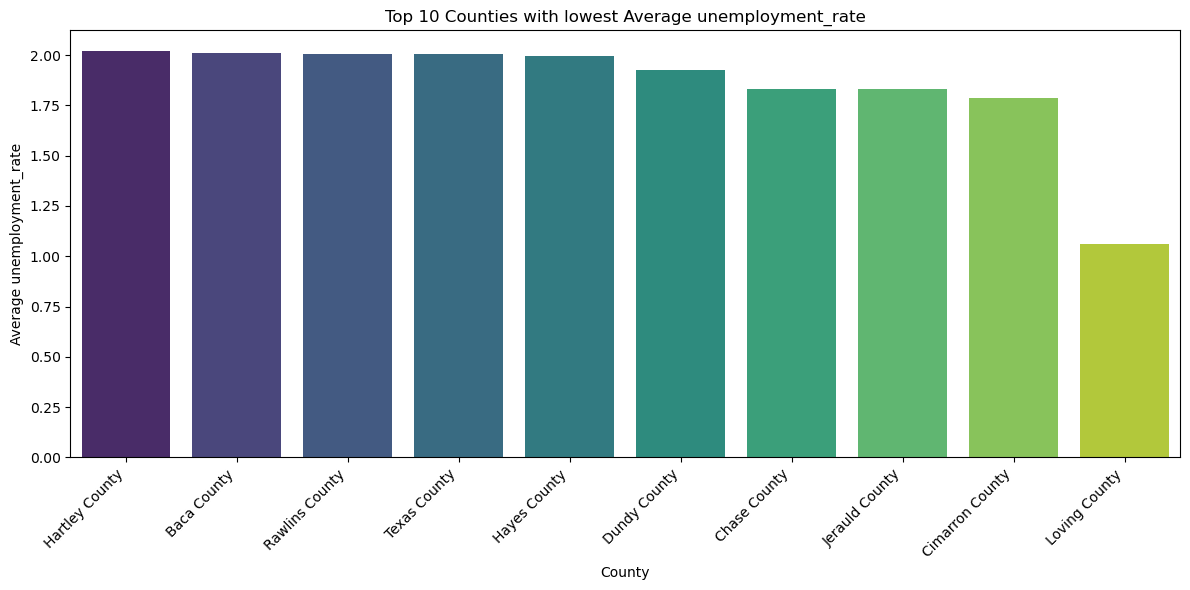

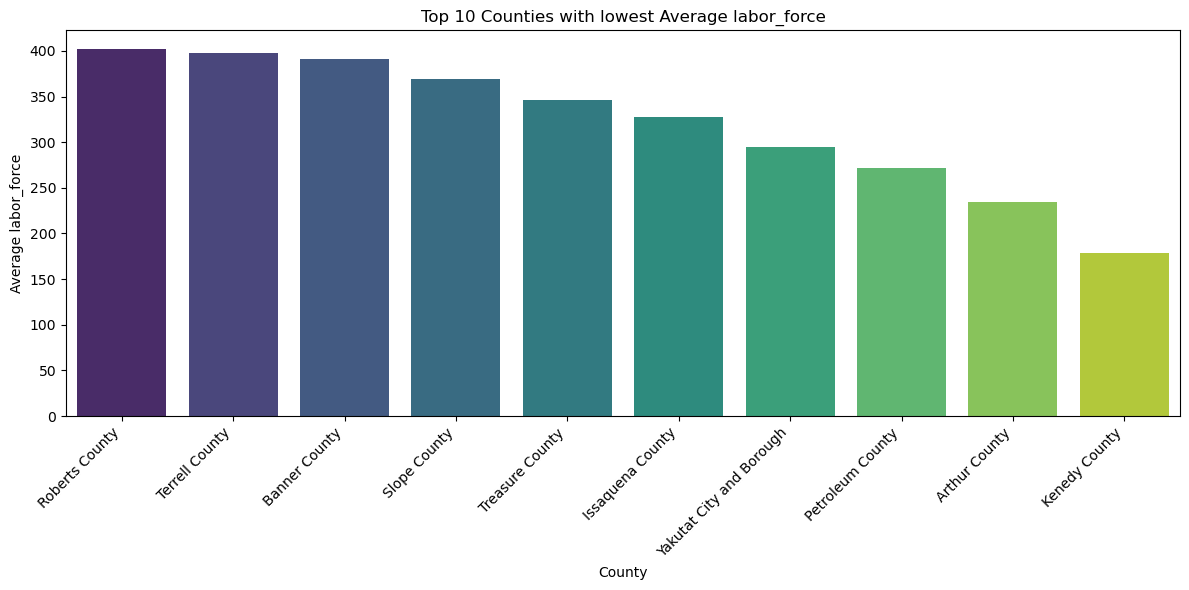

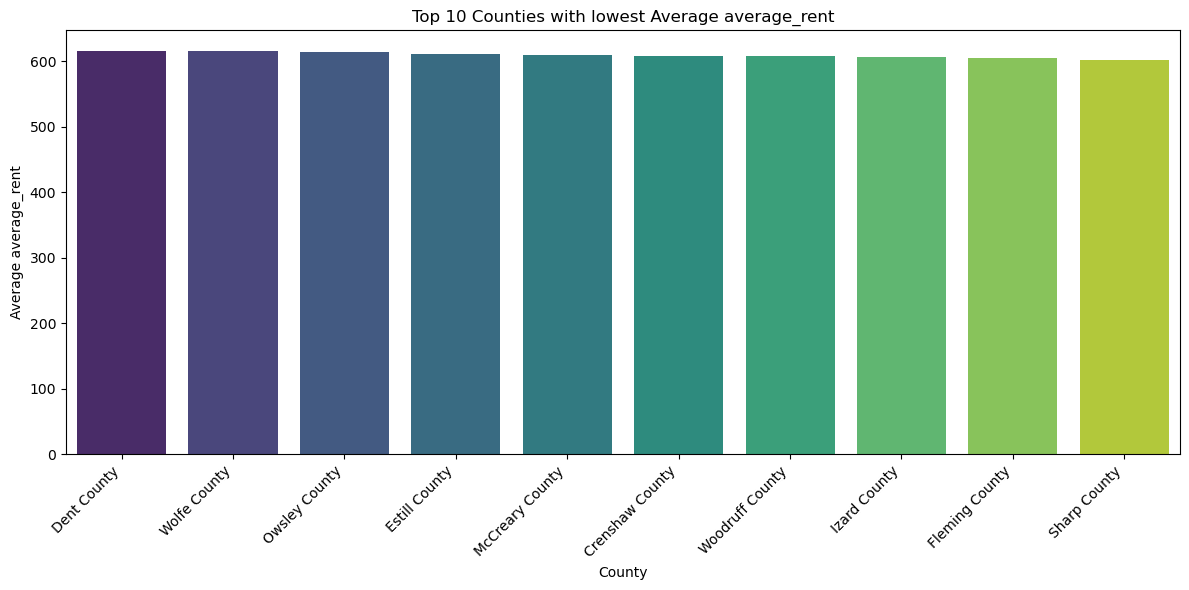

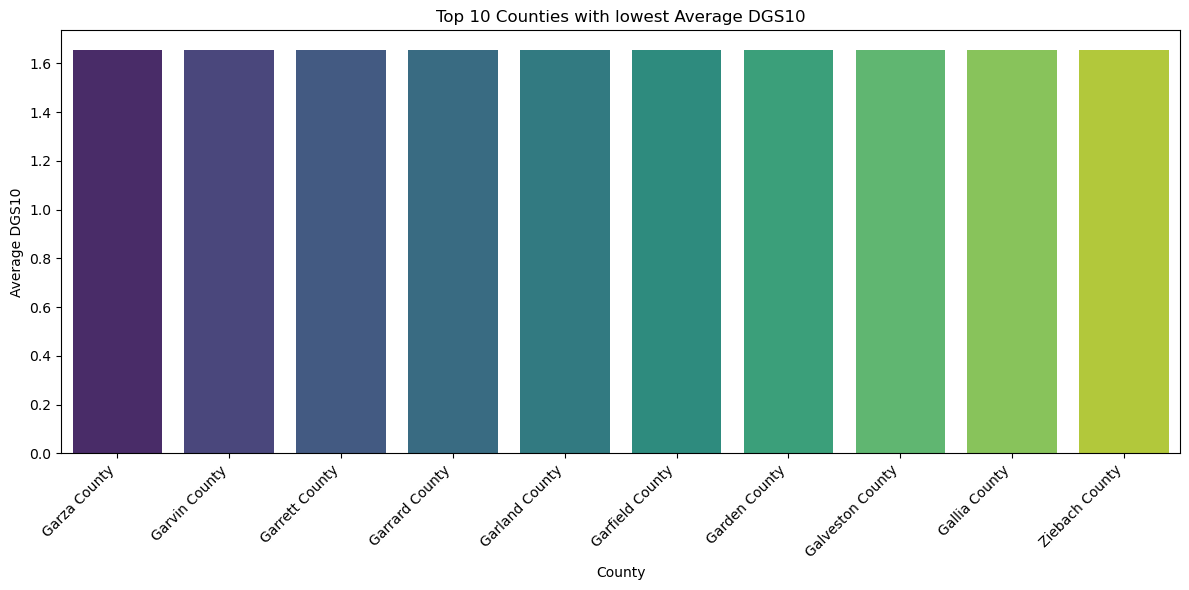

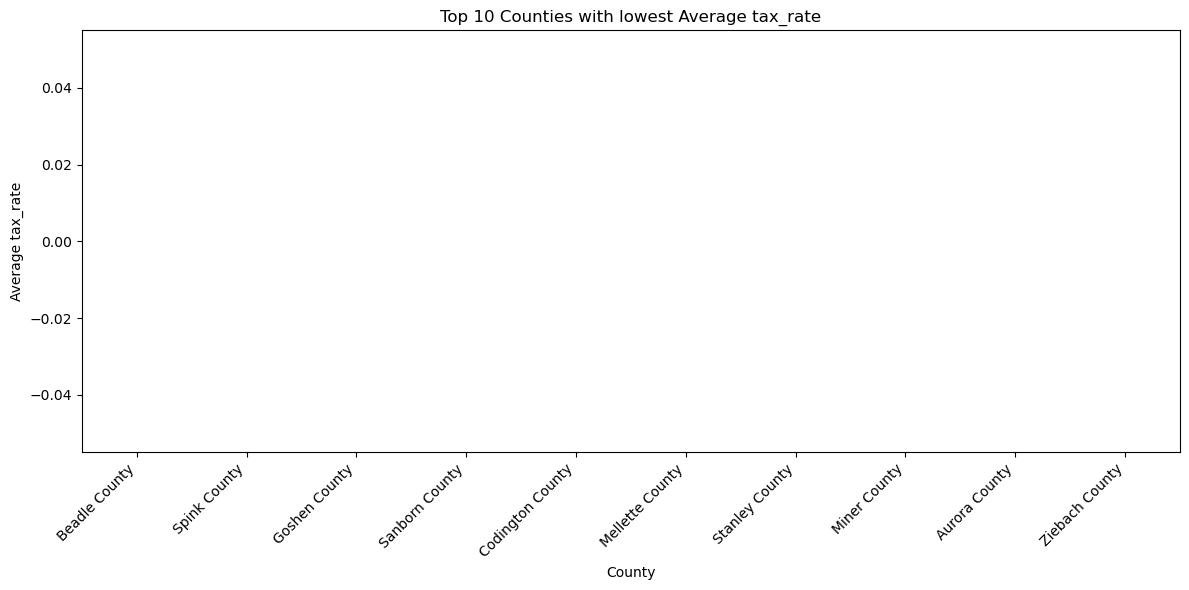

In [650]:
columns_to_plot = ['microbusiness_density','active','pop', 'pct_bb_last_year', 'pct_college_last_year',
                   'pct_foreign_born_last_year', 'pct_it_workers_last_year',
                   'median_hh_inc_last_year', 'used_population', 'retired_population',
                   'unemployment_rate', 'labor_force', 'average_rent',
                   'DGS10', 'tax_rate']

for column in columns_to_plot:
    average_per_county = datax.groupby('county')[column].mean().reset_index()
    top_counties = average_per_county.sort_values(by=column, ascending=False).tail(10)

    plt.figure(figsize=(12, 6))
    sb.barplot(x='county', y=column, data=top_counties, palette='viridis')
    plt.title(f'Top 10 Counties with lowest Average {column}')
    plt.xlabel('County')
    plt.ylabel(f'Average {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

DIVING INTO SOME COUNTIES WITH LOWEST MICROBUSINESS DENSITIES<BR>
-> Issaquena County, Mississippi: The lowest business density is in the Issaquena County in Mississippi with the population of about 1500 which means it is an extremely small county. It's economy is based on the agriculture and hunting.<br>
-> Echols County, Georgia: chols County in Georgia is a county with about 3700 population. It is also one of the poorest counties where above 30% of population lives below the poverty line.<br>
-> Greensville County, Virginia: This city has population of about 11000.

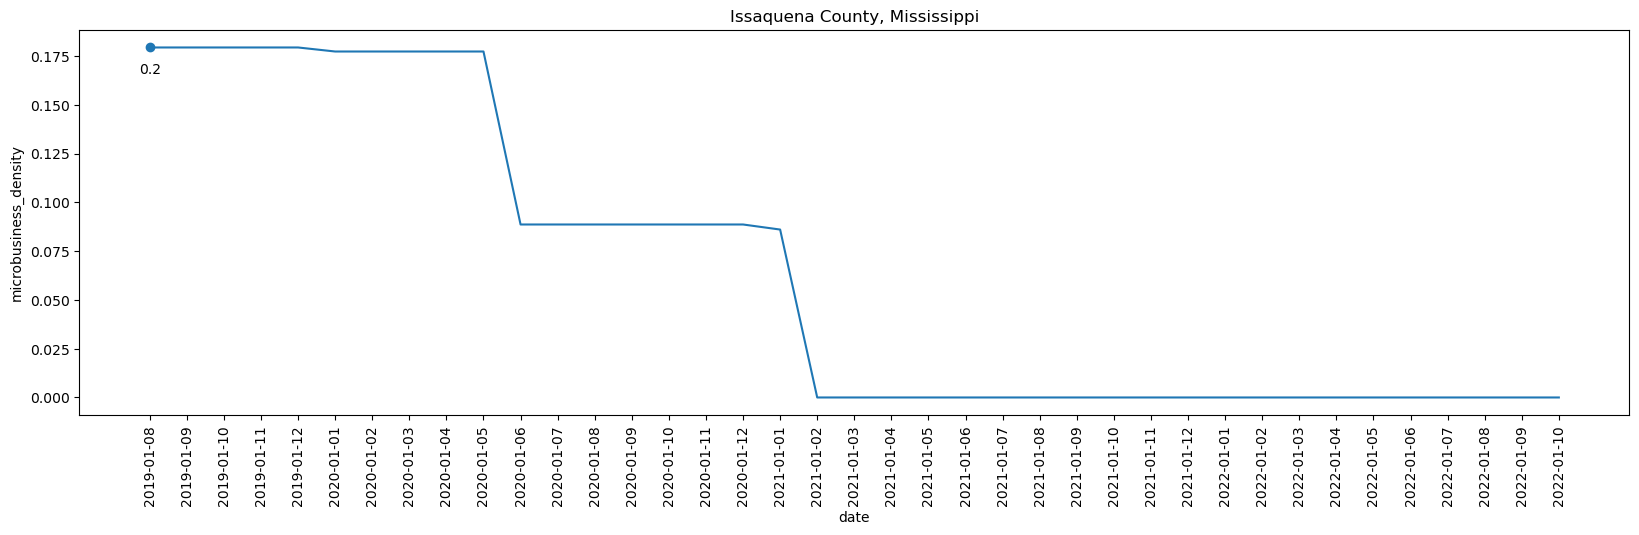

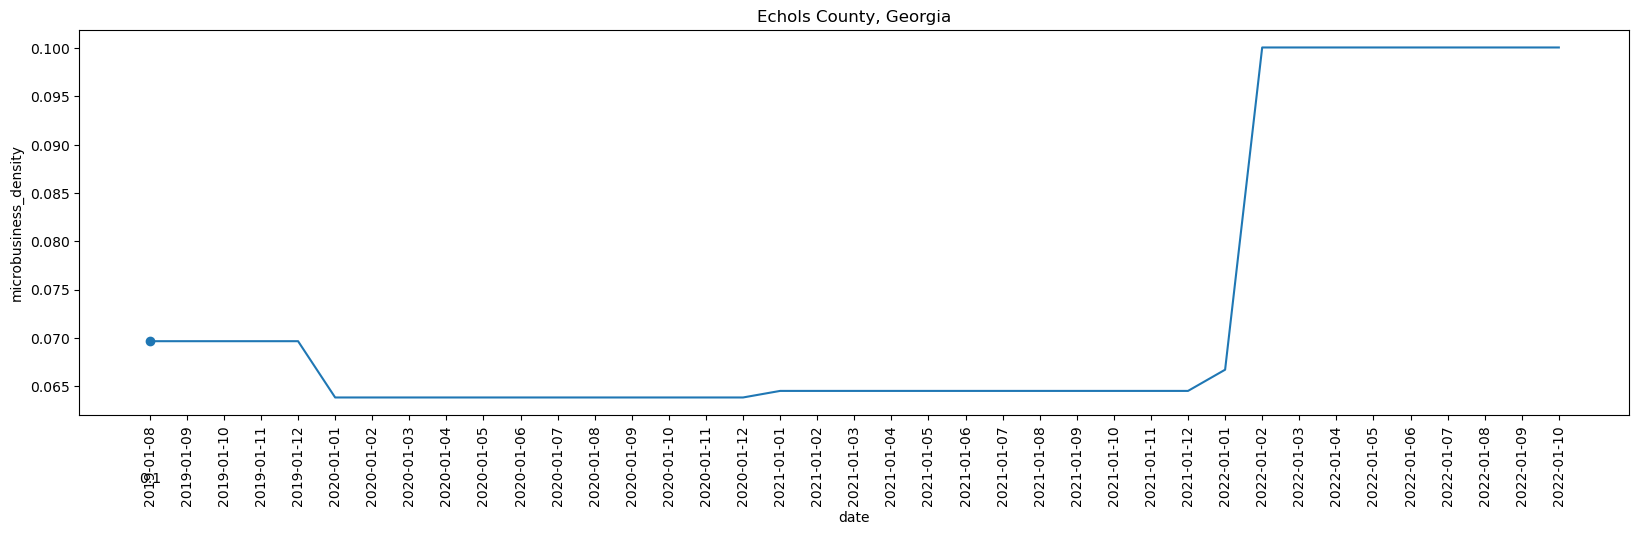

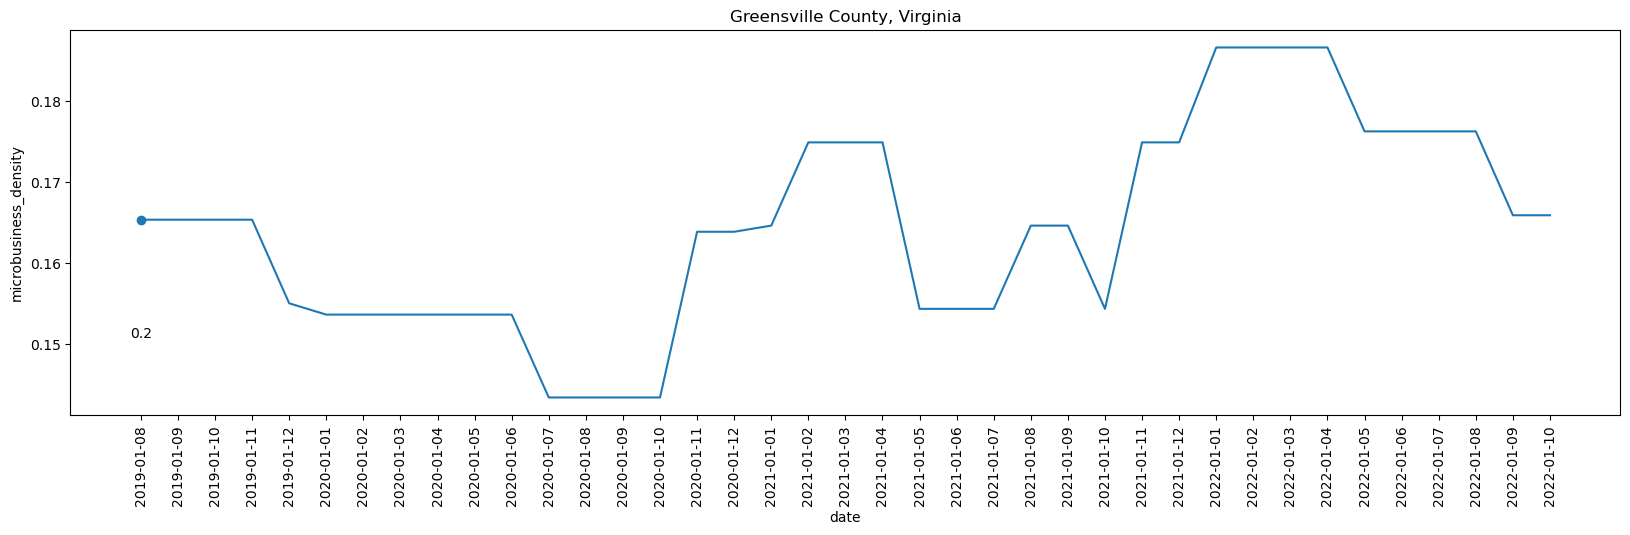

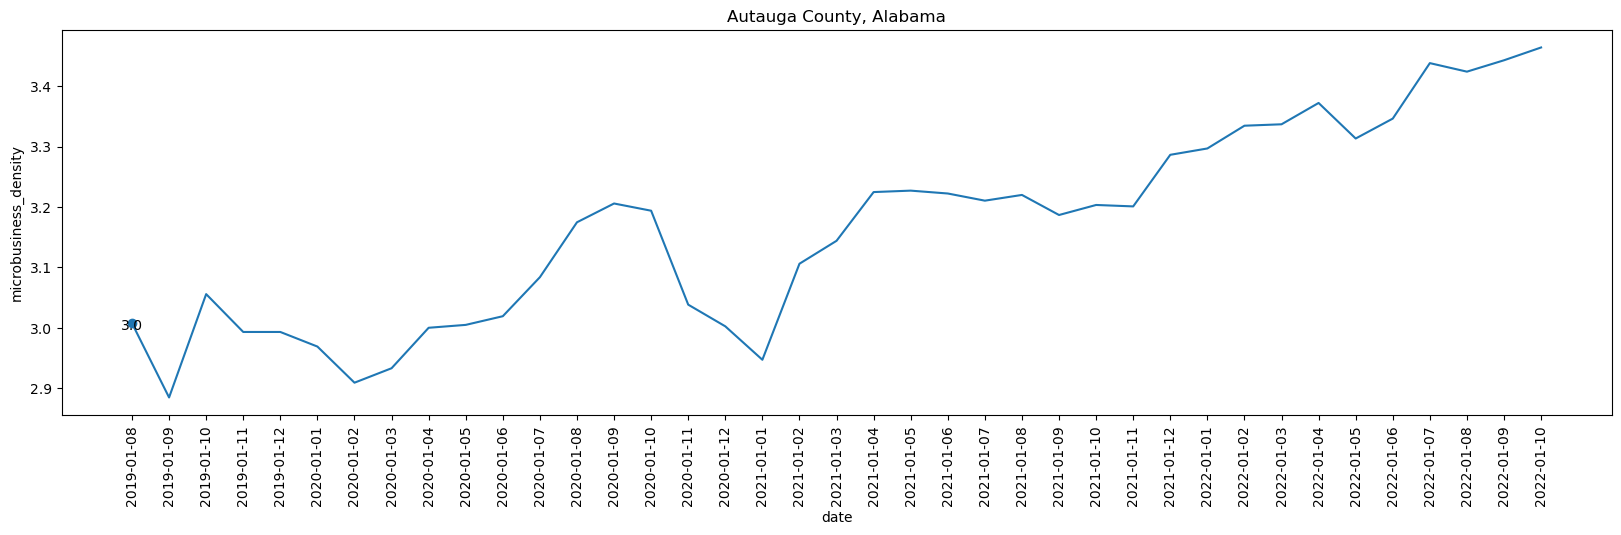

In [648]:
txt_off = -0.015
df = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\train.csv')
for cfip in [28055,13101,51081,1001]:    
    county_data = df[df['cfips']==cfip]
    county_data['date'] = pd.to_datetime(county_data['first_day_of_month']).dt.to_period('D')
    county_data['date'] = county_data['date'].astype(str)
    
    fig, ax = plt.subplots(figsize=(20,5))
    sb.lineplot(data=county_data, x='date', y='microbusiness_density')
    first_pt = (county_data['date'].iloc[0], county_data['microbusiness_density'].iloc[0])
    
    plt.scatter(first_pt[0], first_pt[1])
    plt.text(first_pt[0], first_pt[1] + txt_off, round(first_pt[1],1), ha='center', va='bottom')
    plt.title(f"{county_data['county'].iloc[0]}, {county_data['state'].iloc[0]}")
    plt.xticks(rotation=90, ha='center')

COUNTIES WITH BIGGEST RISE<br>
-> Except Rio Grande County, all c=other counties had no significant rise during pandemic time.<br>
-> The rise in some of these counties was so significant that it thus became the region for highest microbusiness density over the period of time.

In [651]:
first = df.groupby('cfips')['microbusiness_density'].first().rename('first')
last = df.groupby('cfips')['microbusiness_density'].last().rename('last')
delta = pd.concat([first, last], axis=1)
delta['change'] = delta['last']-delta['first']
delta['change_pct'] = (delta['last']-delta['first'])/delta['first']*100
delta = pd.concat([delta, cfips_county_state.set_index('cfips')],axis=1)
delta.sort_values('change', ascending=False)[:5]

first        last      change   change_pct             county  \
cfips                                                                      
56033  30.183279  227.756650  197.573371   654.578885    Sheridan County   
16021  10.976455   96.812622   85.836167   782.002632    Boundary County   
8105   12.616126   93.466301   80.850175   640.847872  Rio Grande County   
32017   4.026528   65.903671   61.877143  1536.736976     Lincoln County   
10005  13.561328   59.590317   46.028989   339.413581      Sussex County   

          state  
cfips            
56033   Wyoming  
16021     Idaho  
8105   Colorado  
32017    Nevada  
10005  Delaware

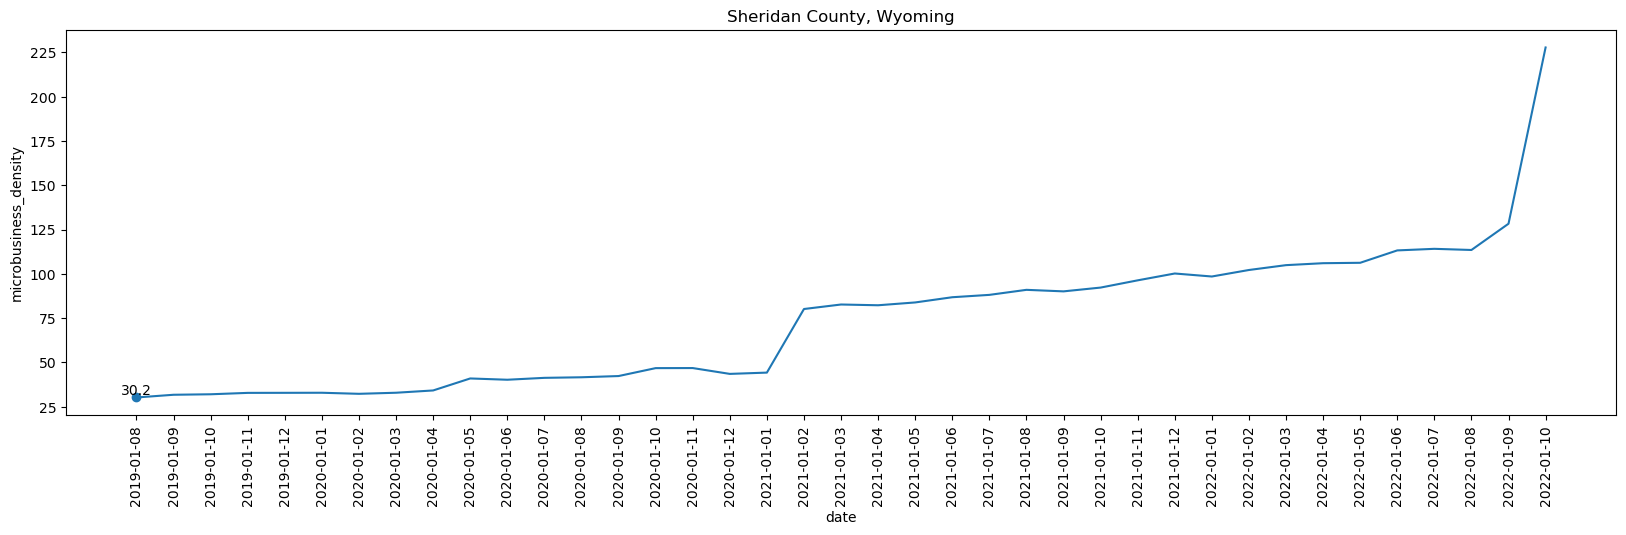

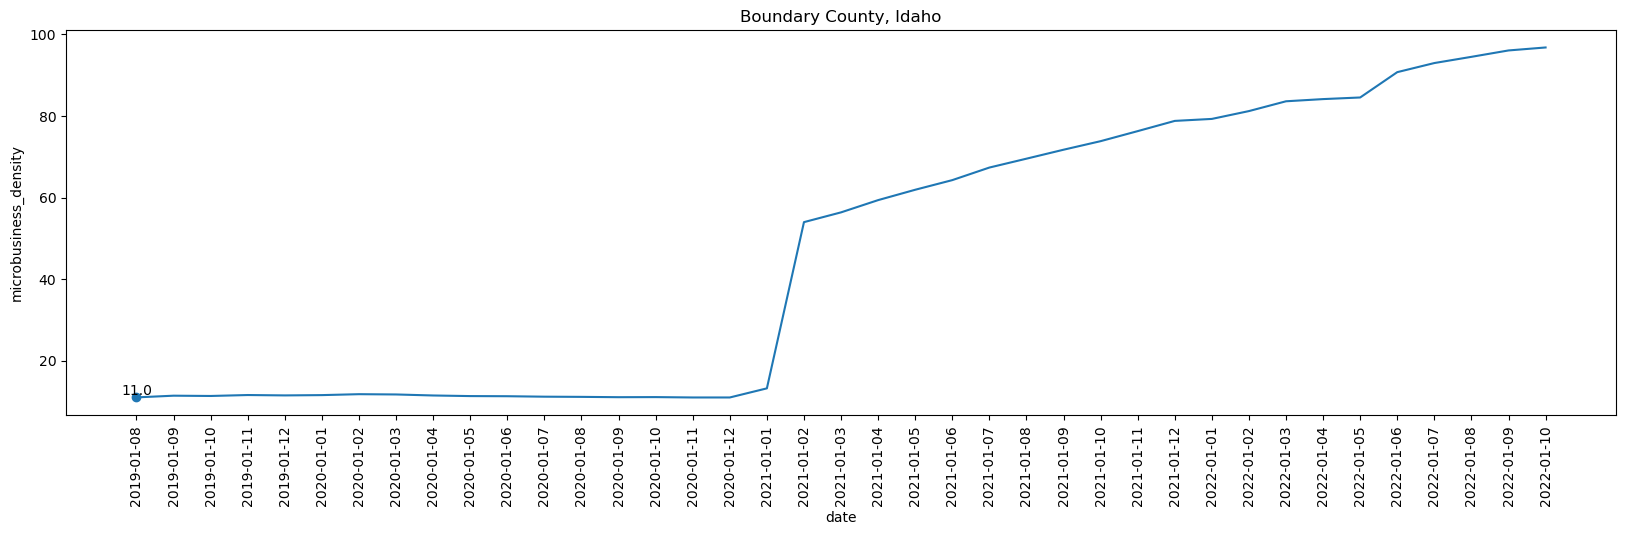

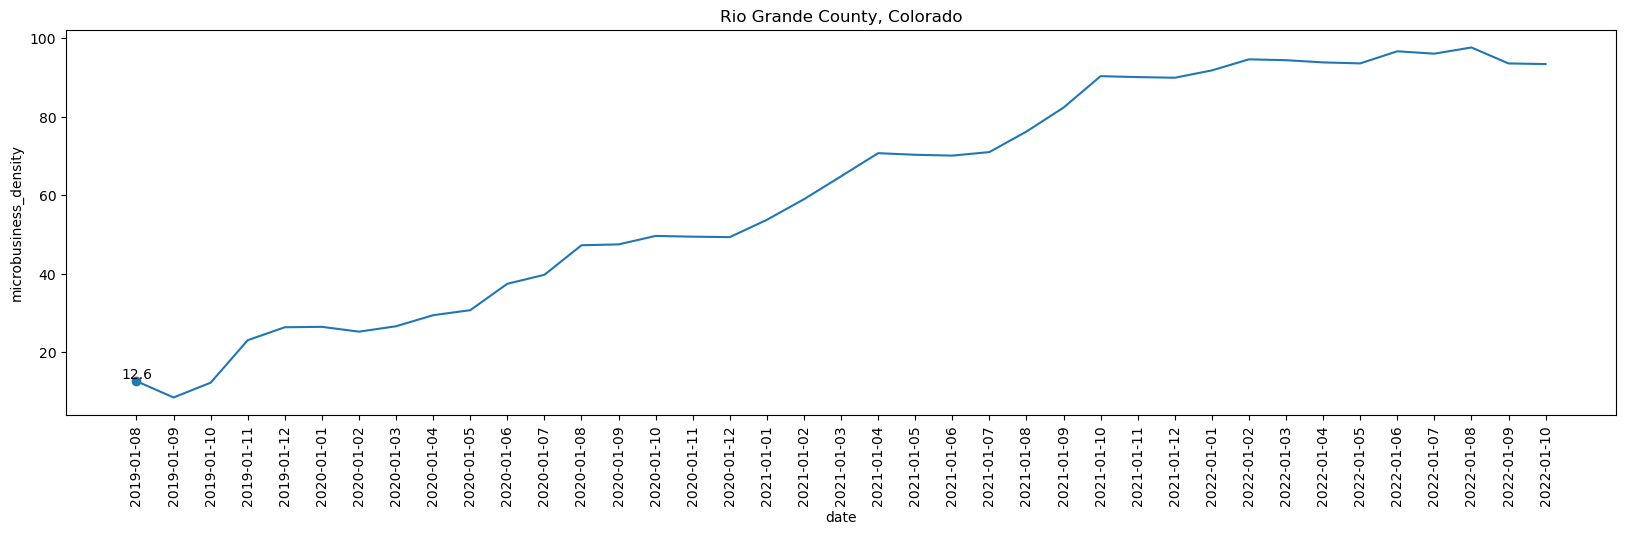

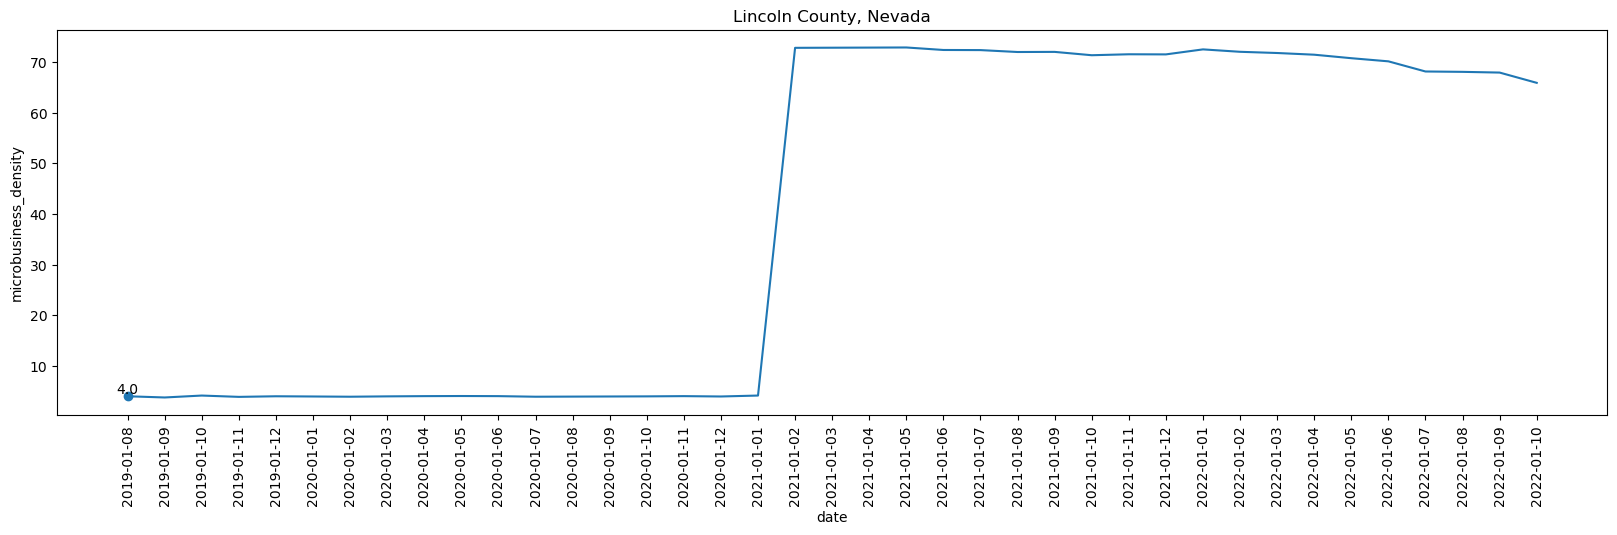

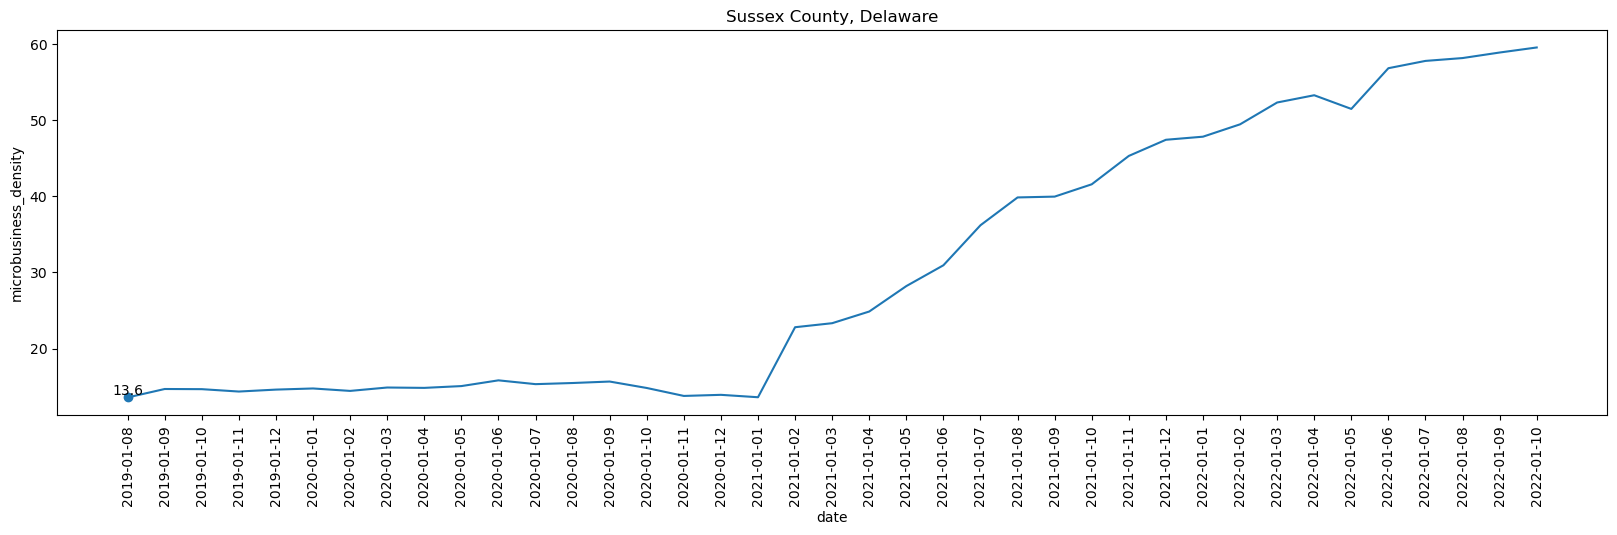

In [654]:
txt_off = -0.015
df = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\train.csv')
for cfip in [56033,16021,8105,32017,10005]:    
    county_data = df[df['cfips']==cfip]
    county_data['date'] = pd.to_datetime(county_data['first_day_of_month']).dt.to_period('D')
    county_data['date'] = county_data['date'].astype(str)
    
    fig, ax = plt.subplots(figsize=(20,5))
    sb.lineplot(data=county_data, x='date', y='microbusiness_density')
    first_pt = (county_data['date'].iloc[0], county_data['microbusiness_density'].iloc[0])
    
    plt.scatter(first_pt[0], first_pt[1])
    plt.text(first_pt[0], first_pt[1] + txt_off, round(first_pt[1],1), ha='center', va='bottom')
    plt.title(f"{county_data['county'].iloc[0]}, {county_data['state'].iloc[0]}")
    plt.xticks(rotation=90, ha='center')

COUNTIES WITH BIGGEST DROP

In [655]:
delta.sort_values('change', ascending=True)[:5]

first       last      change  change_pct                county  \
cfips                                                                        
46127  277.535980   5.595409 -271.940571  -97.983898          Union County   
5055    16.291933   2.332728  -13.959205  -85.681697         Greene County   
51830   13.033913   1.338518  -11.695395  -89.730498     Williamsburg city   
2060    23.022598  12.080537  -10.942061  -47.527481   Bristol Bay Borough   
38033   11.370056   2.231520   -9.138536  -80.373710  Golden Valley County   

              state  
cfips                
46127  South Dakota  
5055       Arkansas  
51830      Virginia  
2060         Alaska  
38033  North Dakota

-> The shape of Union City is responsible for the zig-zag shape of South Dakota state in late 2018(the drop was around 97%)<br>
-> Greene County, Golden Valley, Bristol Bay Borough had significant drop during late 2019, i.e using COVID-19 time.<br>

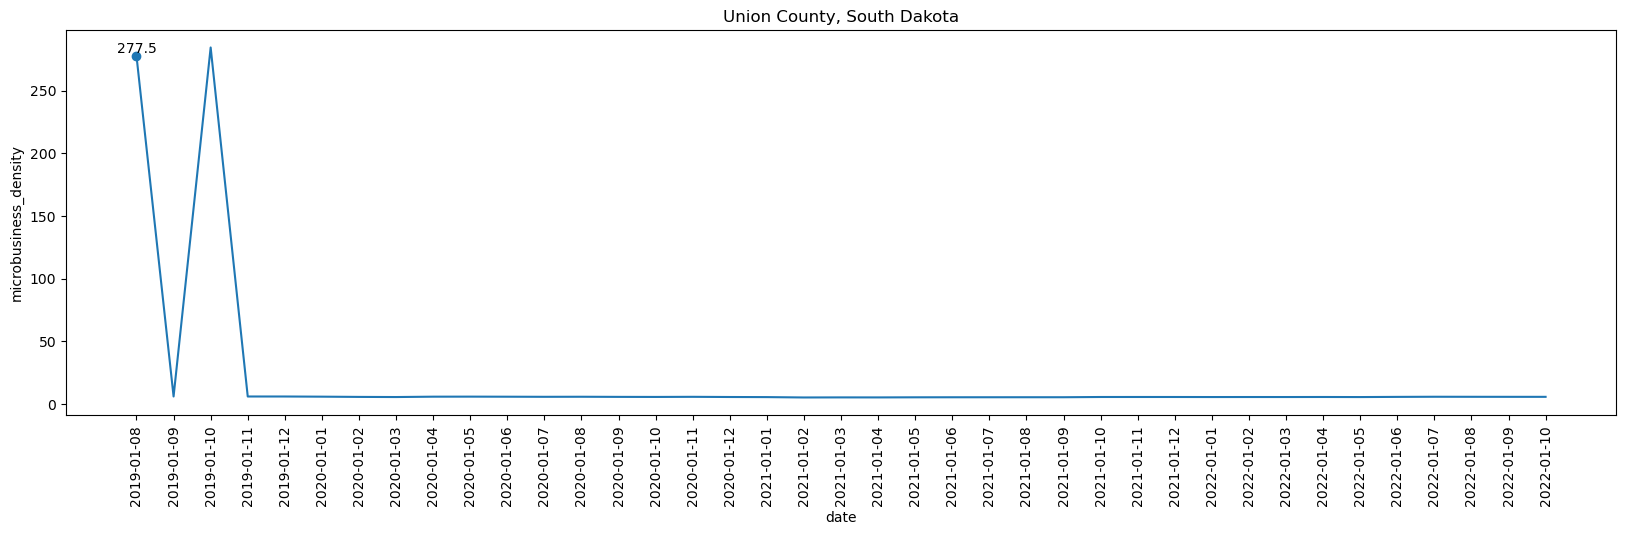

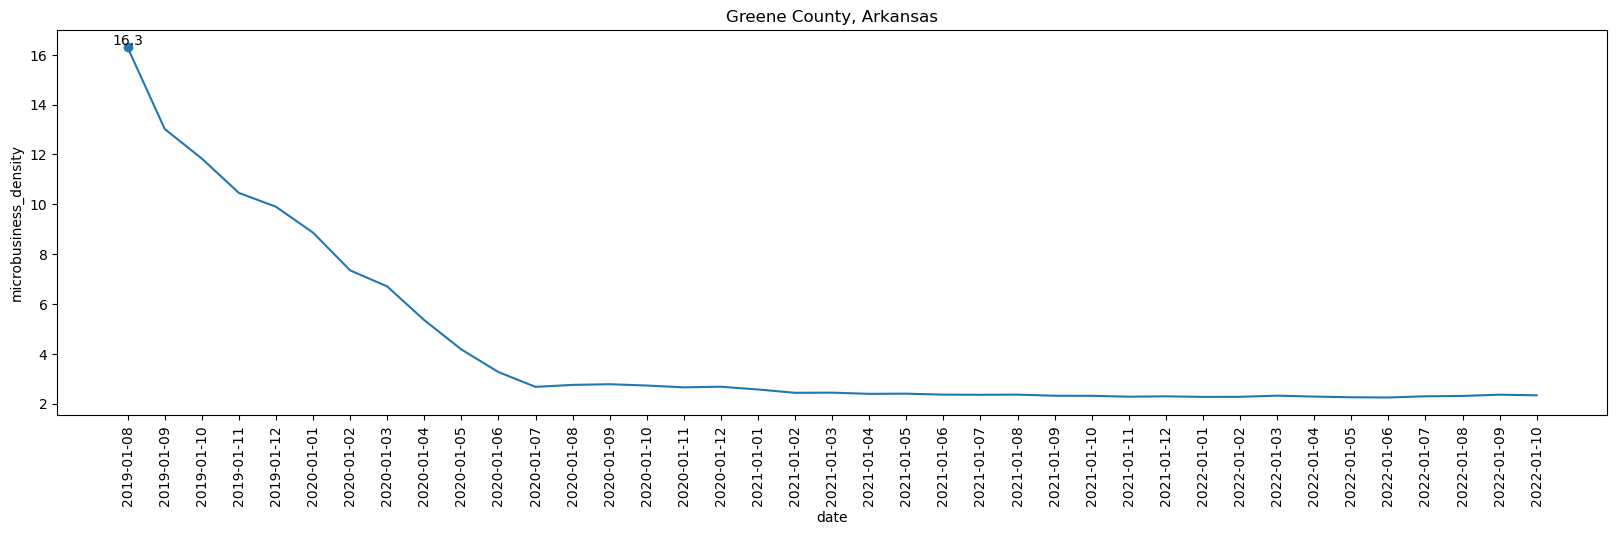

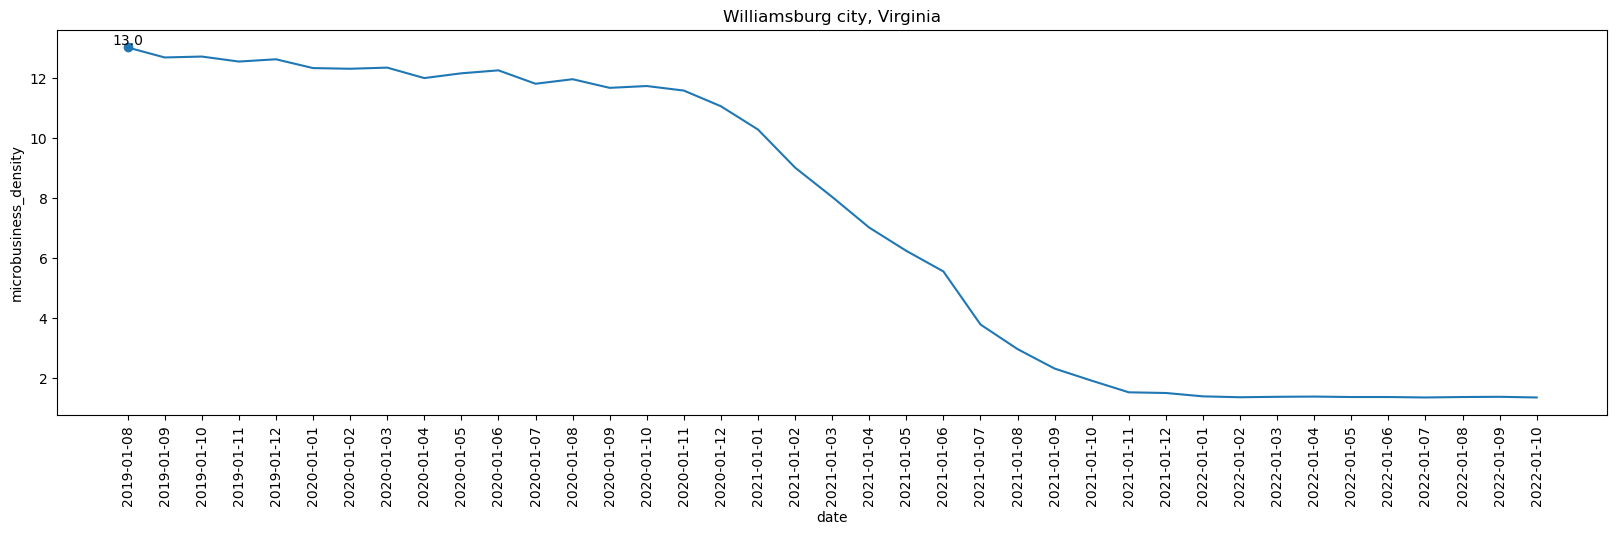

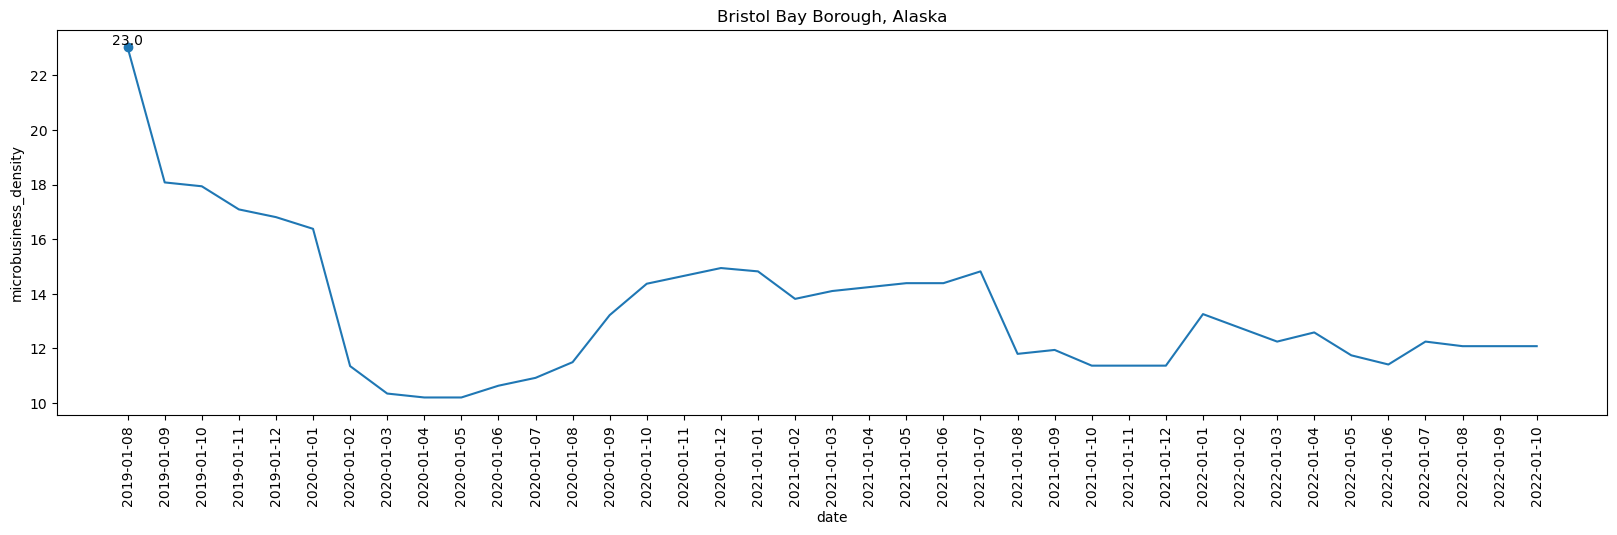

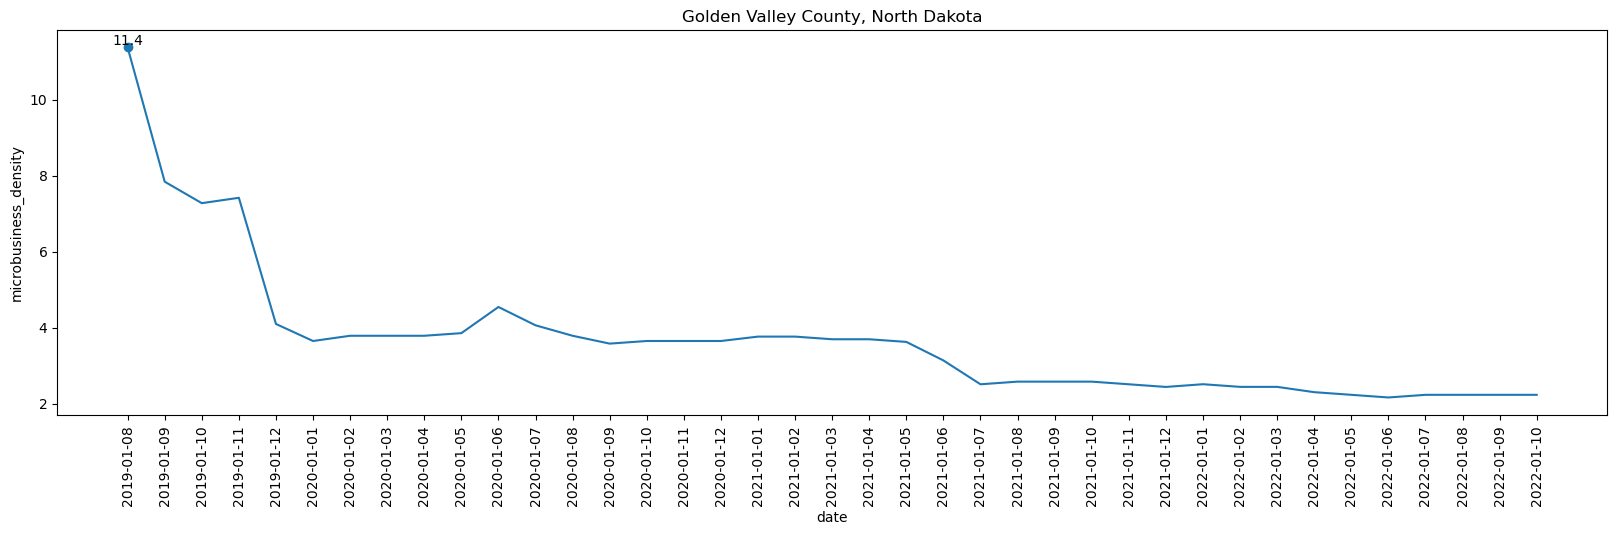

In [656]:
txt_off = -0.015
df = pd.read_csv('C:\\Users\\zeszesz\\Desktop\\mbd_prjct\\train.csv')
for cfip in [46127,5055,51830,2060,38033]:    
    county_data = df[df['cfips']==cfip]
    county_data['date'] = pd.to_datetime(county_data['first_day_of_month']).dt.to_period('D')
    county_data['date'] = county_data['date'].astype(str)
    
    fig, ax = plt.subplots(figsize=(20,5))
    sb.lineplot(data=county_data, x='date', y='microbusiness_density')
    first_pt = (county_data['date'].iloc[0], county_data['microbusiness_density'].iloc[0])
    
    plt.scatter(first_pt[0], first_pt[1])
    plt.text(first_pt[0], first_pt[1] + txt_off, round(first_pt[1],1), ha='center', va='bottom')
    plt.title(f"{county_data['county'].iloc[0]}, {county_data['state'].iloc[0]}")
    plt.xticks(rotation=90, ha='center')

In [659]:
datax.to_csv('data_for_model_final.csv')

In [660]:
datax.isnull().sum()

cfips                          0
county                         0
state                          0
first_day_of_month             0
microbusiness_density          0
active                         0
istest                         0
month                          0
pop                            0
pct_bb_last_year               0
pct_college_last_year          0
pct_foreign_born_last_year     0
pct_it_workers_last_year       5
median_hh_inc_last_year       29
used_population                0
retired_population             0
unemployment_rate              0
labor_force                    0
average_rent                   0
is_coastal                     0
DGS10                          0
year                           0
tax_rate                       0
tax_rate_diff                  0
mbd_lag_1                      0
diff_lag_1                     0
rolling_window_2               0
dtype: int64